## 1. Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from matplotlib.ticker import FuncFormatter

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style='whitegrid')

%matplotlib inline

## 2. Load data

In [2]:
df_sales = pd.read_csv('source/sales.csv', parse_dates=['DATE_ORDER'])
df_comp = pd.read_csv('source/comp_prices.csv', parse_dates=['DATE_EXTRACTION'])

In [3]:
print(f'Total Sales: {df_sales.shape[0]}')
print(f'Total Competitor Price: {df_comp.shape[0]}')

Total Sales: 351091
Total Competitor Price: 50114


## 3. Data Transform

In [4]:
df_sales['YEAR'] = df_sales['DATE_ORDER'].dt.year
df_sales['MONTH'] = df_sales['DATE_ORDER'].dt.month
df_sales['DAY'] = df_sales['DATE_ORDER'].dt.day
df_sales['WEEKDAY'] = df_sales['DATE_ORDER'].dt.weekday

df_comp['DATE'] = pd.to_datetime(df_comp['DATE_EXTRACTION'].dt.date)
df_comp['YEAR'] = df_comp['DATE_EXTRACTION'].dt.year
df_comp['MONTH'] = df_comp['DATE_EXTRACTION'].dt.month
df_comp['DAY'] = df_comp['DATE_EXTRACTION'].dt.day
df_comp['WEEKDAY'] = df_comp['DATE_EXTRACTION'].dt.weekday

In [5]:
df_sales['VL_UNIT'] = round(df_sales['REVENUE'] / df_sales['QTY_ORDER'], 2)

In [6]:
# df_sales.set_index('DATE_ORDER', inplace=True)
# df_comp.set_index('DATE_EXTRACTION', inplace=True)

In [7]:
__months__ = np.arange(10) + 1
__days__ = np.arange(31) + 1
__weekdays__ = np.arange(7)

## 4. Data Understanding

In [8]:
df_sales.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
0      P6 2015-08-02        1.0  1808.99  2015      8    2        6  1808.99
1      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00
2      P6 2015-08-17        1.0  1673.95  2015      8   17        0  1673.95
3      P6 2015-08-11        1.0  1674.00  2015      8   11        1  1674.00
4      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00

In [9]:
df_comp.head()

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
0      P6 2015-01-30 08:11:38         C3           1898.00         1   
1      P6 2015-01-30 08:11:38         C1           1898.00         1   
2      P6 2015-01-30 08:11:38         C6           1999.90         1   
3      P6 2015-01-31 20:10:14         C2           1894.88         2   
4      P6 2015-01-31 20:10:14         C3           1894.88         2   

        DATE  YEAR  MONTH  DAY  WEEKDAY  
0 2015-01-30  2015      1   30        4  
1 2015-01-30  2015      1   30        4  
2 2015-01-30  2015      1   30        4  
3 2015-01-31  2015      1   31        5  
4 2015-01-31  2015      1   31        5

In [10]:
df_sales.dtypes

PROD_ID               object
DATE_ORDER    datetime64[ns]
QTY_ORDER            float64
REVENUE              float64
YEAR                   int64
MONTH                  int64
DAY                    int64
WEEKDAY                int64
VL_UNIT              float64
dtype: object

In [11]:
df_comp.dtypes

PROD_ID                     object
DATE_EXTRACTION     datetime64[ns]
COMPETITOR                  object
COMPETITOR_PRICE           float64
PAY_TYPE                     int64
DATE                datetime64[ns]
YEAR                         int64
MONTH                        int64
DAY                          int64
WEEKDAY                      int64
dtype: object

In [12]:
df_sales.describe()

QTY_ORDER        REVENUE      YEAR          MONTH            DAY  \
count  351091.000000  351091.000000  351091.0  351091.000000  351091.000000   
mean        1.078837     764.953615    2015.0       5.968669      15.420167   
std         1.103650     781.957331       0.0       2.638461       8.946808   
min         1.000000     229.000000    2015.0       1.000000       1.000000   
25%         1.000000     649.000000    2015.0       4.000000       7.000000   
50%         1.000000     749.000000    2015.0       6.000000      16.000000   
75%         1.000000     799.000000    2015.0       8.000000      23.000000   
max       500.000000  368750.000000    2015.0      10.000000      31.000000   

             WEEKDAY        VL_UNIT  
count  351091.000000  351091.000000  
mean        2.655015     712.347413  
std         1.734857     197.892699  
min         0.000000     229.000000  
25%         1.000000     649.000000  
50%         2.000000     749.000000  
75%         4.000000     794.320000  
max         6.000000    2599.000000

In [12]:
df_comp.describe()

COMPETITOR_PRICE      PAY_TYPE     YEAR         MONTH           DAY  \
count      50114.000000  50114.000000  50114.0  50114.000000  50114.000000   
mean        1111.281449      1.499701   2015.0      6.106018     15.486411   
std         3805.613500      0.500005      0.0      2.440813      8.767202   
min          359.100000      1.000000   2015.0      1.000000      1.000000   
25%          549.000000      1.000000   2015.0      4.000000      8.000000   
50%          799.000000      1.000000   2015.0      6.000000     15.000000   
75%         1359.000000      2.000000   2015.0      8.000000     23.000000   
max       149900.000000      2.000000   2015.0     10.000000     31.000000   

            WEEKDAY  
count  50114.000000  
mean       2.927026  
std        1.979078  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000

In [13]:
df_sales['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [14]:
df_comp['PROD_ID'].sort_values().unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9'], dtype=object)

In [15]:
df_sales.nunique()

PROD_ID         9
QTY_ORDER      39
REVENUE      3078
YEAR            1
MONTH          10
DAY            31
WEEKDAY         7
VL_UNIT      2058
dtype: int64

In [16]:
df_comp.nunique()

PROD_ID                9
COMPETITOR             6
COMPETITOR_PRICE    2013
PAY_TYPE               2
YEAR                   1
MONTH                 10
DAY                   31
WEEKDAY                7
dtype: int64

In [17]:
df_sales.isnull().sum()

PROD_ID      0
QTY_ORDER    0
REVENUE      0
YEAR         0
MONTH        0
DAY          0
WEEKDAY      0
VL_UNIT      0
dtype: int64

In [18]:
df_comp.isnull().sum()

PROD_ID             0
COMPETITOR          0
COMPETITOR_PRICE    0
PAY_TYPE            0
YEAR                0
MONTH               0
DAY                 0
WEEKDAY             0
dtype: int64

In [19]:
df_sales.skew()

QTY_ORDER    278.768158
REVENUE      304.089991
YEAR           0.000000
MONTH         -0.260743
DAY           -0.051926
WEEKDAY        0.304711
VL_UNIT        1.765345
dtype: float64

In [20]:
df_sales.kurtosis()

QTY_ORDER    119971.632957
REVENUE      139996.717825
YEAR              0.000000
MONTH            -1.051368
DAY              -1.185817
WEEKDAY          -0.813706
VL_UNIT           8.953788
dtype: float64

## 5. Methods

In [8]:
def y_fmt_frequency(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return '%.1f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return '%.0f k' % val
    
    return '%1.1f' % tick_val

In [9]:
def y_fmt_value(tick_val, pos):
    if int(tick_val) > 1000000:
        val = int(tick_val) / 1000000
        return 'R$ %1.2f M' % val
    elif int(tick_val) > 1000:
        val = int(tick_val) / 1000
        return 'R$ %1.2f k' % val
    
    return 'R$ %1.2f' % tick_val

In [10]:
def set_month(x):
    month = 'Dec'
    
    if x == 1:
        month = 'Jan'
    elif x == 2:
        month = 'Feb'
    elif x == 3:
        month = 'Mar'
    elif x == 4:
        month = 'Apr'
    elif x == 5:
        month = 'May'
    elif x == 6:
        month = 'Jun'
    elif x == 7:
        month = 'Jul'
    elif x == 8:
        month = 'Aug'
    elif x == 9:
        month = 'Sep'
    elif x == 10:
        month = 'Oct'
    elif x == 11:
        month = 'Nov'
    
    return month

In [11]:
def set_payment_type(x): 
    if x == 1:
        return f'Deferred Payment ({x})'
    else:
        return f'Immediate Payment ({x})'

In [12]:
def get_weekday():
    return ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
def get_month():
    return ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

## 6. Exploratory Data Analysis

### 6.1. Sales Internal

#### 6.1.1 Revenue

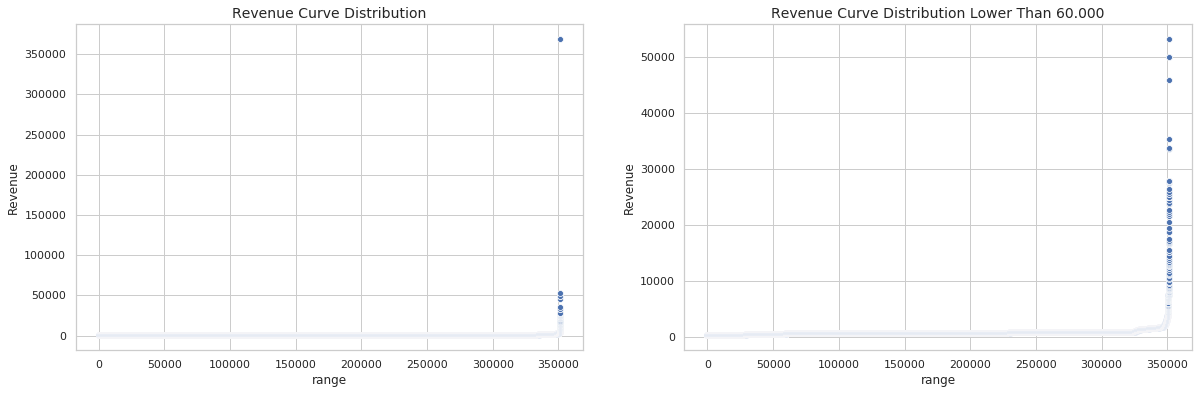

In [19]:
revenues = np.sort(df_sales.loc[df_sales['REVENUE'] < 60000, 'REVENUE'].values)

plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.scatterplot(
    x=range(df_sales.shape[0]),
    y=np.sort(df_sales['REVENUE'].values)
)

plt.title('Revenue Curve Distribution', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.subplot(122)
sns.scatterplot(
    x=range(len(revenues)),
    y=revenues
)

plt.title('Revenue Curve Distribution Lower Than 60.000', fontsize=14)
plt.xlabel('range')
plt.ylabel('Revenue')

plt.show()

**Revenue Curve Distribution**
- *Podemos observar um valor totalmente fora do normal em comparação as outras receitas*
- *A distância entre um valor e o anterior tem um salto de aproximadamente 56 mil para 360 mil.*

**Revenue Curve Distribution Lower Than Max Value**
- *No segundo gráfico podemos visualizar uma curva mais uniforme, sem muitos valores distantes comparados aos demais.*

/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


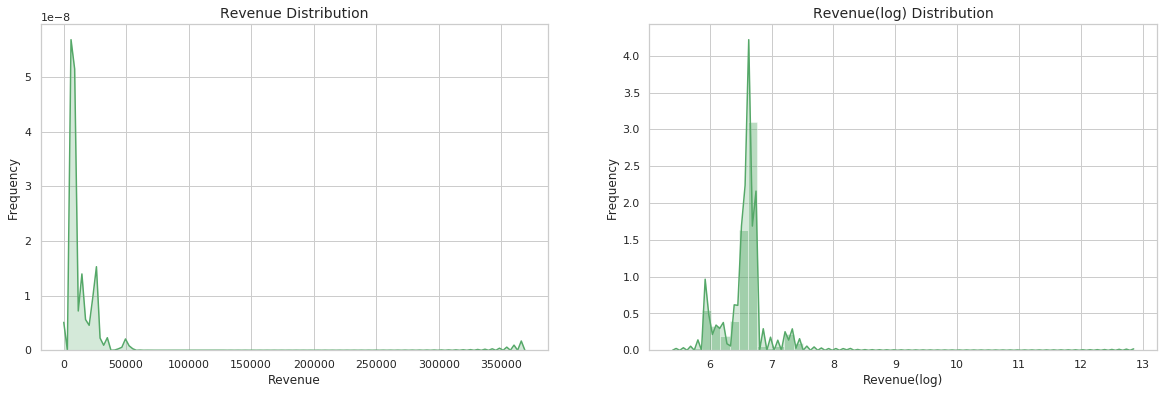

In [22]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.distplot(
    df_sales['REVENUE'],
    color='g', 
    hist=False, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution', fontsize=14)

plt.subplot(122)
sns.distplot(
    np.log(df_sales['REVENUE']),
    color='g', 
    hist=True, 
    kde_kws={'shade': True}
)

plt.xlabel('Revenue(log)')
plt.ylabel('Frequency')
plt.title('Revenue(log) Distribution', fontsize=14)

plt.show()

- Primeiro gráfico, skewness positivo. Enviesado para direita
- Utilização do log para a torno a distribuição menos enviesada.

(351091, 8)
(351090, 8)


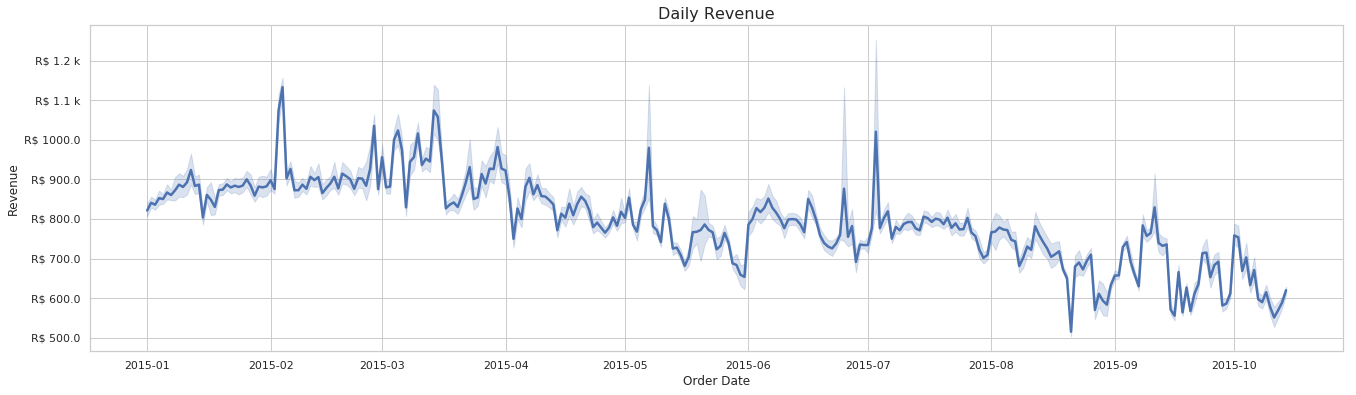

In [798]:
f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(
    x='DATE_ORDER', 
    y='REVENUE',
    data=df_sales,
    palette='tab10', 
    linewidth=2.5,
    ax=ax1
)
ax1.set_ylabel('Revenue')
ax1.set_xlabel('Order Date')
ax1.set_title('Daily Revenue', fontsize=16)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Podemos reparar picos de vendas em determinados pontos do gráfico, muitos deles estão concentrados entre o meio do mês anterior até o início do mês seguinte. Talvez por questões de recebimento de salário possa ser um dos fatores para estes eventos.

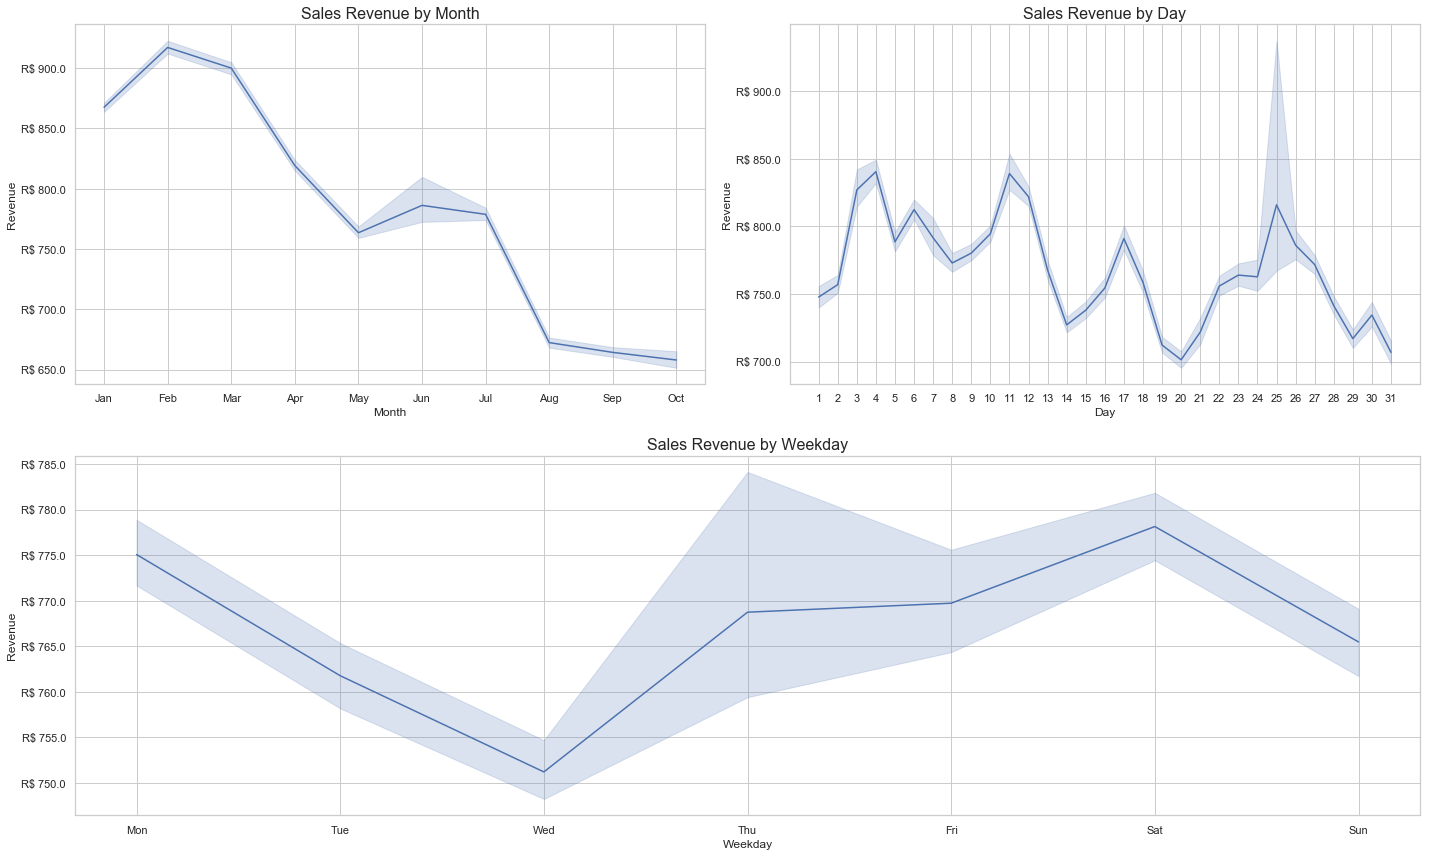

In [65]:
f = plt.figure(figsize=(20, 12))

gridsize = (2, 2)

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)

sns.lineplot(
    x='MONTH', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax1
)

sns.lineplot(
    x='DAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax2
)

sns.lineplot(
    x='WEEKDAY', 
    y='REVENUE', 
    data=df_sales, 
    palette='tab10',
    ax=ax3
)

titles = ['Sales Revenue by Month', 'Sales Revenue by Day', 'Sales Revenue by Weekday']

xlabels = ['Month', 'Day', 'Weekday']
xticks = [__months__, __days__, __weekdays__]
xticks_labels = [get_month(), None, get_weekday()]

ylabels = 'Revenue'

for i, ax in enumerate([ax1, ax2, ax3]):
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(ylabels)
    ax.set_xticks(xticks[i])
    
    if xticks_labels[i] is not None:
        ax.set_xticklabels(xticks_labels[i])
    
    ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.tight_layout(h_pad=2)

plt.show()

- No gráfico mensal é possível observar nitidamente um aumento nas vendas no mês de janeiro e em fevereiro há uma queda constante no valor ao longo do tempo, mantendo-se apenas nos meses de maio e junho.
- Na gráfico diário as vendas possuem muitas variações ao longo do mês, podendo ser observado vendas em dias específicos.
- Nas vendas realizadas nos dias de semana é possível analisar um crescimento a partir da quarta-feira até sábado.

#### 6.1.2. Products

In [25]:
df_sales.PROD_ID.value_counts()

P7    195939
P2     63358
P8     27840
P5     19775
P9     18431
P4     14656
P6      4102
P1      4091
P3      2899
Name: PROD_ID, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


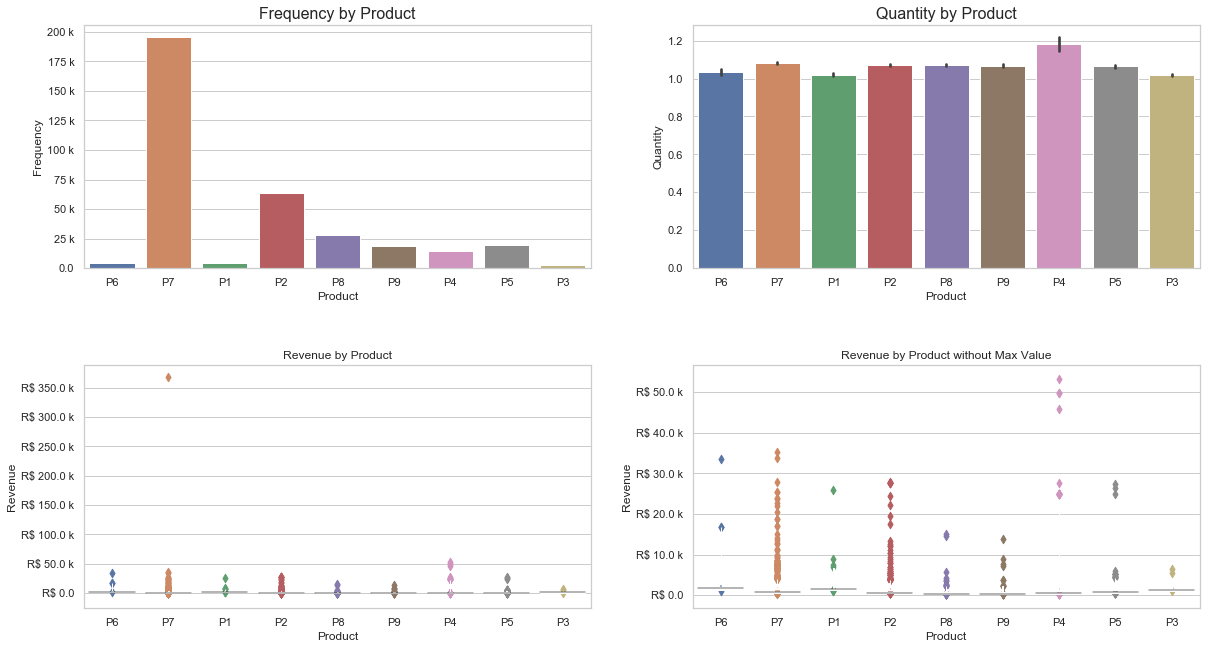

In [96]:
plt.figure(figsize=(20, 12))

plt.subplots_adjust(hspace=0.4, top=0.8)

ax1 = plt.subplot(221)
sns.countplot(x='PROD_ID', data=df_sales, ax=ax1)

plt.title('Frequency by Product', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Frequency')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax2 = plt.subplot(222)
sns.barplot(x='PROD_ID', y='QTY_ORDER', data=df_sales, ax=ax2)

plt.title('Quantity by Product', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Quantity')

# ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax3 = plt.subplot(223)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales)

plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')

ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

ax4 = plt.subplot(224)
sns.boxenplot(x='PROD_ID', y='REVENUE', data=df_sales[df_sales['REVENUE'] < df_sales['REVENUE'].max()])

plt.title('Revenue by Product without Max Value')
plt.xlabel('Product')
plt.ylabel('Revenue')

ax4.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

**Frequency by Product**
- Neste plot observamos que os produtos 7 e 2 possuem uma frequência maior em cada vendas no geral (não sendo considerado as suas respectivas quantidades vendidas).

**Quantity by Product**
- Neste gráfico analisamos a quantidade total vendida de cada produto em cada venda. Apesar dos produtos 7 e 2 terem mais frequências em cada venda realizada, os dados nos indicam que o produto 4 possui uma maior quantidade vendida. Mesmo que ele não tenha tanta frequência em muitas vendas, os clientes compram este produto em maior quantidade do que os outros produtos.

**Revenue by Product**
- Assim como no gráfico anterior o produto 7 continua tendo um destaque no valor da receita comparado aos outros produtos. Aqui visualizamos claramente que existe uma venda onde o valor do seu produto é muito superior aos outros, tornando assim essa diferença e a distância visualizada no gráfico.

**Revenue by Product without Max Value**
- Neste plot retiramos o valor da receita significativa do produto 7 para analisarmos melhor o comportamento dos outros produtos. Ao retirarmos podemos observar em um primeiro momento que o produto 4 possui um valor de receita significativo logo após o produto 7.
- Mesmo que o produto 4 esteja destacado em relação aos outros no gráfico, podemos observar que essa diferença depende da quantidade dos produtos vendidos em cada venda, pois os seus valores possuem uma distância entre eles.
- Já para o produto 7 vemos uma concentração muito próxima dos pontos, deixando a reta dos seus valores mais homogêneos do que o produto 4, se não tivermos uma quantidade significativa para o produto, o seu valor de receite tende a diminuir.
- O produto 2 também apresenta o mesmo comportamento do produto 7 sem o outlier, uma reta onde os seus pontos (valores) são mais próximos uns dos outros, tendo assim uma maior conscistência.


#### 6.1.3. P1

In [146]:
df_sales_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_sales_p1.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
200041      P1 2015-07-27        1.0  1490.17  2015      7   27        0   
200042      P1 2015-07-30        1.0  1499.00  2015      7   30        3   
200043      P1 2015-07-28        1.0  1499.00  2015      7   28        1   
200044      P1 2015-07-25        1.0  1499.00  2015      7   25        5   
200045      P1 2015-07-29        1.0  1499.00  2015      7   29        2   

        VL_UNIT  
200041  1490.17  
200042  1499.00  
200043  1499.00  
200044  1499.00  
200045  1499.00

Mean of revenue by month of P1:
MONTH
2     1520.643624
3     1415.883372
4     1449.256189
5     1428.343927
6     1457.955683
7     1503.004047
8     1508.453512
9     1516.348482
10    1547.157919
Name: REVENUE, dtype: float64

Distribution of quantity sold (P1):
QTY_ORDER
1.0     98.90
2.0      0.90
5.0      0.10
20.0     0.02
6.0      0.02
4.0      0.02
3.0      0.02
Name: PROD_ID, dtype: float64


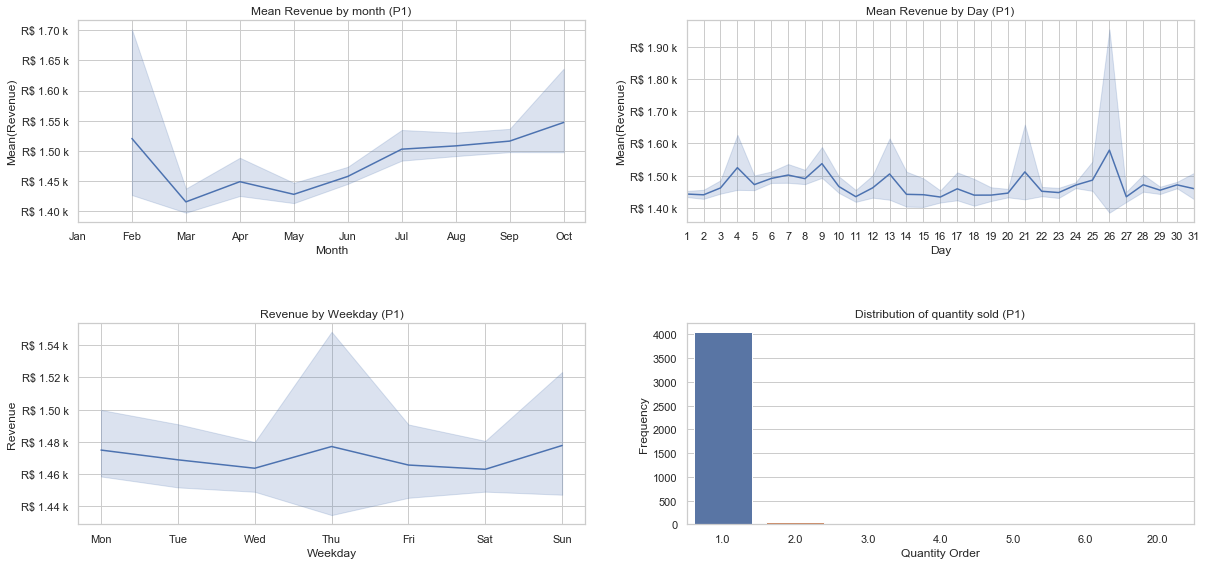

In [130]:
print('Mean of revenue by month of P1:')
print(df_sales_p1.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P1):')
print(
    round((df_sales_p1.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p1.QTY_ORDER.count()) * 100, 2).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax3.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p1, ax=ax1)
ax1.set_title('Mean Revenue by month (P1)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean(Revenue)')
ax1.set_xticks(__months__)
ax1.set_xticklabels(get_month())

sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p1, ax=ax2)
ax2.set_title('Mean Revenue by Day (P1)')
ax2.set_xlabel('Day')
ax2.set_ylabel('Mean(Revenue)')
ax2.set_xlim((1, 31))
ax2.set_xticks(__days__)

sns.lineplot(x='WEEKDAY', y='REVENUE', data=df_sales_p1, ax=ax3)
ax3.set_title('Revenue by Weekday (P1)')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Revenue')
ax3.set_xticks(__weekdays__)
ax3.set_xticklabels(get_weekday())

sns.countplot(df_sales_p1['QTY_ORDER'], ax=ax4)
ax4.set_title('Distribution of Quantity Sold (P1)')
ax4.set_xlabel('Quantity Order')
ax4.set_ylabel('Frequency')

plt.show()


**Mean revenue by month (P1)**
- Podemos observar uma queda na média das vendas a partir do mês de fevereiro e um crescimento a partir do mês de março.

**Mean revenue by day (P1)**
- Ao analisarmos o gráfico da média de receita por dia, vemos um pico na receita no final do mês.

**Distribution of quantity sold (P1)**
- Na análise da distribuição da quantidade vendida, podemos observar que 99% das vendas do produto P1 os clientes compram apenas 1 unidade.

#### 6.1.4. P2

In [29]:
df_sales_p2 = df_sales[df_sales['PROD_ID'] == 'P2']
df_sales_p2.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-06-23      P2        1.0   649.00  2015      6   23        1   649.00
2015-07-29      P2        1.0   664.05  2015      7   29        2   664.05
2015-07-31      P2        1.0   664.05  2015      7   31        4   664.05
2015-07-31      P2        1.0   664.05  2015      7   31        4   664.05
2015-09-04      P2        1.0   658.99  2015      9    4        4   658.99

Mean of revenue by month of P2:
MONTH
1     820.525198
2     844.312378
3     762.758016
4     740.671408
5     727.805914
6     693.652694
7     703.782516
8     704.967048
9     655.173843
10    732.243451
Name: REVENUE, dtype: float64

Distribution of quantity sold (P2):
QTY_ORDER
1.0     96.1489
2.0      2.8268
3.0      0.3646
5.0      0.3251
6.0      0.1420
4.0      0.1310
10.0     0.0237
20.0     0.0079
50.0     0.0063
15.0     0.0032
8.0      0.0032
7.0      0.0032
40.0     0.0032
16.0     0.0016
12.0     0.0016
43.0     0.0016
9.0      0.0016
17.0     0.0016
27.0     0.0016
35.0     0.0016
Name: PROD_ID, dtype: float64


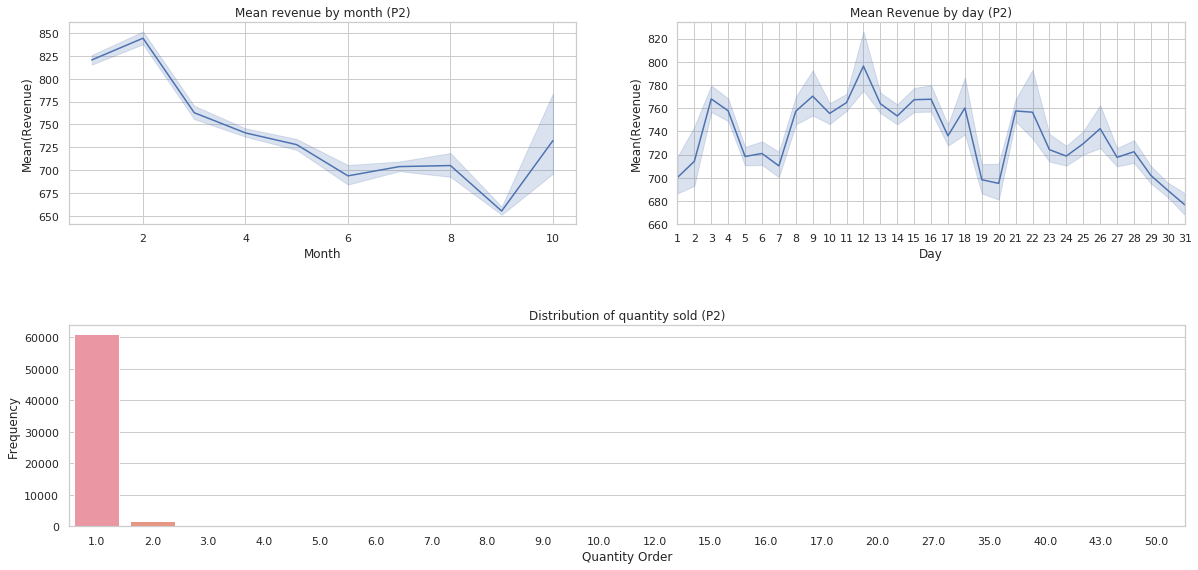

In [30]:
print('Mean of revenue by month of P2:')
print(df_sales_p2.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P2):')
print(
    round((df_sales_p2.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p2.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p2)

plt.title('Mean revenue by month (P2)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p2)

x = (np.arange(df_sales_p2.DAY.max()) + 1).astype(str)

plt.title('Mean Revenue by day (P2)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p2.DAY.max()))
plt.xticks(np.arange(df_sales_p2.DAY.max())+1, x)

plt.subplot(212)

sns.countplot(df_sales_p2['QTY_ORDER'])

plt.title('Distribution of quantity sold (P2)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P2)**
- Podemos observar um aumento na média das vendas do produto P2 no mês de janeiro e após isso um decréscimo nas vendas até o mês 9.

**Mean revenue by day (P2)**
- As maiores vendas realizadas para o produto P2 são entre os dias 8 e 16.

**Distribution of quantity sold (P2)**
- 96% dos clientes compram apenas 1 unidade do produto P2.

#### 6.1.5. P3

In [31]:
df_sales_p3 = df_sales[df_sales['PROD_ID'] == 'P3']
df_sales_p3.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-07-31      P3        1.0   1049.0  2015      7   31        4   1049.0
2015-07-31      P3        1.0   1049.0  2015      7   31        4   1049.0
2015-08-02      P3        1.0   1098.0  2015      8    2        6   1098.0
2015-07-21      P3        1.0   1098.0  2015      7   21        1   1098.0
2015-07-25      P3        1.0   1149.0  2015      7   25        5   1149.0

Mean of revenue by month of P3:
MONTH
2     1481.733649
3     1422.953703
4     1325.018529
5     1311.132542
6     1261.643387
7     1140.176967
8     1204.285600
9     1253.644096
10    1196.764821
Name: REVENUE, dtype: float64

Distribution of quantity sold (P3):
QTY_ORDER
1.0    98.5857
2.0     1.2763
3.0     0.0690
6.0     0.0345
5.0     0.0345
Name: PROD_ID, dtype: float64


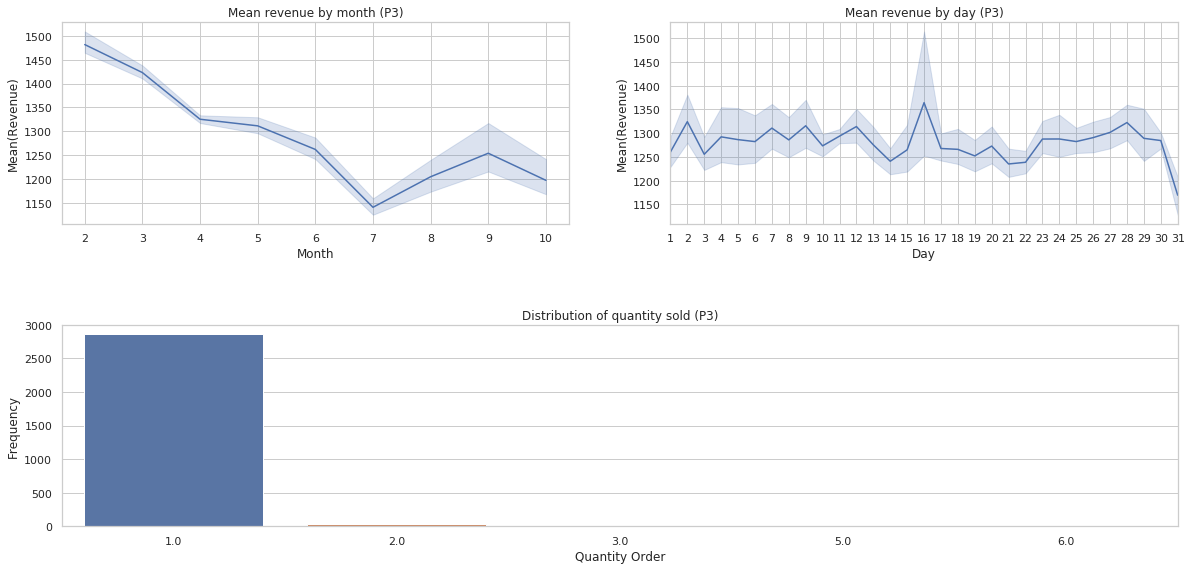

In [32]:
print('Mean of revenue by month of P3:')
print(df_sales_p3.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P3):')
print(
    round((df_sales_p3.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p3.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p3)

plt.title('Mean revenue by month (P3)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p3)

x = (np.arange(df_sales_p3.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P3)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p3.DAY.max()))
plt.xticks(np.arange(df_sales_p3.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p3['QTY_ORDER'])

plt.title('Distribution of quantity sold (P3)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- As vendas do produto P3 vêm decrescendo de fevereiro até o mês julho e tem um aumento até o mês de setembro.

**Mean revenue by day (P3)**
- A média das vendas por dia tem leves variações tanto de aumento quanto de diminuição no valor médio.

**Distribution of quantity sold (P3)**
- 98% dos clientes compram apenas 1 unidade do produto P3

#### 6.1.6. P4

In [33]:
df_sales_p4 = df_sales[df_sales['PROD_ID'] == 'P4']
df_sales_p4.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-07-25      P4        1.0   540.55  2015      7   25        5   540.55
2015-08-26      P4        1.0   499.90  2015      8   26        2   499.90
2015-08-05      P4        1.0   569.00  2015      8    5        2   569.00
2015-07-26      P4        1.0   689.99  2015      7   26        6   689.99
2015-07-26      P4        1.0   689.90  2015      7   26        6   689.90

Mean of revenue by month of P4:
MONTH
3     565.120455
4     596.379187
5     576.878154
6     541.487886
7     742.445659
8     578.312493
9     571.114716
10    528.596585
Name: REVENUE, dtype: float64

Distribution of quantity sold (P4):
QTY_ORDER
1.0      93.8387
2.0       4.3941
3.0       0.6482
5.0       0.4162
4.0       0.2456
6.0       0.2047
50.0      0.0614
10.0      0.0341
40.0      0.0136
9.0       0.0136
11.0      0.0136
100.0     0.0136
15.0      0.0136
12.0      0.0068
7.0       0.0068
109.0     0.0068
23.0      0.0068
24.0      0.0068
28.0      0.0068
29.0      0.0068
30.0      0.0068
31.0      0.0068
35.0      0.0068
71.0      0.0068
85.0      0.0068
20.0      0.0068
Name: PROD_ID, dtype: float64


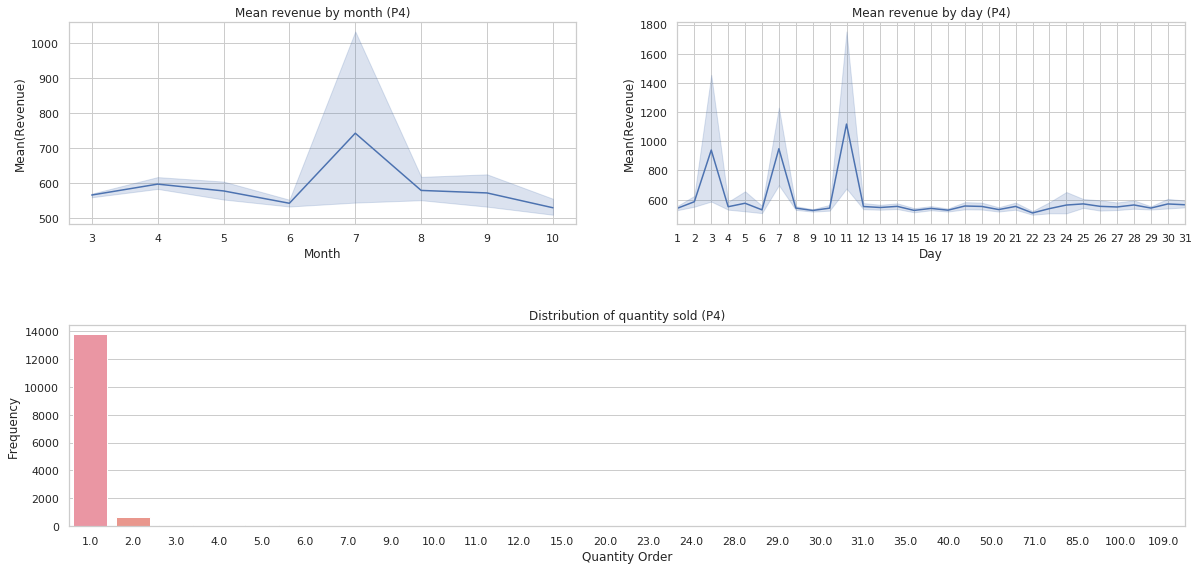

In [34]:
print('Mean of revenue by month of P4:')
print(df_sales_p4.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P4):')
print(
    round((df_sales_p4.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p4.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p4)

plt.title('Mean revenue by month (P4)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p4)

x = (np.arange(df_sales_p4.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P4)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p4.DAY.max()))
plt.xticks(np.arange(df_sales_p4.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p4['QTY_ORDER'])

plt.title('Distribution of quantity sold (P4)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P3)**
- O produto 4 tem uma leve queda até o mês de junho, onde há pico nas vendas no mês de julho e novamente o seu valor médio volta ao normal (quase constante, tendo pouca variação).

**Mean revenue by day (P4)**
- As vendas diárias do produto 4 tem a sua variação quase constante, porém os dias 3, 7 e 11 tem um aumento significativo na média da receita. Podemos supor que na maior parte do mês este produto é comprado poucas vezes.

**Distribution of quantity sold (P4)**
- No gráfico da distribuição por quantidade vendida, podemos observar que 94% dos clientes compram apenas 1 unidade do produto 4 e 4.3% compram 2 unidades.

#### 6.1.7. P5

In [35]:
df_sales_p5 = df_sales[df_sales['PROD_ID'] == 'P5']
df_sales_p5.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-07-25      P5        1.0    935.0  2015      7   25        5    935.0
2015-07-22      P5        1.0    799.0  2015      7   22        2    799.0
2015-07-21      P5        1.0    799.0  2015      7   21        1    799.0
2015-07-17      P5        1.0    749.0  2015      7   17        4    749.0
2015-07-21      P5        1.0    799.0  2015      7   21        1    799.0

Mean of revenue by month of P5:
MONTH
4     1049.150278
5      972.027883
6      851.169691
7      793.842416
8      805.947977
9      806.787946
10     792.149297
Name: REVENUE, dtype: float64

Distribution of quantity sold (P5):
QTY_ORDER
1.0     96.4046
2.0      2.6498
5.0      0.3540
3.0      0.2731
6.0      0.1871
4.0      0.1163
41.0     0.0051
39.0     0.0051
37.0     0.0051
Name: PROD_ID, dtype: float64


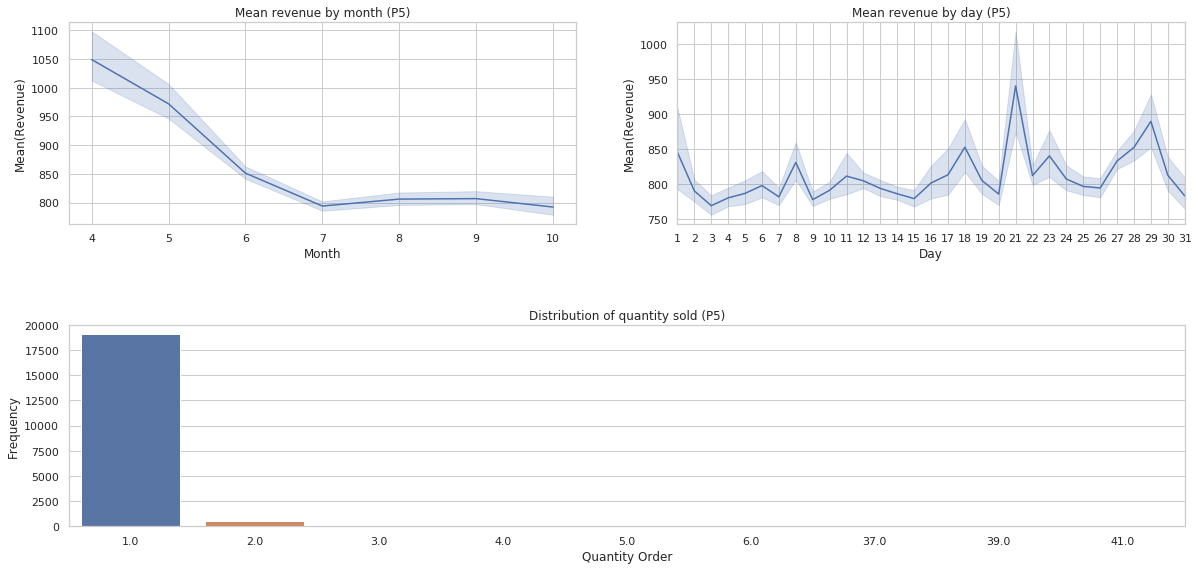

In [36]:
print('Mean of revenue by month of P5:')
print(df_sales_p5.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P5):')
print(
    round((df_sales_p5.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p5.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', data=df_sales_p5)

plt.title('Mean revenue by month (P5)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p5)

x = (np.arange(df_sales_p5.DAY.max()) + 1).astype(str)

plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.title('Mean revenue by day (P5)')
plt.xlim((1, df_sales_p5.DAY.max()))
plt.xticks(np.arange(df_sales_p5.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p5['QTY_ORDER'])

plt.title('Distribution of quantity sold (P5)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P5)**
- Os produtos P5 tem uma média da receita alta apenas no mês de abril e vai decrescendo até o mês de julho, a partir deste mês até outubro os valores médio tem pouca alteração.

**Mean revenue by day (P5)**
- Podemos analisar que o produto 5 apesar de ter um decréscimo mensal no seu valor médio da receita, os seus valores médios diários existem bastante variações em entre dias pontuais.

**Distribution of quantity sold (P5)**
- Apesar dos seus valores diários um aumento em dias pontuais, 96% das vendas contém apenas 1 quantidade do produto 5.

#### 6.1.8. P6

In [37]:
df_sales_p6 = df_sales[df_sales['PROD_ID'] == 'P6']
df_sales_p6.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-08-02      P6        1.0  1808.99  2015      8    2        6  1808.99
2015-08-17      P6        1.0  1674.00  2015      8   17        0  1674.00
2015-08-17      P6        1.0  1673.95  2015      8   17        0  1673.95
2015-08-11      P6        1.0  1674.00  2015      8   11        1  1674.00
2015-08-17      P6        1.0  1674.00  2015      8   17        0  1674.00

Mean of revenue by month of P6:
MONTH
1     1926.031531
2     1762.441349
3     1798.081012
4     1817.741821
5     1834.926325
6     1789.012278
7     1743.420364
8     1714.891307
9     1537.704835
10    1535.038660
Name: REVENUE, dtype: float64
Distribution of quantity sold (P6):
QTY_ORDER
1.0     98.3667
2.0      1.2921
3.0      0.1463
5.0      0.0975
12.0     0.0488
24.0     0.0244
10.0     0.0244
Name: PROD_ID, dtype: float64


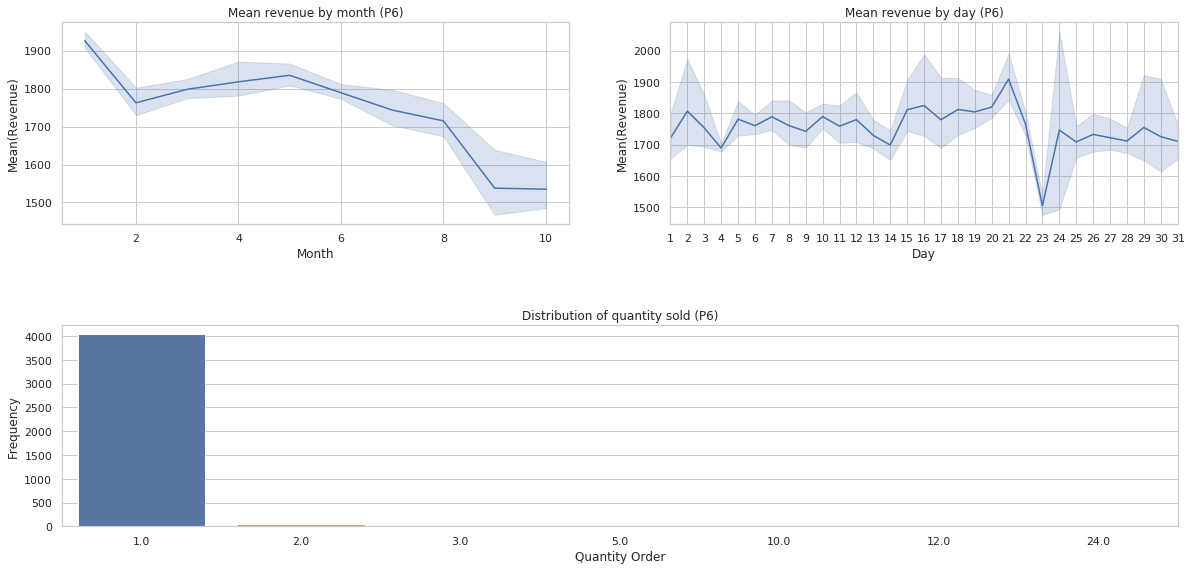

In [39]:
print('Mean of revenue by month of P6:')
print(df_sales_p6.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P6):')
print(
    round((df_sales_p6.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p6.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p6)

plt.title('Mean revenue by month (P6)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p6)

x = (np.arange(df_sales_p6.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P6)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p6.DAY.max()))
plt.xticks(np.arange(df_sales_p6.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p6['QTY_ORDER'])

plt.title('Distribution of quantity sold (P6)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P6)**
- Podemos observar uma queda significativa na média das vendas do mês de janeiro até fevereiro, logo após há um leve crescimento até o mês maio e uma diminução gradual até o mês setembro.

**Mean revenue by day (P6)**
- Existem diversas variações nas média das vendas diárias que não são muito significativas, somente no final do mês podemos observar uma queda.

**Distribution of quantity sold (P6)**
- 98% das vendas contém apenas 1 unidade.

#### 6.1.9. P7

In [41]:
df_sales_p7 = df_sales[df_sales['PROD_ID'] == 'P7']
df_sales_p7.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-07-31      P7        1.0    749.0  2015      7   31        4    749.0
2015-07-25      P7        1.0    749.0  2015      7   25        5    749.0
2015-08-02      P7        1.0    752.0  2015      8    2        6    752.0
2015-08-02      P7        1.0    752.0  2015      8    2        6    752.0
2015-07-17      P7        1.0    749.0  2015      7   17        4    749.0

Mean of revenue by month of P7:
MONTH
1     860.442439
2     874.765825
3     895.445514
4     872.802125
5     831.445669
6     822.977531
7     793.183142
8     762.346568
9     745.235600
10    765.480196
Name: REVENUE, dtype: float64

Distribution of quantity sold (P7):
QTY_ORDER
1.0      95.0576
2.0       3.7910
3.0       0.4563
5.0       0.4338
4.0       0.1613
6.0       0.0510
10.0      0.0301
30.0      0.0031
20.0      0.0026
7.0       0.0026
12.0      0.0020
25.0      0.0015
15.0      0.0015
16.0      0.0010
50.0      0.0010
8.0       0.0010
500.0     0.0005
14.0      0.0005
28.0      0.0005
39.0      0.0005
13.0      0.0005
Name: PROD_ID, dtype: float64


/home/leonardo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


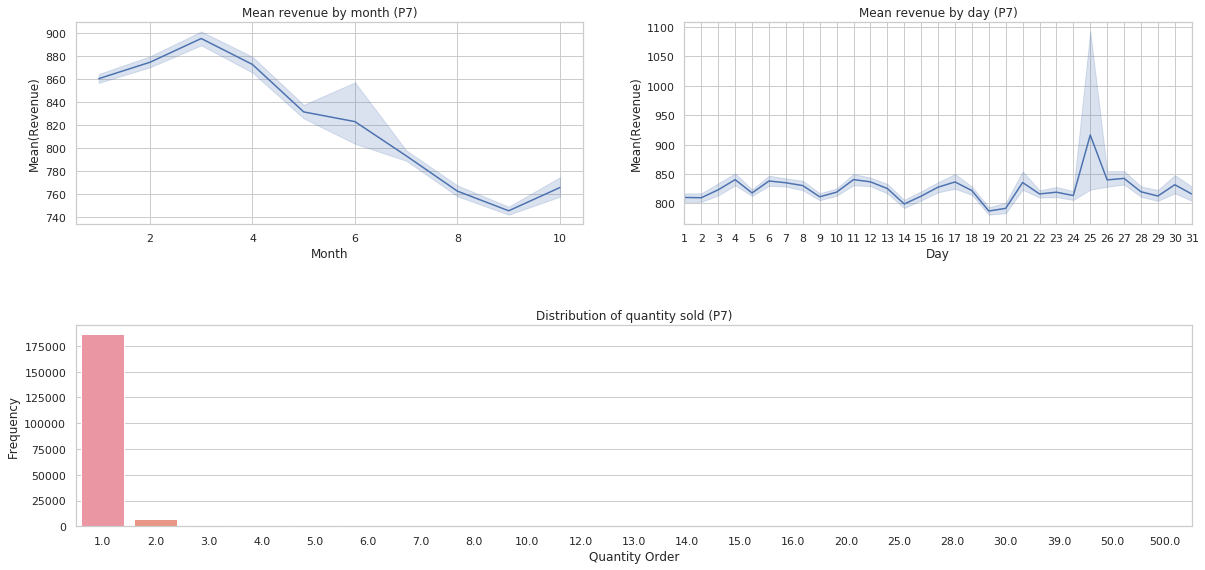

In [42]:
print('Mean of revenue by month of P7:')
print(df_sales_p7.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P7):')
print(
    round((df_sales_p7.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p7.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p7)

plt.title('Mean revenue by month (P7)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p7)

x = (np.arange(df_sales_p7.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P7)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p7.DAY.max()))
plt.xticks(np.arange(df_sales_p7.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p7['QTY_ORDER'])

plt.title('Distribution of quantity sold (P7)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P7)**
- Podemos observar um crescimento no valor médio entre janeiro e fevereiro, a partir de março até agosto o gráfico nos mostra uma diminuição na venda do produto P7.

**Mean revenue by day (P7)**
- Podemos observar pequenas variações no aumento e diminuição nas vendas diárias do produto P7. No dia 25 o gráfico nos mostra um pico no aumento das vendas.

**Distribution of quantity sold (P7)**
- 95% das vendas contém uma unidade do produto 7 e 3% duas quantidades.

#### 6.1.10. P8

In [44]:
df_sales_p8 = df_sales[df_sales['PROD_ID'] == 'P8']
df_sales_p8.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-07-28      P8        4.0  1604.00  2015      7   28        1   401.00
2015-07-30      P8        1.0   388.16  2015      7   30        3   388.16
2015-07-31      P8        1.0   388.16  2015      7   31        4   388.16
2015-07-29      P8        1.0   448.52  2015      7   29        2   448.52
2015-07-25      P8        1.0   439.00  2015      7   25        5   439.00

Mean of revenue by month of P8:
MONTH
3     585.456995
4     520.342590
5     471.454355
6     497.097016
7     472.126985
8     422.979394
9     411.469277
10    422.123493
Name: REVENUE, dtype: float64

Distribution of quantity sold (P8):
QTY_ORDER
1.0     94.9784
2.0      4.1703
3.0      0.4131
5.0      0.2191
6.0      0.1078
4.0      0.0898
40.0     0.0072
10.0     0.0072
15.0     0.0036
11.0     0.0036
Name: PROD_ID, dtype: float64


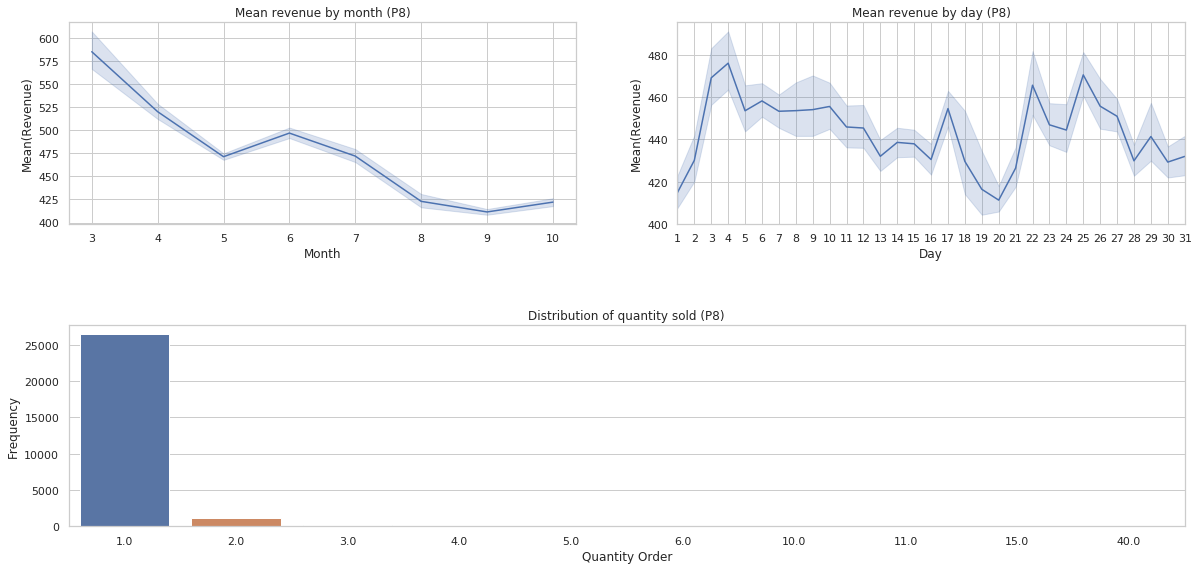

In [45]:
print('Mean of revenue by month of P8:')
print(df_sales_p8.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P8):')
print(
    round((df_sales_p8.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p8.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p8)

plt.title('Mean revenue by month (P8)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p8)

x = (np.arange(df_sales_p8.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P8)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p8.DAY.max()))
plt.xticks(np.arange(df_sales_p8.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p8['QTY_ORDER'])

plt.title('Distribution of quantity sold (P8)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P8)**
- Ao analisarmos podemos uma queda constante entre os meses de março e outubro, exceto no mês de maio.

**Mean revenue by day(P8)**
- As vendas diárias para este produto existem grande variações, no primeiros e nos últimos dias temos um aumento significativo nas vendas.

**Distribution of quantity sold (P8)**
- 95% das vendas possuem apenas uma quantidade do produto.

#### 6.1.11. P9

In [46]:
df_sales_p9 = df_sales[df_sales['PROD_ID'] == 'P9']
df_sales_p9.head()

PROD_ID  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
DATE_ORDER                                                                
2015-09-24      P9        1.0    399.0  2015      9   24        3    399.0
2015-08-02      P9        1.0    435.0  2015      8    2        6    435.0
2015-07-25      P9        2.0    878.0  2015      7   25        5    439.0
2015-08-02      P9        1.0    435.0  2015      8    2        6    435.0
2015-08-02      P9        1.0    435.0  2015      8    2        6    435.0

Mean of revenue by month of P9:
MONTH
3     576.311304
4     505.706888
5     476.737577
6     527.673719
7     464.059598
8     426.722495
9     409.701574
10    416.695545
Name: REVENUE, dtype: float64

Distribution of quantity sold (P9):
QTY_ORDER
1.0     95.7300
2.0      3.3585
3.0      0.4178
5.0      0.2442
6.0      0.1356
4.0      0.0814
10.0     0.0109
40.0     0.0054
20.0     0.0054
18.0     0.0054
15.0     0.0054
Name: PROD_ID, dtype: float64


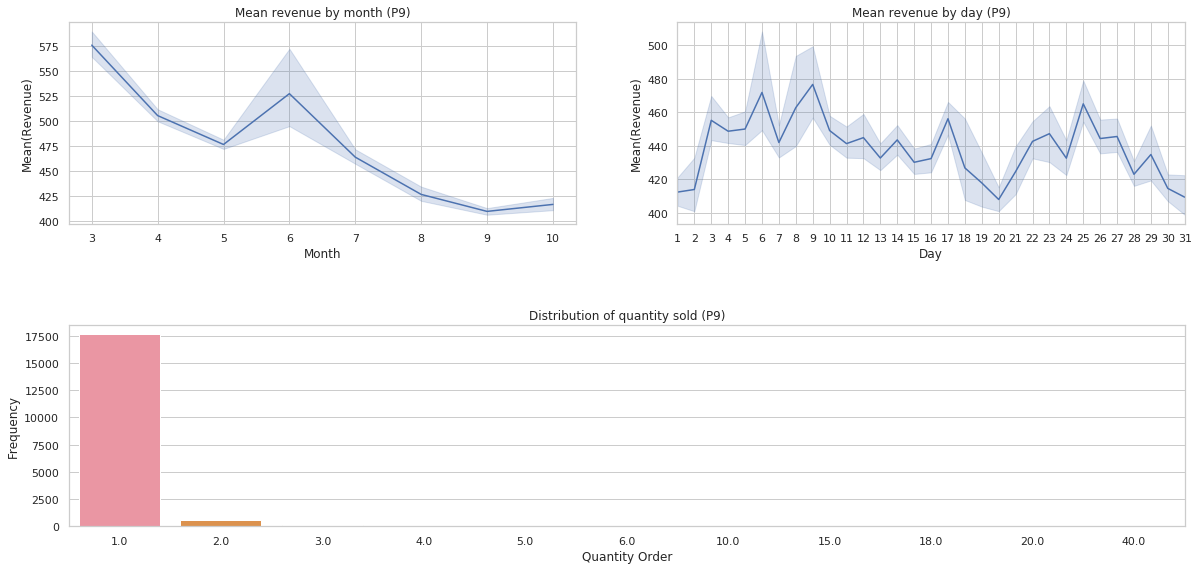

In [47]:
print('Mean of revenue by month of P9:')
print(df_sales_p9.groupby('MONTH')['REVENUE'].mean())

print('')

print('Distribution of quantity sold (P9):')
print(
    round((df_sales_p9.groupby('QTY_ORDER')['PROD_ID'].count() / df_sales_p9.QTY_ORDER.count()) * 100, 4).sort_values(ascending=False)
)

plt.figure(figsize=(20, 8))

plt.subplots_adjust(hspace=0.5, top=1)

plt.subplot(221)
sns.lineplot(x='MONTH', y='REVENUE', palette='tab10', data=df_sales_p9)

plt.title('Mean revenue by month (P9)')
plt.xlabel('Month')
plt.ylabel('Mean(Revenue)')

plt.subplot(222)
sns.lineplot(x='DAY', y='REVENUE', data=df_sales_p9)

x = (np.arange(df_sales_p9.DAY.max()) + 1).astype(str)

plt.title('Mean revenue by day (P9)')
plt.xlabel('Day')
plt.ylabel('Mean(Revenue)')

plt.xlim((1, df_sales_p9.DAY.max()))
plt.xticks(np.arange(df_sales_p9.DAY.max())+1, x)

plt.subplot(212)
sns.countplot(df_sales_p9['QTY_ORDER'])

plt.title('Distribution of quantity sold (P9)')
plt.xlabel('Quantity Order')
plt.ylabel('Frequency')

plt.show()

**Mean revenue by month (P9)**
- O produto 9 vem diminuindo o valor médio da sua receita durante os meses de março e outubro, exceto maio que possue um pequeno aumento no valor médio da sua receita.

**Mean revenue by day (P9)**
- As vendas diárias para o produto 9 são bem inconstantes, os seus valores tem variações altas e baixas entre um dia e outro.

**Distribution of quatity sold (P9)**
- 95% dos das vendas os clientes compram apenas uma quantidade deste produto.

### 7. Sales Competitor

In [12]:
df_comp.head()

PROD_ID COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  YEAR  \
DATE_EXTRACTION                                                            
2015-01-30 08:11:38      P6         C3           1898.00         1  2015   
2015-01-30 08:11:38      P6         C1           1898.00         1  2015   
2015-01-30 08:11:38      P6         C6           1999.90         1  2015   
2015-01-31 20:10:14      P6         C2           1894.88         2  2015   
2015-01-31 20:10:14      P6         C3           1894.88         2  2015   

                     MONTH  DAY  WEEKDAY  
DATE_EXTRACTION                           
2015-01-30 08:11:38      1   30        4  
2015-01-30 08:11:38      1   30        4  
2015-01-30 08:11:38      1   30        4  
2015-01-31 20:10:14      1   31        5  
2015-01-31 20:10:14      1   31        5

In [38]:
df_comp['COMP_PROD'] = df_comp['COMPETITOR'] + '.' + df_comp['PROD_ID']
df_comp.head()

PROD_ID COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  YEAR  \
DATE_EXTRACTION                                                            
2015-01-30 08:11:38      P6         C3           1898.00         1  2015   
2015-01-30 08:11:38      P6         C1           1898.00         1  2015   
2015-01-30 08:11:38      P6         C6           1999.90         1  2015   
2015-01-31 20:10:14      P6         C2           1894.88         2  2015   
2015-01-31 20:10:14      P6         C3           1894.88         2  2015   

                     MONTH  DAY  WEEKDAY COMP_PROD  
DATE_EXTRACTION                                     
2015-01-30 08:11:38      1   30        4     C3.P6  
2015-01-30 08:11:38      1   30        4     C1.P6  
2015-01-30 08:11:38      1   30        4     C6.P6  
2015-01-31 20:10:14      1   31        5     C2.P6  
2015-01-31 20:10:14      1   31        5     C3.P6

Total price by product:

  PROD_ID  COMPETITOR_PRICE
0      P6       18622108.13
1      P3        8320806.07
2      P2        7178053.97
3      P7        6922414.27
4      P1        5175114.48
5      P9        3267792.14
6      P8        2952614.91
7      P5        2165781.64
8      P4        1086072.91

Total sold by product:

  PROD_ID      REVENUE
0      P7  161242141.7
1      P2   46017485.2
2      P5   15907636.1
3      P8   12157680.4
4      P4    8456698.4
5      P9    7978901.5
6      P6    7079519.7
7      P1    6014096.7
8      P3    3714170.0



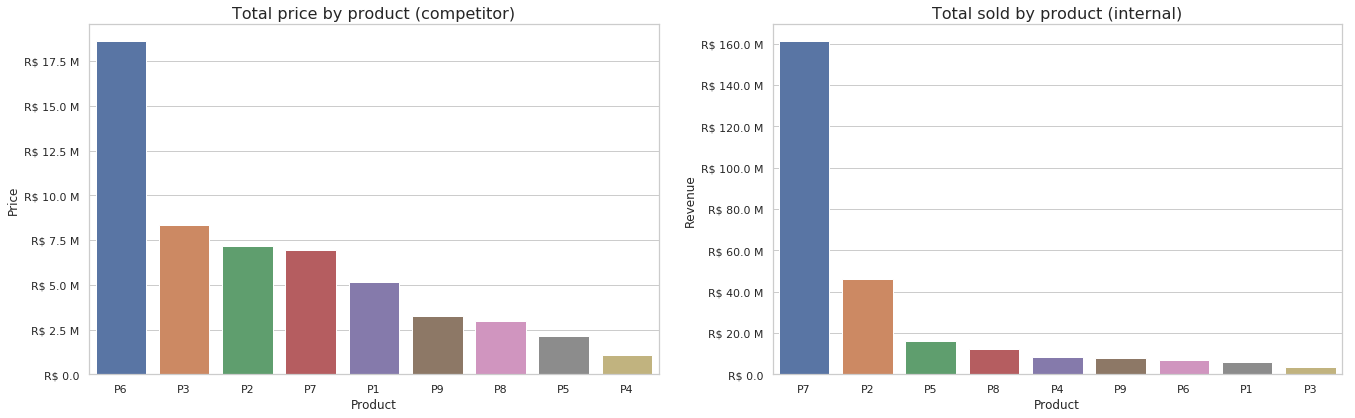

In [235]:
df_comp_sorted = df_comp \
        .groupby('PROD_ID')['COMPETITOR_PRICE'] \
        .sum() \
        .sort_values(ascending=False) \
        .to_frame() \
        .reset_index()

df_sales_sorted = round(df_sales.groupby('PROD_ID')['REVENUE'].sum(), 1).sort_values(ascending=False).to_frame().reset_index()

print('Total price by product:')

print('')
print(df_comp_sorted)
print('')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x='PROD_ID', y='COMPETITOR_PRICE', data=df_comp_sorted, ax=ax1)

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Total price by product (competitor)', fontsize=16)
ax1.set_xlabel('Product')
ax1.set_ylabel('Price')

print('Total sold by product:')

print('')
print(df_sales_sorted)
print('')

sns.barplot(x='PROD_ID', y='REVENUE', data=df_sales_sorted, ax=ax2)

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.set_title('Total sold by product (internal)', fontsize=16)
ax2.set_xlabel('Product')
ax2.set_ylabel('Revenue')

plt.show()

- Os produtos mais vendidos entre todos os competidores estão ordenados por ordem de grandeza no primeiro gráfico.
- Podemos observar que o comportamento das vendas dos concorrentes são diferentes das vendas internas, apesar de termos uma ordem de grandeza no valor totalmente diferente entre eles, o gráfico nos indica que os clientes que compram com os concorrentes, compram determinados produtos com mais frequência, comparado as vendas internas.

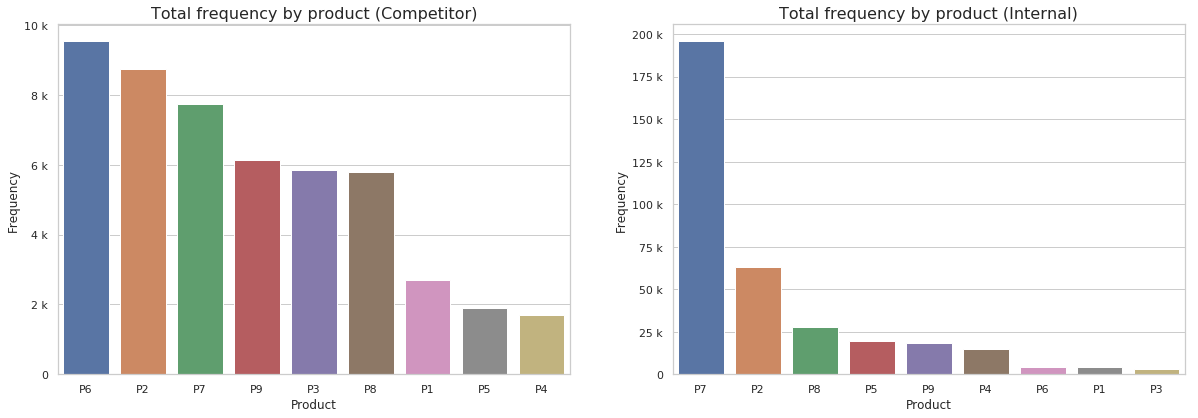

In [236]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='index', y='PROD_ID', data=df_comp.PROD_ID.value_counts().reset_index(), ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))
ax1.set_title('Total frequency by product (Competitor)', fontsize=16)
ax1.set_xlabel('Product')
ax1.set_ylabel('Frequency')

sns.barplot(x='index', y='PROD_ID', data=df_sales.PROD_ID.value_counts().reset_index(), ax=ax2)

ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))
ax2.set_title('Total frequency by product (Internal)', fontsize=16)
ax2.set_xlabel('Product')
ax2.set_ylabel('Frequency')

plt.show()

- Nos gráficos de frequências podemos observar que existem comportamentos totalmente diferentes, porém a ordem de grandeza nas vendas internas são muito maiores do que a dos concorrentes.
- Se levarmos em consideração o comportamento das vendas, vemos que a maioria dos produtos mais vendidos dos competidores são totalmente diferente, como por exemplo o produto 6, que é muito mais vendido do que os outros produtos. Já para as vendas internas ele não possui tanta saída em relação aos outros.

PROD_ID      P1    P2    P3    P4   P5    P6    P7    P8    P9
COMPETITOR                                                    
C1          765  1122  1646     0  628  2210   991  1253  1253
C2          703  1128  1652     0  636  2142   979  1263  1267
C3          396  2089   835     0  632  2166  1077  1253  1247
C4            0  1959   639  1085    0  1190  2249   863     4
C5          713   494   286    16    0     0  1549    14  1215
C6          136  1963   795   588    0  1834   903  1149  1137


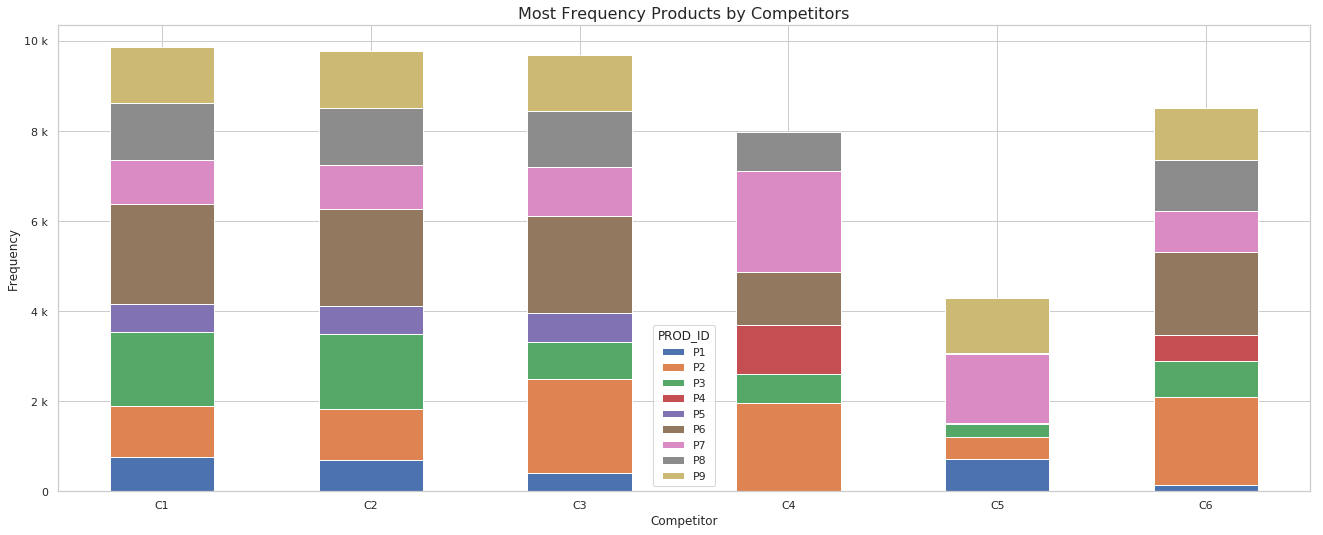

In [237]:
crosstab = pd.crosstab(
    index=df_comp.COMPETITOR,
    columns=df_comp.PROD_ID
)

print(crosstab)

f, ax = plt.subplots(figsize=(20, 8))

crosstab.plot(kind='bar', stacked=True, ax=ax)

plt.title('Most Frequency Products by Competitors', fontsize=16)
plt.xlabel('Competitor')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

plt.show()

- Neste gráfico podemos analisar a frequência de cada produto por concorrente.
- Analisando o gráfico acima, vemos que o produto P6 e P2 são muito vendido, independente do concorrente, exceto o concorrente C5.
- Podemos analisar também que o produto P7 tem uma variação entre os concorrentes, para os C4 e C5 eles tem uma venda boa.

Total price by competitor and product:

  COMP_PROD  COMPETITOR_PRICE
0     C1.P6        4168536.93
1     C2.P6        4085759.53
2     C3.P6        4063698.17
3     C6.P6        3944849.34
4     C4.P6        2359264.16
5     C2.P3        2206311.07
6     C1.P3        2186273.41
7     C4.P7        1850679.47
8     C6.P2        1695639.38
9     C4.P2        1628900.41



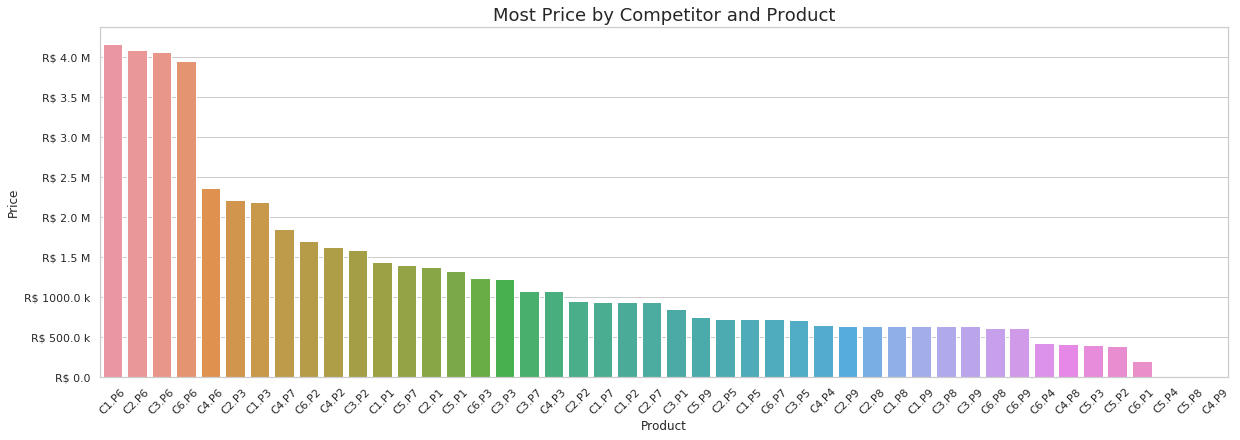

In [238]:
df = df_comp \
        .groupby('COMP_PROD')['COMPETITOR_PRICE'] \
        .sum() \
        .sort_values(ascending=False) \
        .to_frame() \
        .reset_index()

print('Total price by competitor and product:')

print('')
print(df[:10])
print('')

fig, ax = plt.subplots()

fig.set_size_inches((18, 6))

sns.barplot(x='COMP_PROD', y='COMPETITOR_PRICE', data=df)

plt.title('Most Price by Competitor and Product', fontsize=18)
plt.xlabel('Product')
plt.ylabel('Price')

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.xticks(rotation=45)

plt.show()

- Podemos analisar que o produto 6 tem um valor de venda superior aos outros produtos, independente do concorrente, exceto o concorrente 4 que tem um valor muito abaixo em relação aos outros concorrentes.

   PaymentType  Quantity
0            1     25072
1            2     25042



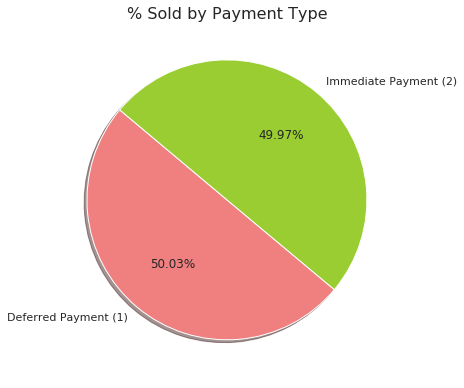

In [760]:
payments = df_comp.groupby('PAY_TYPE')['PROD_ID'].count().reset_index()
payments.columns = ['PaymentType', 'Quantity']

print(payments)
print('')

plt.figure(figsize=(12, 6))

plt.pie(
    payments.Quantity.values, 
    labels=payments.PaymentType.map(set_payment_type), 
    colors=['lightcoral', 'yellowgreen'], 
    shadow=True, 
    startangle=140,
    autopct='%1.2f%%'
)

plt.title('% Sold by Payment Type', fontsize=16)

plt.show()

Max value: R$ 6935362.06


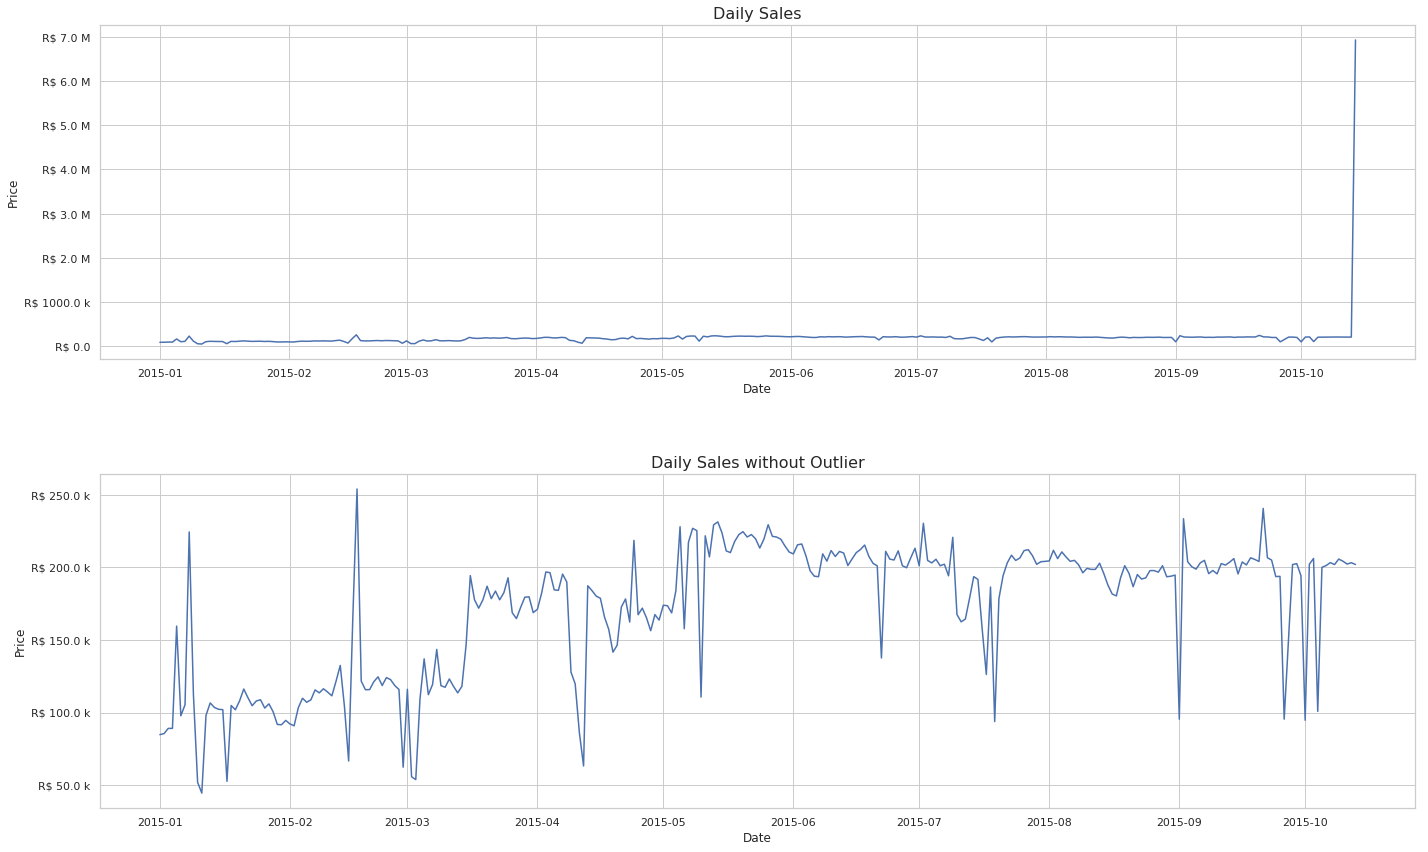

In [363]:
sale_by_date = df_comp.groupby('DATE')['COMPETITOR_PRICE'].sum().reset_index().sort_values(by='DATE')
sale_by_date.columns = ['Date', 'Price']

print('Max value: R$ %.2f' % sale_by_date.max().values[1])

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))

sns.lineplot(x='Date', y='Price', data=sale_by_date, ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Daily Sales', fontsize=16)

sns.lineplot(x='Date', y='Price', data=sale_by_date[sale_by_date['Price'] < 6000000], ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax2.set_title('Daily Sales without Outlier', fontsize=16)

plt.tight_layout(h_pad=5)

plt.show()

**Daily Sales**
- Neste gráfico podemos analisar no final do mês de outubro que temos uma venda de aproximadamente 7 milhões. Como este valor é muito grande, acaba tendo mais destaque do as vendas dos outros dias.

**Daily Sales without Outlier**
- Removendo o valor de 7 milhões, podemos analisar o comportamento do preço final das vendas do ano de 2015.
- Ao analisar a linha do gráfico, vemos que há um aumento no valor das vendas conforme o passar dos meses.
- Apesar do aumento no valor das vendas no período, podemos observar diversos picos na diminuição do valor das vendas.

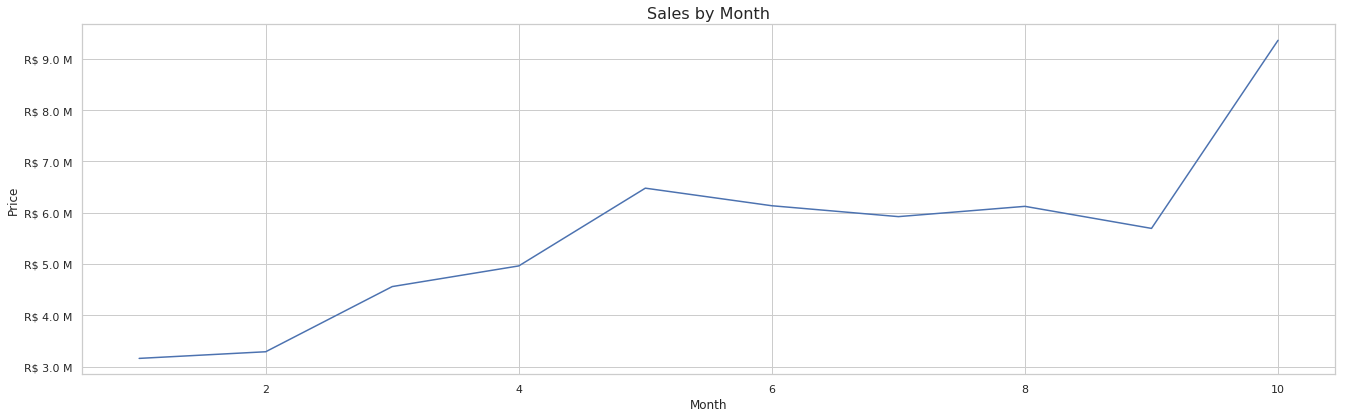

In [379]:
sales_by_month = df_comp.groupby('MONTH')['COMPETITOR_PRICE'].sum().reset_index()
sales_by_month.columns = ['Month', 'Price']

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(x='Month', y='Price', data=sales_by_month, ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))
ax1.set_title('Sales by Month', fontsize=16)

plt.show()

- Como observado no gráfico anterior, podemos concluir um aumento no valor das venda ao longo do período.

#### 7.1.1. P1

In [583]:
df_comp_p1 = df_comp[df_comp.PROD_ID == 'P1']
df_comp_p1.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
17290      P1 2015-03-16 20:10:14         C5           1424.05         2   
17291      P1 2015-03-16 20:10:14         C2           1362.50         2   
17292      P1 2015-03-16 20:10:14         C6           1499.00         2   
17310      P1 2015-03-16 08:11:32         C5           1499.00         2   
17311      P1 2015-03-16 08:11:32         C6           1499.00         2   
17312      P1 2015-06-18 20:10:22         C1           1349.10         2   
17313      P1 2015-06-18 20:10:22         C2           1259.10         2   
17314      P1 2015-06-18 20:10:22         C3           1259.10         2   
17315      P1 2015-06-18 20:10:22         C5           1424.05         2   
17316      P1 2015-03-20 08:12:50         C1           1499.00         1   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
17290  2015-03-16  2015      3   16        0  
17291  2015-03-16  2015      3   16        0  
17292  2015-03-16  2015      3   16        0  
17310  2015-03-16  2015      3   16        0  
17311  2015-03-16  2015      3   16        0  
17312  2015-06-18  2015      6   18        3  
17313  2015-06-18  2015      6   18        3  
17314  2015-06-18  2015      6   18        3  
17315  2015-06-18  2015      6   18        3  
17316  2015-03-20  2015      3   20        4

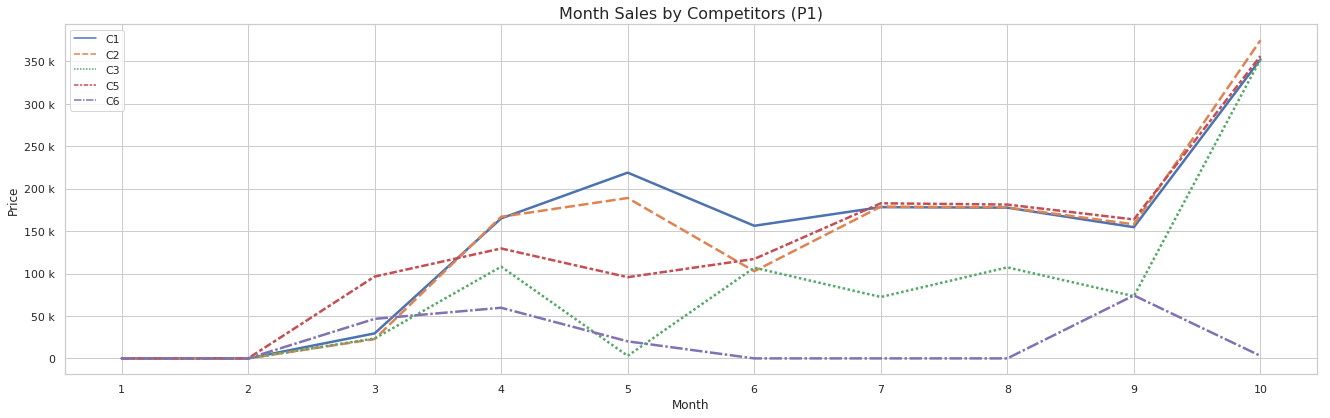

In [671]:
sales_by_comp_month = df_comp_p1.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)

ax1.set_title('Month Sales by Competitors (P1)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- No gráfico acima podemos comparar o valor total das vendas entre os concorrentes no exercício de 2015.
- Os concorrentes C1, C2, C3 e C5 vem tendo um aumento nas vendas ao longo do tempo.
- O concorrente C6 vem tendo um pequeno aumento nas vendas entre fevereiro e março, a partir do mês de abril as suas vendas vem decrescendo e se mantém constante até o mês de agosto, onde tem um pico (crescente) significativo.

       Price           Payment Type  Frequency
12  149900.0  Immediate Payment (2)          1
42  149900.0   Deferred Payment (1)          4
1   134910.0  Immediate Payment (2)          1
17  131912.0  Immediate Payment (2)          2
85    1899.0   Deferred Payment (1)        142
86    1899.0  Immediate Payment (2)        142
19    1829.9   Deferred Payment (1)          2
18    1829.9  Immediate Payment (2)          2
74    1599.9   Deferred Payment (1)         20
73    1599.9  Immediate Payment (2)         20

Payment Type
Deferred Payment (1)     46.153846
Immediate Payment (2)    53.846154
dtype: float64


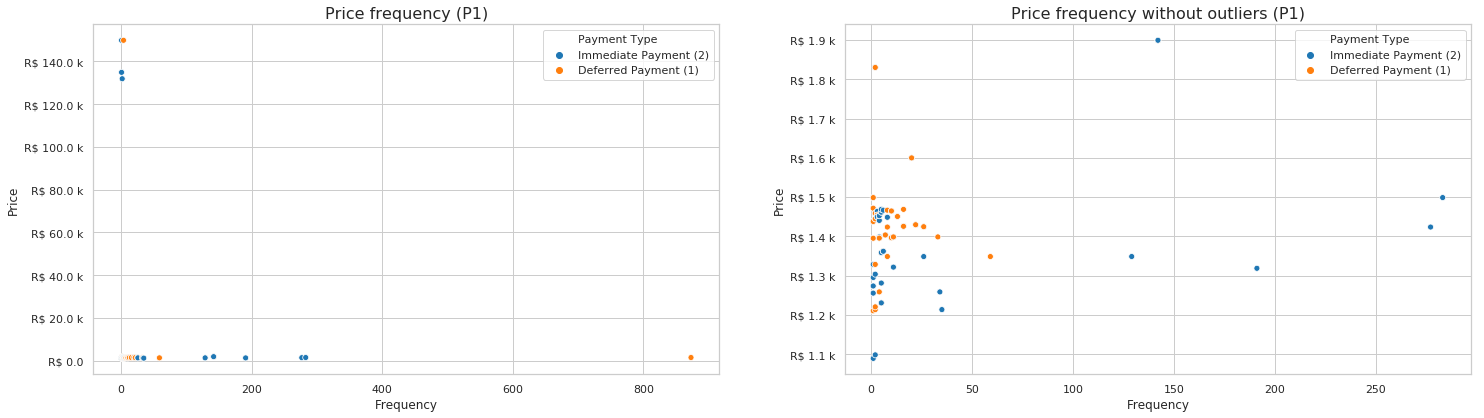

In [769]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P1'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P1)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 130000) & (qt_price['Frequency'] < 400)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P1)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primeiro gráfico, podemos observar 3 valores fora do padrão do restante das vendas, ao remover esses valores vemos que a maioria dos clientes compram mais de uma quantidade. Pois a aglomeração dos pontos encontram-se acima do valor mínimo.
- 54% das vendas foram pago à vista e 46% foram parceladas.

#### 7.1.2. P2

In [581]:
df_comp_p2 = df_comp[df_comp.PROD_ID == 'P2']
df_comp_p2.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
17293      P2 2015-02-23 20:10:06         C3            799.00         1   
17294      P2 2015-02-23 20:10:06         C5            829.00         1   
17295      P2 2015-02-23 20:10:06         C4            829.00         1   
17296      P2 2015-02-23 20:10:06         C6            878.00         1   
17297      P2 2015-02-17 08:10:23         C3            778.00         1   
17298      P2 2015-02-17 08:10:23         C5            829.00         1   
17299      P2 2015-02-17 08:10:23         C4            812.42         1   
17300      P2 2015-02-17 08:10:23         C6            879.00         1   
17301      P2 2015-02-17 08:11:34         C1            788.00         1   
17302      P2 2015-02-17 08:11:34         C4            829.00         1   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
17293  2015-02-23  2015      2   23        0  
17294  2015-02-23  2015      2   23        0  
17295  2015-02-23  2015      2   23        0  
17296  2015-02-23  2015      2   23        0  
17297  2015-02-17  2015      2   17        1  
17298  2015-02-17  2015      2   17        1  
17299  2015-02-17  2015      2   17        1  
17300  2015-02-17  2015      2   17        1  
17301  2015-02-17  2015      2   17        1  
17302  2015-02-17  2015      2   17        1

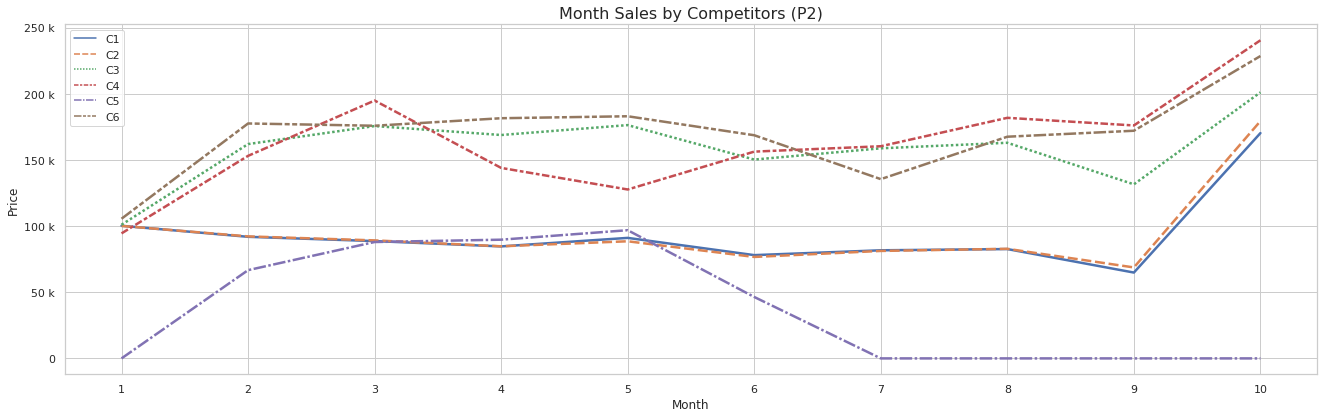

In [672]:
sales_by_comp_month = df_comp_p2.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)

ax1.set_title('Month Sales by Competitors (P2)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- O concorrente C1 tem um leve aumento no início do ano e tem pequenas variações até o mês abril, a partir do mês de maio as suas vendas vêm diminuindo levemente até ter um aumento em setembro.
- Os concorrentes C2 e C3 tem algumas variações nas vendas duranto o exercício mas no segundo semestre as suas vendas aumentam consideravelmente.
- Os concorrentes C4 e C5 tem as suas vendas constante ao longo do tempo e a partir de setembro as suas vendas aumentam.
- As vendas do concorrente C6 fica em torno de 55 mil no primeiro semestre e ao final vêm decrescendo até não terem mais vendas a partir de julho.

       Price           Payment Type  Frequency
143  79900.0  Immediate Payment (2)          1
24   79900.0   Deferred Payment (1)          1
91   74800.0  Immediate Payment (2)          1
92   74800.0   Deferred Payment (1)          1
93   72498.0  Immediate Payment (2)          1
291  72498.0   Deferred Payment (1)          3
265  65248.0  Immediate Payment (2)          2
541   1089.0   Deferred Payment (1)         13
542   1089.0  Immediate Payment (2)         13
262    979.0   Deferred Payment (1)          2

Payment Type
Deferred Payment (1)     46.944858
Immediate Payment (2)    53.055142
dtype: float64


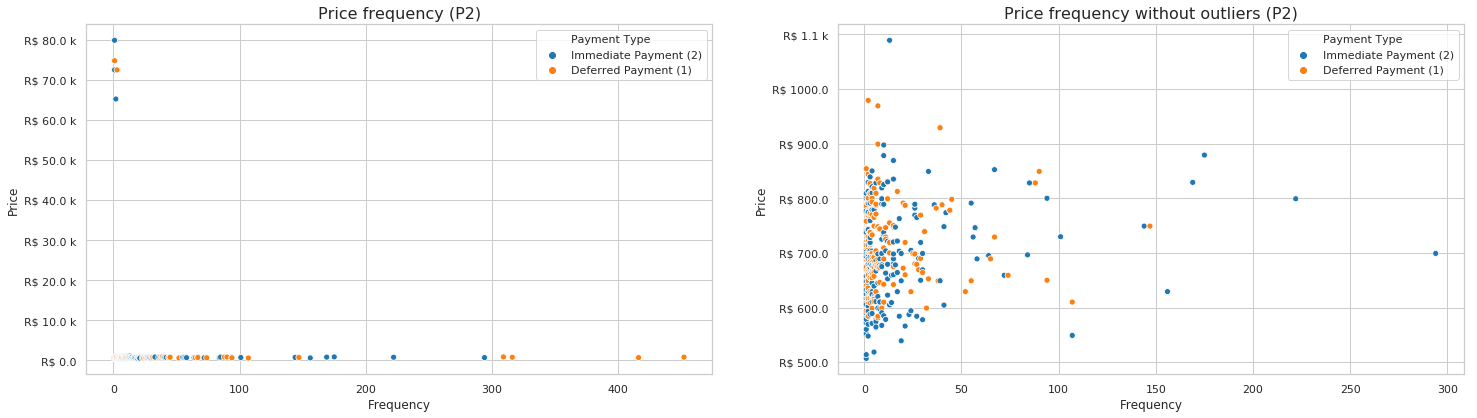

In [770]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P2'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P2)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 60000) & (qt_price['Frequency'] < 300)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P2)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- A distribuição das vendas por tipo de pagamento estão bem equilibradas, 53% para pagamentos à vista e 47 para pagamento parcelado.
- Podemos observar também que existem alguns valores que estão na faixa de 65 mil à 80 mil. Provavelmente esses produtos devem ter sido vendidos em grande quantidade, pois o agrupamento dos seus pontos ficam em torno de 500 à 1100.

#### 7.1.3. P3

In [685]:
df_comp_p3 = df_comp[df_comp.PROD_ID == 'P3']
df_comp_p3.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
37131      P3 2015-03-16 20:10:05         C3           1499.00         1   
37132      P3 2015-03-16 20:10:05         C5           1543.90         1   
37133      P3 2015-03-16 20:10:05         C3           1499.00         2   
37134      P3 2015-03-16 20:10:05         C5           1312.32         2   
37135      P3 2015-03-16 20:10:05         C2           1499.00         2   
37136      P3 2015-03-16 20:10:05         C1           1499.00         2   
37137      P3 2015-03-16 20:10:05         C2           1499.00         1   
37138      P3 2015-03-16 20:10:05         C1           1499.00         1   
37139      P3 2015-03-16 20:10:14         C4           1499.00         2   
37140      P3 2015-03-16 20:10:14         C1           1498.99         2   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
37131  2015-03-16  2015      3   16        0  
37132  2015-03-16  2015      3   16        0  
37133  2015-03-16  2015      3   16        0  
37134  2015-03-16  2015      3   16        0  
37135  2015-03-16  2015      3   16        0  
37136  2015-03-16  2015      3   16        0  
37137  2015-03-16  2015      3   16        0  
37138  2015-03-16  2015      3   16        0  
37139  2015-03-16  2015      3   16        0  
37140  2015-03-16  2015      3   16        0

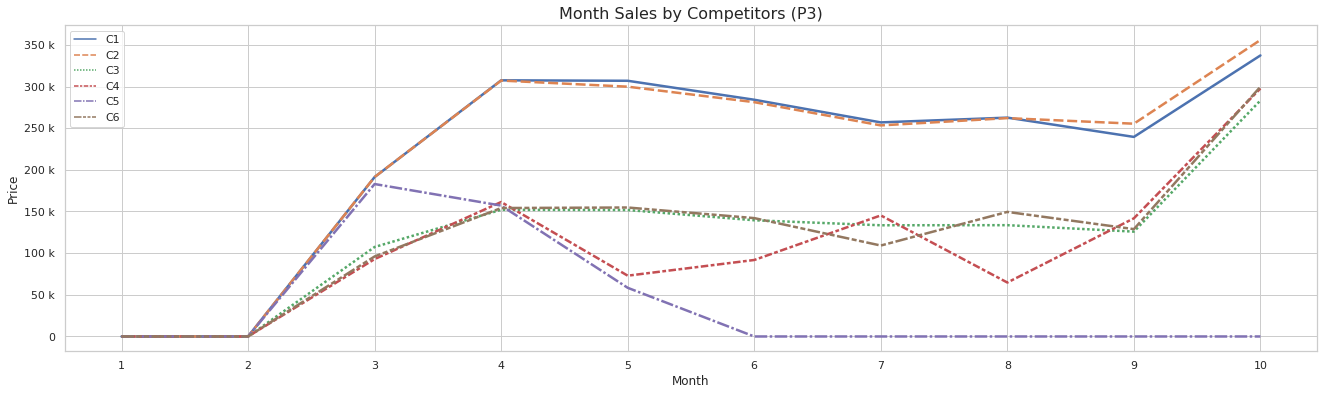

In [782]:
sales_by_comp_month = df_comp_p3.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P3)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Os concorrentes C1 e C2 possuem praticamente o mesmo comportamento, tendo um crescimento a partir de fevereiro até março, em abril eles tem uma leve queda nas vendas e em setembro voltam novamente a crescer o valor de suas vendas.
- Os concorrentes C3 C4 e C6 também possuem um comportamento pareeido, exceto o concorrente C4 que em alguns meses tem uma diminuição nas vendas.
- O concorrente C5 tem um crescimento no mês de fevereiro e de março até maio vem decrescendo, a partir de junho suas vendas ficam constante.

         Price           Payment Type  Frequency
246  119900.00   Deferred Payment (1)          5
186  119900.00  Immediate Payment (2)          3
97   107910.00  Immediate Payment (2)          1
101  105512.00  Immediate Payment (2)          1
422    1543.90   Deferred Payment (1)         43
301    1502.91   Deferred Payment (1)          8
446    1499.00   Deferred Payment (1)        305
443    1499.00  Immediate Payment (2)        198
424    1498.99   Deferred Payment (1)         46
425    1498.99  Immediate Payment (2)         46

Payment Type
Deferred Payment (1)     46.756152
Immediate Payment (2)    53.243848
dtype: float64


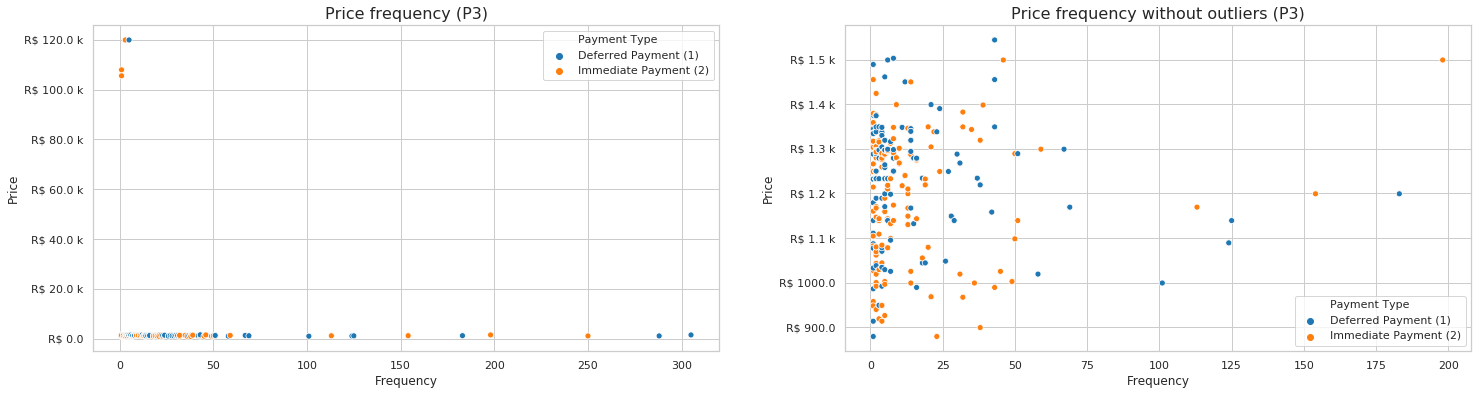

In [783]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P3'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P3)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 100000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P3)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- A distribuição dos preços das vendas estão bem equalizadas, assim como os outros produtos. Seus percentuais estão em 53% para compras para pagamento à vista e 47% para compras parceladas.
- Podemos analisar alguns outliers no primeiro gráfico, que estão em torno de 110 mil à 122 mil. Ao remover-mos eles, olhamos para o segundo gráfico e temos uma melhor visualização dos dados, onde nos mostra um agrupamento forte de pontos entre 1 e 50, que significa que grande parte dos clientes estão gastando entre 850 à 1500 por compra.

#### 7.1.4. P4

In [697]:
df_comp_p4 = df_comp[df_comp.PROD_ID == 'P4']
df_comp_p4.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
44898      P4 2015-06-18 08:11:39         C6             499.0         1   
44899      P4 2015-06-18 08:11:39         C4             569.0         1   
44900      P4 2015-06-16 20:10:25         C4             569.0         2   
44901      P4 2015-06-16 20:10:25         C6             499.0         2   
44902      P4 2015-06-16 20:10:08         C4             569.0         1   
44903      P4 2015-08-11 08:10:22         C4             569.0         2   
44904      P4 2015-08-11 08:11:24         C4             569.0         1   
44905      P4 2015-08-11 08:11:24         C6             548.0         1   
44906      P4 2015-08-11 08:10:22         C4             569.0         1   
44907      P4 2015-08-14 08:11:26         C4             499.9         2   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
44898  2015-06-18  2015      6   18        3  
44899  2015-06-18  2015      6   18        3  
44900  2015-06-16  2015      6   16        1  
44901  2015-06-16  2015      6   16        1  
44902  2015-06-16  2015      6   16        1  
44903  2015-08-11  2015      8   11        1  
44904  2015-08-11  2015      8   11        1  
44905  2015-08-11  2015      8   11        1  
44906  2015-08-11  2015      8   11        1  
44907  2015-08-14  2015      8   14        4

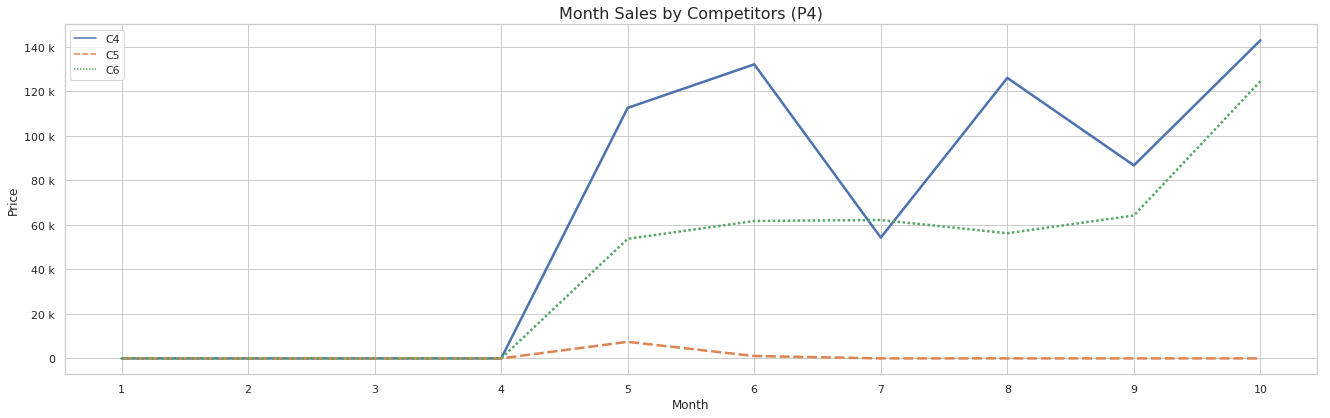

In [690]:
sales_by_comp_month = df_comp_p4.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P4)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- No gráfico acima podemos ver todas as vendas começarem a partir do mês abril e uma curva com grandes variações para o concorrente C4.
- O concorrente C6 tem um crescimento no início do mês de abirl e a partir de maio até agosto possue pequenas variações. Ao chegar em setembro as suas vendas aumentam novamente.
- O concorrente C5 possue um pequeno aumento em suas vendas na metade do mês de abril até início de maio e após isso tem uma queda em suas vendas e ficam constantes ao longo do tempo.

      Price           Payment Type  Frequency
0   49700.0  Immediate Payment (2)          1
9   49700.0   Deferred Payment (1)          1
2   46990.0   Deferred Payment (1)          1
1   46990.0  Immediate Payment (2)          1
51    655.0   Deferred Payment (1)         33
50    655.0  Immediate Payment (2)         33
62    629.9   Deferred Payment (1)         69
61    629.9  Immediate Payment (2)         69
65    569.0  Immediate Payment (2)        189
66    569.0   Deferred Payment (1)        201

Payment Type
Deferred Payment (1)     47.761194
Immediate Payment (2)    52.238806
dtype: float64


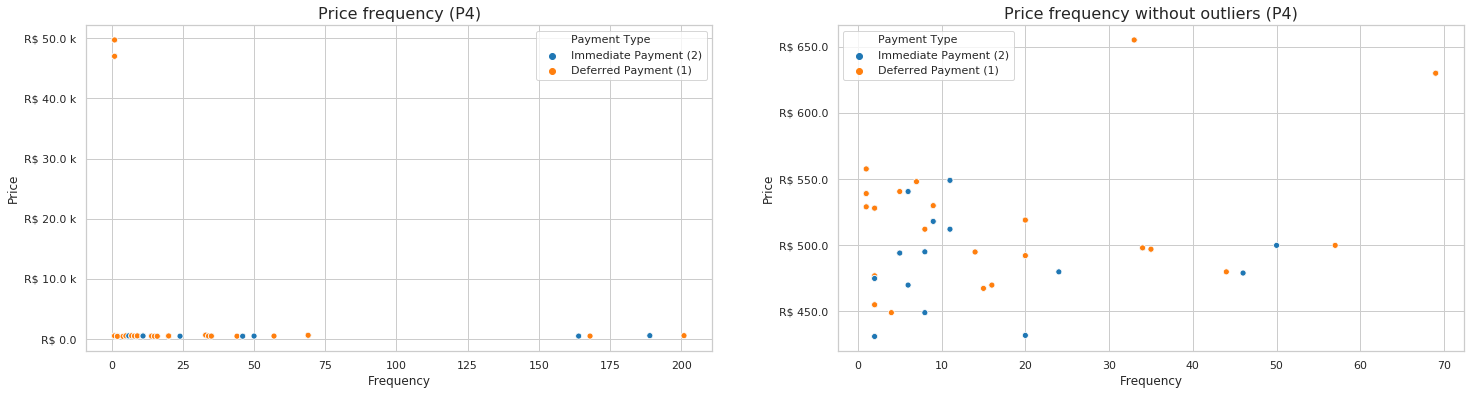

In [784]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P4'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P4)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 150)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P4)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Assim como nos outros gráficos, podemos observar 4 valores distante da média de preço.
- Podemos analisar no segundo gráfico que grande parte das frequências dos preços estão entre 1 e 20.

#### 7.1.5. P5

In [695]:
df_comp_p5 = df_comp[df_comp.PROD_ID == 'P5']
df_comp_p5.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
48169      P5 2015-06-18 20:10:22         C3            894.98         1   
48170      P5 2015-06-18 20:10:22         C1            894.98         1   
48171      P5 2015-06-18 20:10:22         C2            894.97         1   
48172      P5 2015-08-11 08:11:24         C1            838.00         1   
48173      P5 2015-06-16 20:10:25         C1            923.00         2   
48174      P5 2015-06-16 20:10:25         C3            923.00         2   
48175      P5 2015-06-16 20:10:25         C2            923.00         2   
48176      P5 2015-08-11 08:11:24         C2            838.00         1   
48177      P5 2015-08-11 08:11:24         C3            838.00         1   
48184      P5 2015-08-11 08:11:24         C3            838.00         2   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
48169  2015-06-18  2015      6   18        3  
48170  2015-06-18  2015      6   18        3  
48171  2015-06-18  2015      6   18        3  
48172  2015-08-11  2015      8   11        1  
48173  2015-06-16  2015      6   16        1  
48174  2015-06-16  2015      6   16        1  
48175  2015-06-16  2015      6   16        1  
48176  2015-08-11  2015      8   11        1  
48177  2015-08-11  2015      8   11        1  
48184  2015-08-11  2015      8   11        1

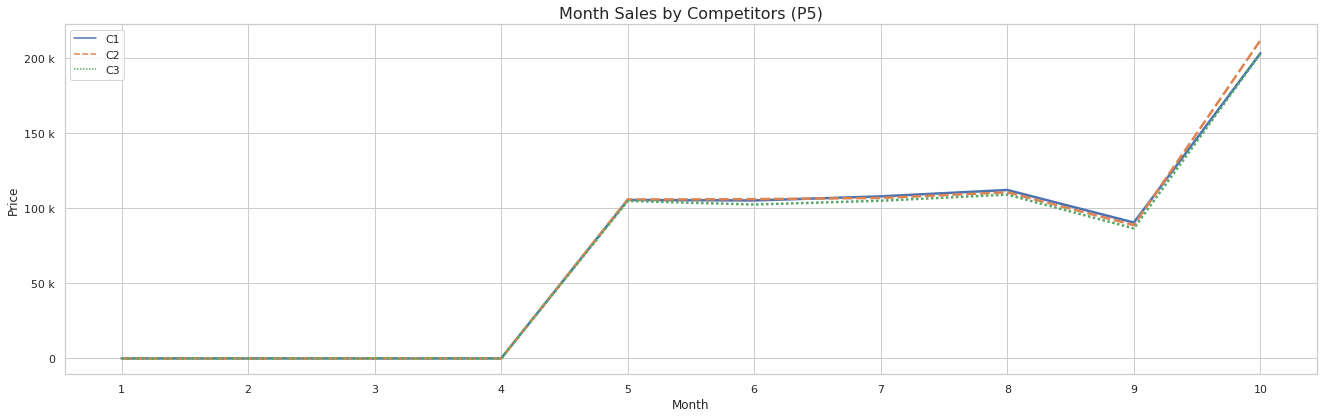

In [696]:
sales_by_comp_month = df_comp_p5.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P5)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Ao contrário dos outros gráficos, este tem um comportamento totalmente diferente, todos os concorrentes tem vendas similares ao longo do tempo.

        Price           Payment Type  Frequency
0    84890.00  Immediate Payment (2)          1
12   84890.00   Deferred Payment (1)          1
115  81900.00  Immediate Payment (2)          2
119  81900.00   Deferred Payment (1)          2
57    1299.00   Deferred Payment (1)          1
47    1169.10  Immediate Payment (2)          1
238   1149.00  Immediate Payment (2)         10
237   1149.00   Deferred Payment (1)         10
65    1139.05   Deferred Payment (1)          1
197   1099.00   Deferred Payment (1)          5

Payment Type
Deferred Payment (1)     48.62069
Immediate Payment (2)    51.37931
dtype: float64


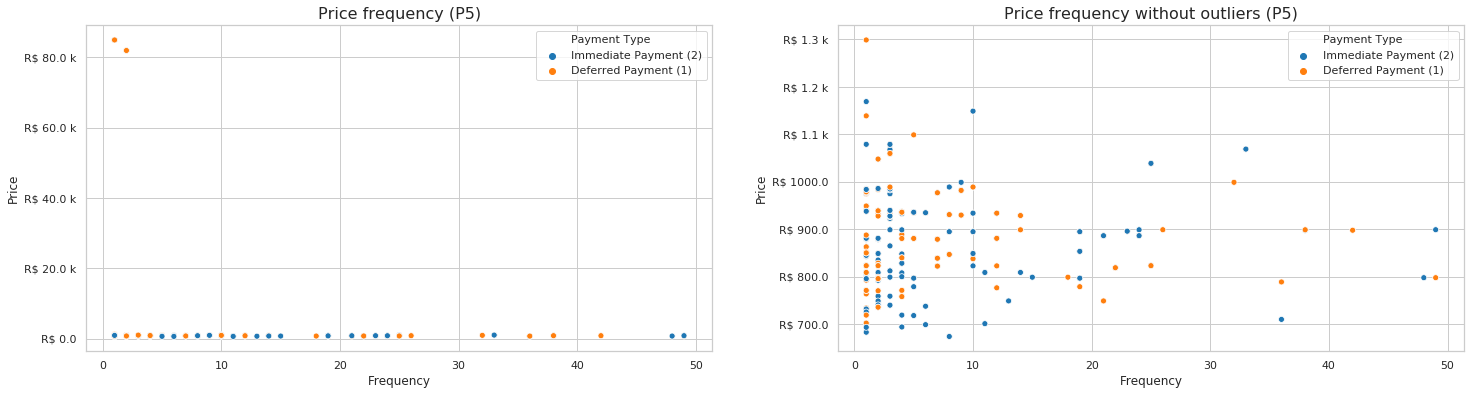

In [785]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P5'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P5)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[qt_price['Price'] < 40000], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P5)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- 51% dos dados são de pagamentos à vista e 49% para compras pareladas, podemos observar também o mesmo comportamento que os outros produtos e concorrentes, onde temos 4 valores distantes da média de preço.
- A frequência dos dados estão entre 1 e 26, que significa que grande parte dos valores das vendas para este produto estão entre 650 e 1200.

#### 7.1.6. P6

In [699]:
df_comp_p6 = df_comp[df_comp.PROD_ID == 'P6']
df_comp_p6.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
0      P6 2015-01-30 08:11:38         C3           1898.00         1   
1      P6 2015-01-30 08:11:38         C1           1898.00         1   
2      P6 2015-01-30 08:11:38         C6           1999.90         1   
3      P6 2015-01-31 20:10:14         C2           1894.88         2   
4      P6 2015-01-31 20:10:14         C3           1894.88         2   
5      P6 2015-01-31 20:10:14         C1           1894.88         2   
6      P6 2015-01-31 20:10:14         C6           1999.90         2   
7      P6 2015-01-31 20:10:05         C1           1896.62         1   
8      P6 2015-01-31 20:10:05         C2           2199.00         1   
9      P6 2015-01-31 20:10:05         C3           1895.98         1   

         DATE  YEAR  MONTH  DAY  WEEKDAY  
0  2015-01-30  2015      1   30        4  
1  2015-01-30  2015      1   30        4  
2  2015-01-30  2015      1   30        4  
3  2015-01-31  2015      1   31        5  
4  2015-01-31  2015      1   31        5  
5  2015-01-31  2015      1   31        5  
6  2015-01-31  2015      1   31        5  
7  2015-01-31  2015      1   31        5  
8  2015-01-31  2015      1   31        5  
9  2015-01-31  2015      1   31        5

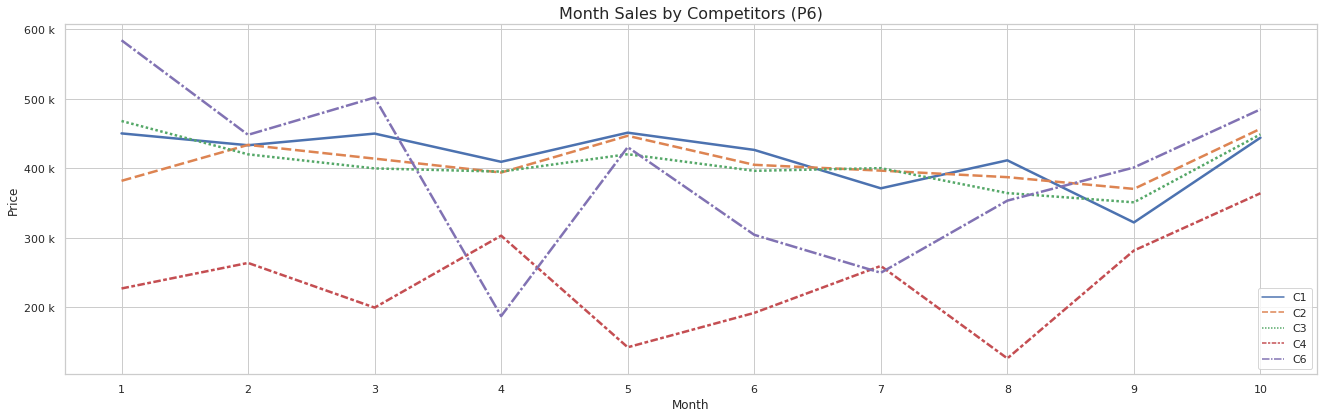

In [700]:
sales_by_comp_month = df_comp_p6.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P6)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Os concorrentes C4 e C6 possuem grandes variações nas suas vendas ao longo do tempo.
- Os concorrentes C1, C2 e C3 possuem pequenas variações nas suas vendas ao longo do tempo.

         Price           Payment Type  Frequency
0     149900.0  Immediate Payment (2)          1
258   149900.0   Deferred Payment (1)          1
620   148000.0   Deferred Payment (1)          3
623   148000.0  Immediate Payment (2)          3
363   139900.0   Deferred Payment (1)          1
380   139900.0  Immediate Payment (2)          1
1067    2799.9   Deferred Payment (1)         23
1068    2799.9  Immediate Payment (2)         23
1019    2399.0   Deferred Payment (1)         14
1022    2399.0  Immediate Payment (2)         14

Payment Type
Deferred Payment (1)     48.686515
Immediate Payment (2)    51.313485
dtype: float64


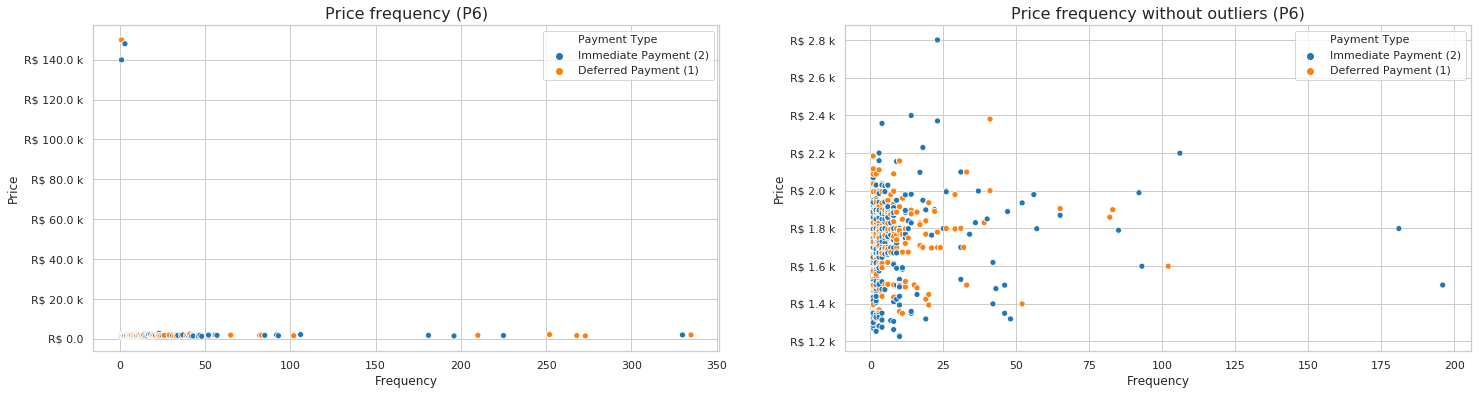

In [786]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P6'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P6)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P6)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Podemos observar 6 valores distantes da média.
- Removendo-os podemos visualizar melhor os dados e ao plotarmos vemos um agrupamento forte entre 1 e 25 (frequência) e os seus preços entre 1250  à 2000.
- A distribuição de pagamentos encontram=se em 49% para pagamentos à vista e 51% para compras.

#### 7.1.7. P7

In [702]:
df_comp_p7 = df_comp[df_comp.PROD_ID == 'P7']
df_comp_p7.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
9542      P7 2015-02-23 20:10:06         C4            849.00         1   
9543      P7 2015-02-17 08:11:34         C6            849.00         2   
9544      P7 2015-02-17 08:11:34         C4            721.65         2   
9545      P7 2015-02-17 08:11:34         C1            899.05         2   
9546      P7 2015-02-17 08:11:34         C3           1049.00         2   
9547      P7 2015-02-17 08:10:23         C4            721.65         2   
9548      P7 2015-02-17 08:10:23         C4            849.00         1   
9549      P7 2015-02-12 08:11:35         C6            849.00         2   
9550      P7 2015-02-12 08:11:35         C4            747.12         2   
9551      P7 2015-02-12 08:11:35         C3            899.00         2   

            DATE  YEAR  MONTH  DAY  WEEKDAY  
9542  2015-02-23  2015      2   23        0  
9543  2015-02-17  2015      2   17        1  
9544  2015-02-17  2015      2   17        1  
9545  2015-02-17  2015      2   17        1  
9546  2015-02-17  2015      2   17        1  
9547  2015-02-17  2015      2   17        1  
9548  2015-02-17  2015      2   17        1  
9549  2015-02-12  2015      2   12        3  
9550  2015-02-12  2015      2   12        3  
9551  2015-02-12  2015      2   12        3

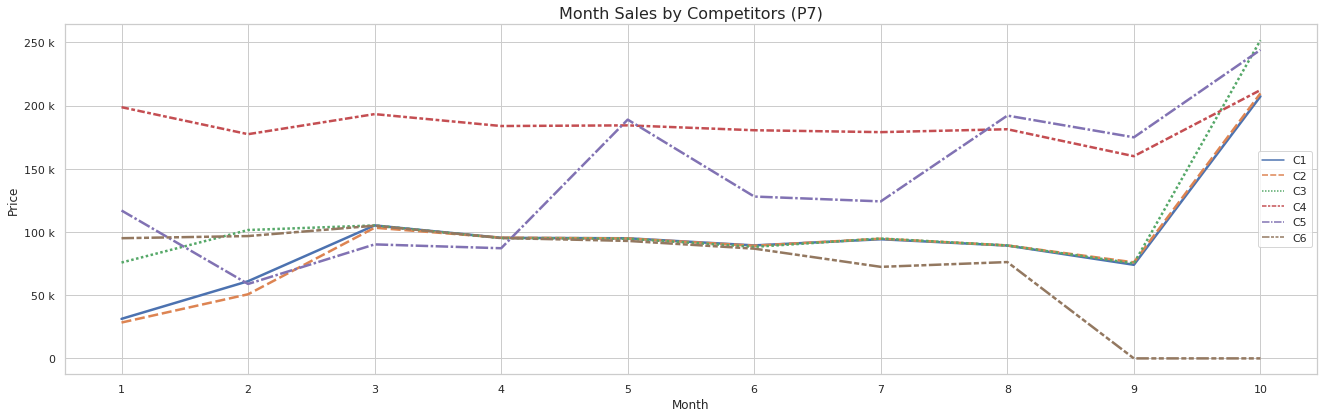

In [703]:
sales_by_comp_month = df_comp_p7.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P7)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- As vendas dos concorrentes possuem quase o mesmo comportamento, exceto o concorrente C5 e C6.
- o comportamento das vendas do concorrente C5 é crescente ao longo do tempo, porém existem diversas variações.
- Para o concorrente C6 é o inverso, as suas vendas vão decrescendo ao longo do tempo.

       Price           Payment Type  Frequency
4   104900.0   Deferred Payment (1)          1
46  104900.0  Immediate Payment (2)          1
24   86100.0   Deferred Payment (1)          1
26   84990.0   Deferred Payment (1)          1
25   84990.0  Immediate Payment (2)          1
27   84090.0  Immediate Payment (2)          1
28   84090.0   Deferred Payment (1)          1
29   77490.0  Immediate Payment (2)          1
31   69990.0   Deferred Payment (1)          1
30   69990.0  Immediate Payment (2)          1

Payment Type
Deferred Payment (1)     43.82716
Immediate Payment (2)    56.17284
dtype: float64


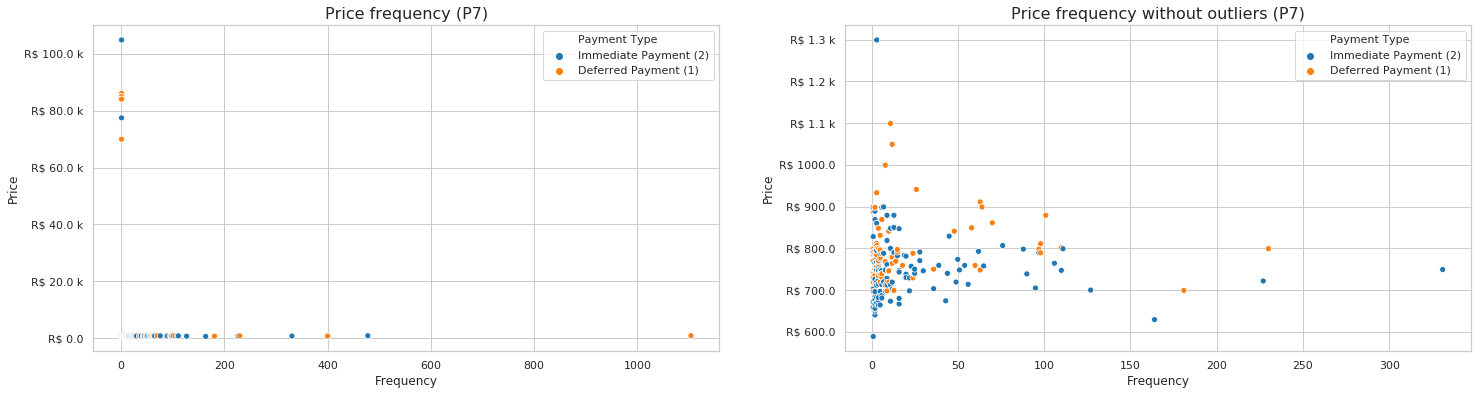

In [787]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P7'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P7)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type',
    palette='tab10',
    data=qt_price[(qt_price['Price'] < 40000) & (qt_price['Frequency'] < 400)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P7)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primeiro gráfico podemos observar um grupo de valores distantes da média que encontram-se acima de 65 mil.
- Ao remove-los podemos visualizar um forte agrupamento entre a frequência de 1 à 100 e os valores de 580 à 910 mil.

#### 7.1.8. P8

In [705]:
df_comp_p8 = df_comp[df_comp.PROD_ID == 'P8']
df_comp_p8.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
26698      P8 2015-06-18 08:11:39         C6            495.76         1   
26699      P8 2015-06-18 08:11:39         C3            498.99         1   
26700      P8 2015-06-18 08:11:39         C4            479.00         1   
26701      P8 2015-06-18 08:11:39         C2            498.99         1   
26702      P8 2015-06-18 08:11:39         C1            498.99         1   
26703      P8 2015-06-16 20:10:25         C6            495.79         2   
26704      P8 2015-06-16 20:10:25         C3            489.88         2   
26705      P8 2015-06-16 20:10:25         C4            479.00         2   
26706      P8 2015-06-16 20:10:25         C2            498.99         2   
26707      P8 2015-06-16 20:10:25         C1            498.99         2   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
26698  2015-06-18  2015      6   18        3  
26699  2015-06-18  2015      6   18        3  
26700  2015-06-18  2015      6   18        3  
26701  2015-06-18  2015      6   18        3  
26702  2015-06-18  2015      6   18        3  
26703  2015-06-16  2015      6   16        1  
26704  2015-06-16  2015      6   16        1  
26705  2015-06-16  2015      6   16        1  
26706  2015-06-16  2015      6   16        1  
26707  2015-06-16  2015      6   16        1

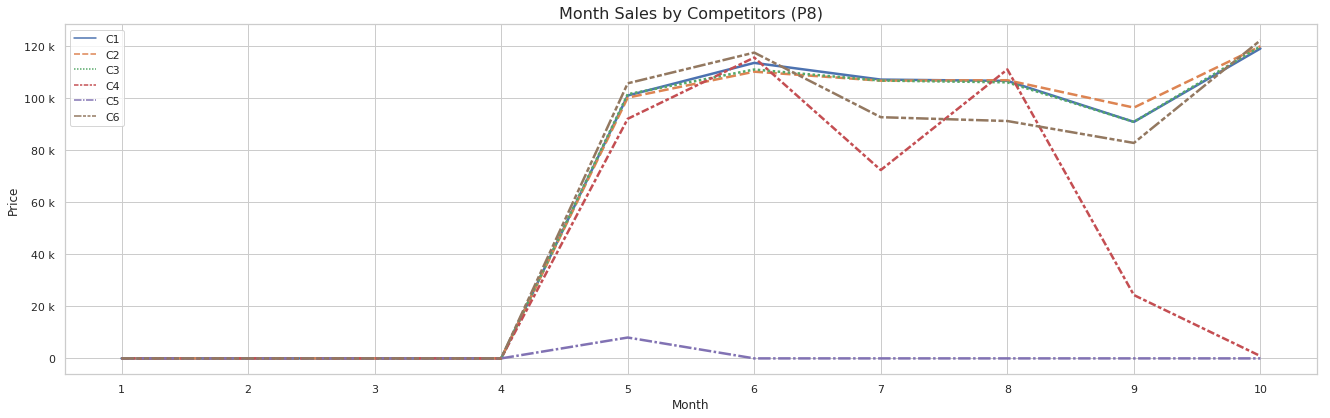

In [706]:
sales_by_comp_month = df_comp_p8.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P8)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- Todas as vendas para este produto começa a partir de abril, os concorrentes C1, C2, e C6 possuem comportamentos parecidos.
- O concorrente C4 tem uma grande venda em abril e no início de maio um aumento mais devagar, após este período podemos observar algumas varições e uma queda muito grande a partir do mês de agosto.

        Price           Payment Type  Frequency
169  39999.00  Immediate Payment (2)          1
17   39999.00   Deferred Payment (1)          1
352  39300.00  Immediate Payment (2)          3
349  39300.00   Deferred Payment (1)          3
299    636.00   Deferred Payment (1)          2
586    599.00  Immediate Payment (2)         16
612    599.00   Deferred Payment (1)         38
296    559.68  Immediate Payment (2)          2
587    539.10  Immediate Payment (2)         17
107    537.00  Immediate Payment (2)          1

Payment Type
Deferred Payment (1)     49.082569
Immediate Payment (2)    50.917431
dtype: float64


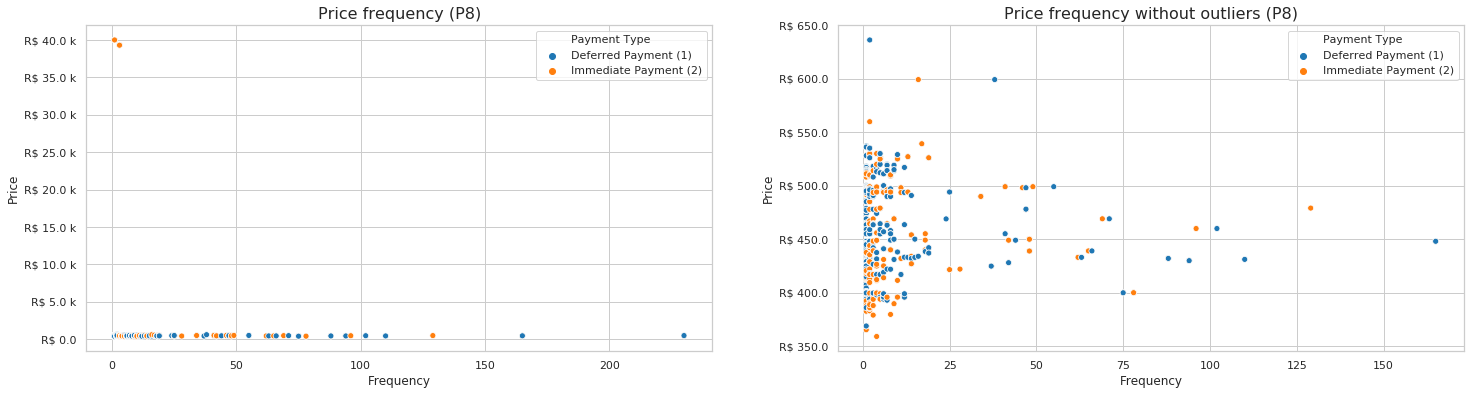

In [788]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P8'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price',
    hue='Payment Type',
    palette='tab10',
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P8)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price[(qt_price['Price'] < 30000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P8)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- No primero gráfico podemos observar alguns outliers que tem os seus valores em torno de 39.300 e 40.000.
- Ao remove-los podemos observar um forte agrupamento nas frequências entre 1 e 25 e os seus valores entre 360 e 550.

#### 7.1.9. P9

In [709]:
df_comp_p9 = df_comp[df_comp.PROD_ID == 'P9']
df_comp_p9.head(10)

PROD_ID     DATE_EXTRACTION COMPETITOR  COMPETITOR_PRICE  PAY_TYPE  \
33508      P9 2015-06-18 08:11:39         C2            478.90         1   
33509      P9 2015-06-18 08:11:39         C6            491.76         1   
33510      P9 2015-06-18 08:11:39         C1            478.90         1   
33511      P9 2015-06-18 08:11:39         C5            599.00         1   
33512      P9 2015-06-18 08:11:39         C3            510.99         1   
33513      P9 2015-06-16 20:10:08         C3            512.99         1   
33514      P9 2015-06-16 20:10:08         C6            491.79         1   
33515      P9 2015-06-16 20:10:08         C1            498.99         1   
33516      P9 2015-06-16 20:10:08         C2            489.88         1   
33517      P9 2015-06-16 20:10:25         C1            512.99         2   

             DATE  YEAR  MONTH  DAY  WEEKDAY  
33508  2015-06-18  2015      6   18        3  
33509  2015-06-18  2015      6   18        3  
33510  2015-06-18  2015      6   18        3  
33511  2015-06-18  2015      6   18        3  
33512  2015-06-18  2015      6   18        3  
33513  2015-06-16  2015      6   16        1  
33514  2015-06-16  2015      6   16        1  
33515  2015-06-16  2015      6   16        1  
33516  2015-06-16  2015      6   16        1  
33517  2015-06-16  2015      6   16        1

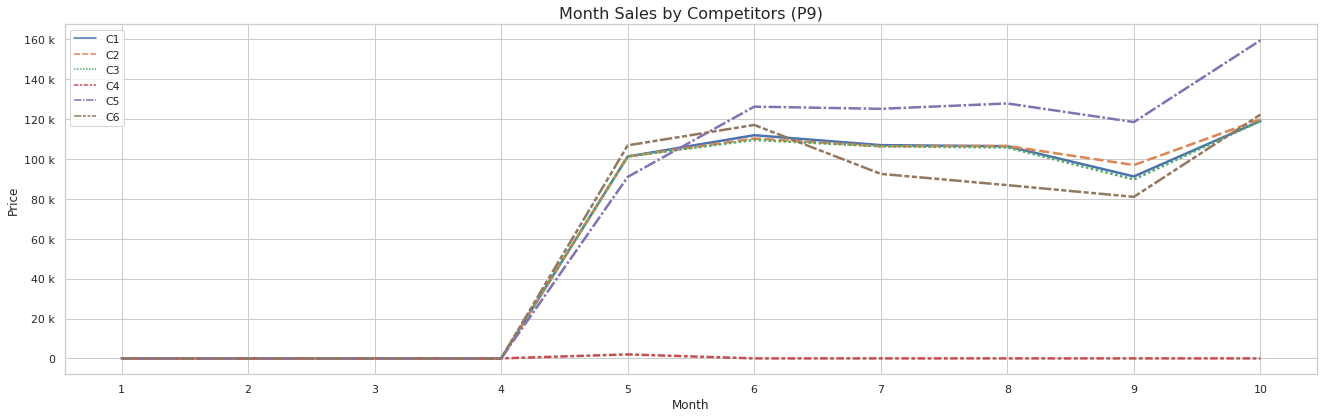

In [710]:
sales_by_comp_month = df_comp_p9.groupby(['MONTH', 'COMPETITOR'])['COMPETITOR_PRICE'].sum().reset_index()
sales_by_comp_month.columns = ['Month', 'Competitor', 'Price']

competitors = sales_by_comp_month.Competitor.sort_values().unique()
months = np.arange(10) + 1

total_competitors = sales_by_comp_month.Competitor.nunique()

values = []

for x in months:
    item = []
    
    for j in np.arange(total_competitors):
        price = sales_by_comp_month[(sales_by_comp_month['Month'] == x) & (sales_by_comp_month['Competitor'] == competitors[j])]['Price'].values
        
        item.append(round(price[0], 2) if len(price) > 0 else 0)

    values.append(item)

data = pd.DataFrame(
    data = values, 
    index = months,
    columns=competitors
)

f, ax1 = plt.subplots(1, 1, figsize=(20, 6))

sns.lineplot(data=data, linewidth=2.5, ax=ax1)
ax1.set_title('Month Sales by Competitors (P9)', fontsize=16)
ax1.set_xlabel('Month')
ax1.set_ylabel('Price')

ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_frequency))

ax1.set_xticks(months)

plt.show()

- O comportamento do produto P9 é bem parecido com o produto P8, porém o que muda são os comportamentos dos concorrentes.
- No gráfico podemos visualizar que o concorrente C4 não possui praticamente nenhuma venda para este produto, enquanto outros um alto crescimento nas vendas a partir do mês de abril e tendo poucas varições ao longo do tempo.

        Price           Payment Type  Frequency
0    56900.00   Deferred Payment (1)          1
153  50072.00  Immediate Payment (2)          1
120  39999.00   Deferred Payment (1)          1
162  39999.00  Immediate Payment (2)          1
304  39300.00   Deferred Payment (1)          3
301  39300.00  Immediate Payment (2)          3
246    636.00   Deferred Payment (1)          2
617    599.00   Deferred Payment (1)        293
560    579.00   Deferred Payment (1)         25
535    569.05  Immediate Payment (2)         16

Payment Type
Deferred Payment (1)     48.867314
Immediate Payment (2)    51.132686
dtype: float64


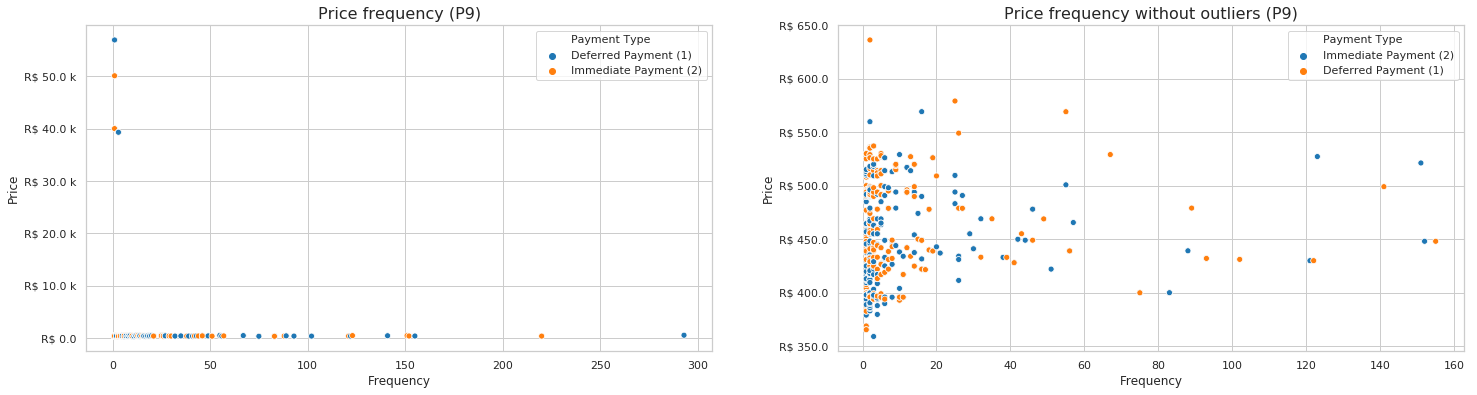

In [789]:
qt_price = df_comp[df_comp['PROD_ID'] == 'P9'].groupby(['COMPETITOR_PRICE', 'PAY_TYPE'])['PROD_ID'].count().sort_values().reset_index()
qt_price.columns = ['Price', 'Payment Type', 'Frequency']
qt_price['Payment Type'] = qt_price['Payment Type'].apply(set_payment_type)

print(qt_price.sort_values(ascending=False, by='Price')[:10])
print('')
print((qt_price.groupby('Payment Type').size() / qt_price.shape[0]) * 100)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price, 
    ax=ax1
)
ax1.set_title('Price frequency (P9)', fontsize=16)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

sns.scatterplot(
    x='Frequency', 
    y='Price', 
    hue='Payment Type', 
    palette='tab10', 
    data=qt_price[(qt_price['Price'] < 30000) & (qt_price['Frequency'] < 200)], 
    ax=ax2
)
ax2.set_title('Price frequency without outliers (P9)', fontsize=16)
ax2.yaxis.set_major_formatter(FuncFormatter(y_fmt_value))

plt.show()

- Conforme apresentado no primeiro gráfico, podemos observar alguns outliers que estão variando entre 39.300 à 56.900.
- No segundo gráfico podemos visualizar um agrupamento forte da frequência entre 1 e 20 e os seus valores entre 360 à 540.

## 8. Data Preparation

## 8.1. P1

In [252]:
df_sales[df_sales['PROD_ID'] == 'P1'].corr()

QTY_ORDER   REVENUE  YEAR     MONTH       DAY   WEEKDAY   VL_UNIT
QTY_ORDER   1.000000  0.987623   NaN -0.010768  0.009120  0.005158 -0.040068
REVENUE     0.987623  1.000000   NaN  0.063731 -0.001568 -0.000041  0.107444
YEAR             NaN       NaN   NaN       NaN       NaN       NaN       NaN
MONTH      -0.010768  0.063731   NaN  1.000000 -0.179786 -0.058022  0.496281
DAY         0.009120 -0.001568   NaN -0.179786  1.000000  0.076566 -0.063749
WEEKDAY     0.005158 -0.000041   NaN -0.058022  0.076566  1.000000 -0.037984
VL_UNIT    -0.040068  0.107444   NaN  0.496281 -0.063749 -0.037984  1.000000

In [253]:
df_sales2 = df_sales.groupby(['DATE_ORDER', 'PROD_ID', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'])['QTY_ORDER', 'REVENUE'].sum().reset_index()
df_sales2.head()

DATE_ORDER PROD_ID  YEAR  MONTH  DAY  WEEKDAY  QTY_ORDER    REVENUE
0 2015-01-01      P2  2015      1    1        3       23.0   18984.10
1 2015-01-01      P6  2015      1    1        3        1.0    1914.80
2 2015-01-01      P7  2015      1    1        3      321.0  255871.81
3 2015-01-02      P2  2015      1    2        4       90.0   74474.10
4 2015-01-02      P6  2015      1    2        4        8.0   15318.40

In [254]:
df_comp2 = df_comp.groupby(['PROD_ID', 'COMPETITOR', 'DATE', 'PAY_TYPE', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'])['COMPETITOR_PRICE'].sum().to_frame().reset_index()

In [255]:
df_comp2.head()

PROD_ID COMPETITOR       DATE  PAY_TYPE  YEAR  MONTH  DAY  WEEKDAY  \
0      P1         C1 2015-03-17         1  2015      3   17        1   
1      P1         C1 2015-03-17         2  2015      3   17        1   
2      P1         C1 2015-03-18         1  2015      3   18        2   
3      P1         C1 2015-03-18         2  2015      3   18        2   
4      P1         C1 2015-03-20         1  2015      3   20        4   

   COMPETITOR_PRICE  
0            1362.5  
1            1362.5  
2            1362.5  
3            1362.5  
4            1499.0

In [18]:
def set_colname(competitor, payment_type):
    return '%s_PRICE_T%d' % (competitor, payment_type)

In [19]:
for i in np.arange(6):
    for j in np.arange(2):
        print(set_colname('C%d' % (i + 1), (j + 1)))
        df_sales2[set_colname('C%d' % (i + 1), (j + 1))] = 0

C1_PRICE_T1
C1_PRICE_T2
C2_PRICE_T1
C2_PRICE_T2
C3_PRICE_T1
C3_PRICE_T2
C4_PRICE_T1
C4_PRICE_T2
C5_PRICE_T1
C5_PRICE_T2
C6_PRICE_T1
C6_PRICE_T2


In [20]:
df_sales2.head()

DATE_ORDER PROD_ID  YEAR  MONTH  DAY  WEEKDAY  QTY_ORDER    REVENUE  \
0 2015-01-01      P2  2015      1    1        3       23.0   18984.10   
1 2015-01-01      P6  2015      1    1        3        1.0    1914.80   
2 2015-01-01      P7  2015      1    1        3      321.0  255871.81   
3 2015-01-02      P2  2015      1    2        4       90.0   74474.10   
4 2015-01-02      P6  2015      1    2        4        8.0   15318.40   

   C1_PRICE_T1  C1_PRICE_T2  C2_PRICE_T1  C2_PRICE_T2  C3_PRICE_T1  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   C3_PRICE_T2  C4_PRICE_T1  C4_PRICE_T2  C5_PRICE_T1  C5_PRICE_T2  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   C6_PRICE_T1  C6_PRICE_T2  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0

In [21]:
def set_competitor_price(df):
    cols = df_sales2.loc[:, df_sales2.columns.map(lambda x: '_PRICE_' in x)].columns

    for i in cols:
        x = i.split('_')
        
        price = df_comp2[
            (df_comp2['PROD_ID'] == df['PROD_ID']) &
            (df_comp2['DATE'] == df['DATE_ORDER']) &
            (df_comp2['PAY_TYPE'] == int(x[2][1])) &
            (df_comp2['COMPETITOR'] == x[0])
        ]['COMPETITOR_PRICE'].values
        
        if len(price) > 0:
            df['_'.join(x)] = price[0]
        else:
            df['_'.join(x)] = 0
        
#         print('Price: %.2f' % df['_'.join(x)])
#         print(x)
#         print(df['PROD_ID'])
#         print(price)
#         print('-' * 80)
    
    return df

In [22]:
df_sales3 = df_sales2[df_sales2['PROD_ID'] == 'P1'].apply(set_competitor_price, 1)

In [23]:
df_sales3.head()

DATE_ORDER PROD_ID  YEAR  MONTH  DAY  WEEKDAY  QTY_ORDER   REVENUE  \
101 2015-02-04      P1  2015      2    4        2       10.0  14990.00   
106 2015-02-05      P1  2015      2    5        3       12.0  17688.20   
111 2015-02-06      P1  2015      2    6        4       21.0  31254.15   
116 2015-02-07      P1  2015      2    7        5        4.0   5996.00   
121 2015-02-08      P1  2015      2    8        6        7.0  10493.00   

     C1_PRICE_T1  C1_PRICE_T2  C2_PRICE_T1  C2_PRICE_T2  C3_PRICE_T1  \
101          0.0          0.0          0.0          0.0          0.0   
106          0.0          0.0          0.0          0.0          0.0   
111          0.0          0.0          0.0          0.0          0.0   
116          0.0          0.0          0.0          0.0          0.0   
121          0.0          0.0          0.0          0.0          0.0   

     C3_PRICE_T2  C4_PRICE_T1  C4_PRICE_T2  C5_PRICE_T1  C5_PRICE_T2  \
101          0.0            0            0          0.0          0.0   
106          0.0            0            0          0.0          0.0   
111          0.0            0            0          0.0          0.0   
116          0.0            0            0          0.0          0.0   
121          0.0            0            0          0.0          0.0   

     C6_PRICE_T1  C6_PRICE_T2  
101          0.0          0.0  
106          0.0          0.0  
111          0.0          0.0  
116          0.0          0.0  
121          0.0          0.0

In [25]:
df_sales3.corr().astype(float).corr()

YEAR     MONTH       DAY   WEEKDAY  QTY_ORDER   REVENUE  \
YEAR          NaN       NaN       NaN       NaN        NaN       NaN   
MONTH         NaN  1.000000 -0.254091 -0.096928  -0.327669 -0.305777   
DAY           NaN -0.254091  1.000000  0.023038  -0.400906 -0.412538   
WEEKDAY       NaN -0.096928  0.023038  1.000000  -0.332049 -0.339362   
QTY_ORDER     NaN -0.327669 -0.400906 -0.332049   1.000000  0.999720   
REVENUE       NaN -0.305777 -0.412538 -0.339362   0.999720  1.000000   
C1_PRICE_T1   NaN  0.241529 -0.147254 -0.249185  -0.468189 -0.464336   
C1_PRICE_T2   NaN  0.242364 -0.147767 -0.250074  -0.469111 -0.465233   
C2_PRICE_T1   NaN  0.244475 -0.142838 -0.248186  -0.475463 -0.471586   
C2_PRICE_T2   NaN  0.242306 -0.143435 -0.248429  -0.474796 -0.470958   
C3_PRICE_T1   NaN  0.232829 -0.134709 -0.241692  -0.470487 -0.466933   
C3_PRICE_T2   NaN  0.232473 -0.134454 -0.241885  -0.470835 -0.467289   
C4_PRICE_T1   NaN       NaN       NaN       NaN        NaN       NaN   
C4_PRICE_T2   NaN       NaN       NaN       NaN        NaN       NaN   
C5_PRICE_T1   NaN  0.239249 -0.136680 -0.252118  -0.475986 -0.472228   
C5_PRICE_T2   NaN  0.240662 -0.135526 -0.252620  -0.477309 -0.473527   
C6_PRICE_T1   NaN -0.245683 -0.091151 -0.153823  -0.013352 -0.015764   
C6_PRICE_T2   NaN -0.245683 -0.091151 -0.153823  -0.013352 -0.015764   

             C1_PRICE_T1  C1_PRICE_T2  C2_PRICE_T1  C2_PRICE_T2  C3_PRICE_T1  \
YEAR                 NaN          NaN          NaN          NaN          NaN   
MONTH           0.241529     0.242364     0.244475     0.242306     0.232829   
DAY            -0.147254    -0.147767    -0.142838    -0.143435    -0.134709   
WEEKDAY        -0.249185    -0.250074    -0.248186    -0.248429    -0.241692   
QTY_ORDER      -0.468189    -0.469111    -0.475463    -0.474796    -0.470487   
REVENUE        -0.464336    -0.465233    -0.471586    -0.470958    -0.466933   
C1_PRICE_T1     1.000000     0.999993     0.999951     0.999951     0.999674   
C1_PRICE_T2     0.999993     1.000000     0.999963     0.999967     0.999589   
C2_PRICE_T1     0.999951     0.999963     1.000000     0.999996     0.999597   
C2_PRICE_T2     0.999951     0.999967     0.999996     1.000000     0.999578   
C3_PRICE_T1     0.999674     0.999589     0.999597     0.999578     1.000000   
C3_PRICE_T2     0.999671     0.999588     0.999600     0.999584     0.999999   
C4_PRICE_T1          NaN          NaN          NaN          NaN          NaN   
C4_PRICE_T2          NaN          NaN          NaN          NaN          NaN   
C5_PRICE_T1     0.999832     0.999839     0.999885     0.999891     0.999617   
C5_PRICE_T2     0.999805     0.999816     0.999875     0.999878     0.999578   
C6_PRICE_T1    -0.284357    -0.281525    -0.280092    -0.278140    -0.297241   
C6_PRICE_T2    -0.284357    -0.281525    -0.280092    -0.278140    -0.297241   

             C3_PRICE_T2  C4_PRICE_T1  C4_PRICE_T2  C5_PRICE_T1  C5_PRICE_T2  \
YEAR                 NaN          NaN          NaN          NaN          NaN   
MONTH           0.232473          NaN          NaN     0.239249     0.240662   
DAY            -0.134454          NaN          NaN    -0.136680    -0.135526   
WEEKDAY        -0.241885          NaN          NaN    -0.252118    -0.252620   
QTY_ORDER      -0.470835          NaN          NaN    -0.475986    -0.477309   
REVENUE        -0.467289          NaN          NaN    -0.472228    -0.473527   
C1_PRICE_T1     0.999671          NaN          NaN     0.999832     0.999805   
C1_PRICE_T2     0.999588          NaN          NaN     0.999839     0.999816   
C2_PRICE_T1     0.999600          NaN          NaN     0.999885     0.999875   
C2_PRICE_T2     0.999584          NaN          NaN     0.999891     0.999878   
C3_PRICE_T1     0.999999          NaN          NaN     0.999617     0.999578   
C3_PRICE_T2     1.000000          NaN          NaN     0.999629     0.999591   
C4_PRICE_T1          NaN          NaN          NaN          NaN          NaN   
C4_

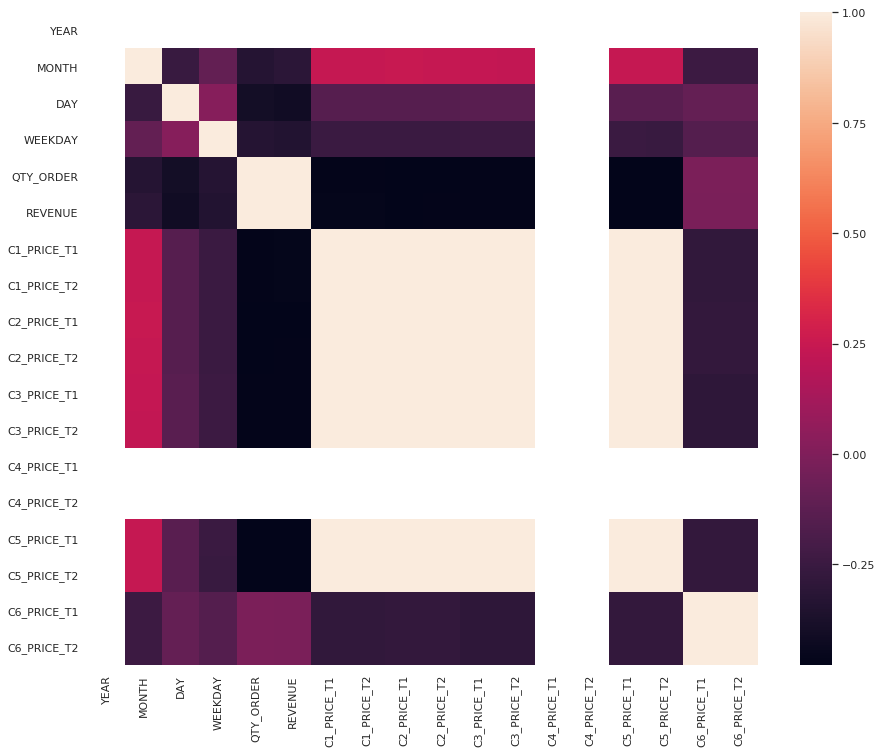

In [181]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_sales3.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [26]:
weekdays = get_weekday()

df_sales3['WEEKDAY_DESC'] = df_sales3['WEEKDAY'].map(lambda x: weekdays[x])
df_sales3['MONTH_DESC'] = df_sales3['MONTH'].map(set_month)

df_sales3.head()

DATE_ORDER PROD_ID  YEAR  MONTH  DAY  WEEKDAY  QTY_ORDER   REVENUE  \
101 2015-02-04      P1  2015      2    4        2       10.0  14990.00   
106 2015-02-05      P1  2015      2    5        3       12.0  17688.20   
111 2015-02-06      P1  2015      2    6        4       21.0  31254.15   
116 2015-02-07      P1  2015      2    7        5        4.0   5996.00   
121 2015-02-08      P1  2015      2    8        6        7.0  10493.00   

     C1_PRICE_T1  C1_PRICE_T2     ...      C3_PRICE_T1  C3_PRICE_T2  \
101          0.0          0.0     ...              0.0          0.0   
106          0.0          0.0     ...              0.0          0.0   
111          0.0          0.0     ...              0.0          0.0   
116          0.0          0.0     ...              0.0          0.0   
121          0.0          0.0     ...              0.0          0.0   

     C4_PRICE_T1  C4_PRICE_T2  C5_PRICE_T1  C5_PRICE_T2  C6_PRICE_T1  \
101            0            0          0.0          0.0          0.0   
106            0            0          0.0          0.0          0.0   
111            0            0          0.0          0.0          0.0   
116            0            0          0.0          0.0          0.0   
121            0            0          0.0          0.0          0.0   

     C6_PRICE_T2  WEEKDAY_DESC  MONTH_DESC  
101          0.0           Wed         Feb  
106          0.0           Thu         Feb  
111          0.0           Fri         Feb  
116          0.0           Sat         Feb  
121          0.0           Sun         Feb  

[5 rows x 22 columns]

In [27]:
df_sales4 = pd.get_dummies(df_sales3.drop(['WEEKDAY', 'MONTH', 'YEAR'], axis=1))

In [28]:
df_sales4.columns

Index(['DATE_ORDER', 'DAY', 'QTY_ORDER', 'REVENUE', 'C1_PRICE_T1',
       'C1_PRICE_T2', 'C2_PRICE_T1', 'C2_PRICE_T2', 'C3_PRICE_T1',
       'C3_PRICE_T2', 'C4_PRICE_T1', 'C4_PRICE_T2', 'C5_PRICE_T1',
       'C5_PRICE_T2', 'C6_PRICE_T1', 'C6_PRICE_T2', 'PROD_ID_P1',
       'WEEKDAY_DESC_Fri', 'WEEKDAY_DESC_Mon', 'WEEKDAY_DESC_Sat',
       'WEEKDAY_DESC_Sun', 'WEEKDAY_DESC_Thu', 'WEEKDAY_DESC_Tue',
       'WEEKDAY_DESC_Wed', 'MONTH_DESC_Apr', 'MONTH_DESC_Aug',
       'MONTH_DESC_Feb', 'MONTH_DESC_Jul', 'MONTH_DESC_Jun', 'MONTH_DESC_Mar',
       'MONTH_DESC_May', 'MONTH_DESC_Oct', 'MONTH_DESC_Sep'],
      dtype='object')

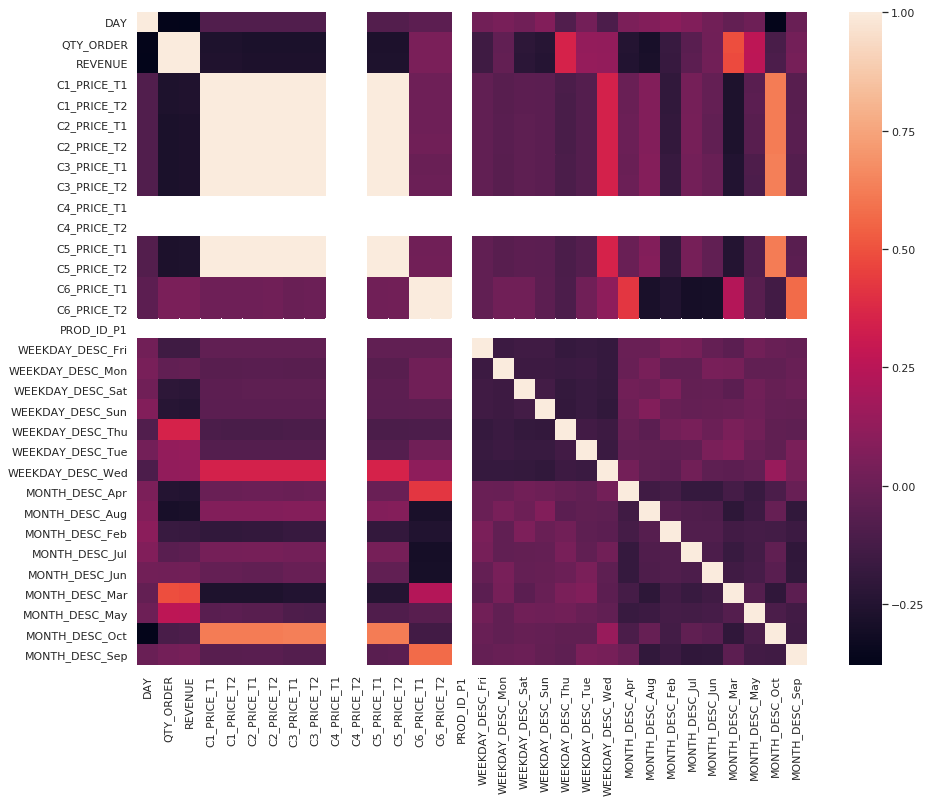

In [184]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_sales4.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [29]:
df_sales4.head()

DATE_ORDER  DAY  QTY_ORDER   REVENUE  C1_PRICE_T1  C1_PRICE_T2  \
101 2015-02-04    4       10.0  14990.00          0.0          0.0   
106 2015-02-05    5       12.0  17688.20          0.0          0.0   
111 2015-02-06    6       21.0  31254.15          0.0          0.0   
116 2015-02-07    7        4.0   5996.00          0.0          0.0   
121 2015-02-08    8        7.0  10493.00          0.0          0.0   

     C2_PRICE_T1  C2_PRICE_T2  C3_PRICE_T1  C3_PRICE_T2       ...        \
101          0.0          0.0          0.0          0.0       ...         
106          0.0          0.0          0.0          0.0       ...         
111          0.0          0.0          0.0          0.0       ...         
116          0.0          0.0          0.0          0.0       ...         
121          0.0          0.0          0.0          0.0       ...         

     WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  MONTH_DESC_Feb  \
101                 1               0               0               1   
106                 0               0               0               1   
111                 0               0               0               1   
116                 0               0               0               1   
121                 0               0               0               1   

     MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  \
101               0               0               0               0   
106               0               0               0               0   
111               0               0               0               0   
116               0               0               0               0   
121               0               0               0               0   

     MONTH_DESC_Oct  MONTH_DESC_Sep  
101               0               0  
106               0               0  
111               0               0  
116               0               0  
121               0               0  

[5 rows x 33 columns]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
X = df_sales4.drop(['QTY_ORDER', 'DATE_ORDER'], axis=1)
y = df_sales4['QTY_ORDER']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.3, random_state=0)

In [63]:
X_train.shape, X_test.shape

((176, 31), (76, 31))

In [64]:
y_train.shape, y_test.shape

((176,), (76,))

In [65]:
X_train.head()

DAY   REVENUE  C1_PRICE_T1  C1_PRICE_T2  C2_PRICE_T1  C2_PRICE_T2  \
853    22  23673.93       3398.0       3248.1       3398.0       3248.1   
1849   10  35826.10       2998.0       2998.0       2998.0       2998.0   
121     8  10493.00          0.0          0.0          0.0          0.0   
934    31  47426.10       2897.8       2897.8          0.0          0.0   
448     6   5996.00       2998.0       2998.0       2998.0       2998.0   

      C3_PRICE_T1  C3_PRICE_T2  C4_PRICE_T1  C4_PRICE_T2       ...        \
853        1499.0       1499.0            0            0       ...         
1849          0.0          0.0            0            0       ...         
121           0.0          0.0            0            0       ...         
934           0.0          0.0            0            0       ...         
448        2998.0       2998.0            0            0       ...         

      WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  MONTH_DESC_Feb  \
853                  0               0               0               0   
1849                 0               0               0               0   
121                  0               0               0               1   
934                  0               0               0               0   
448                  0               1               0               0   

      MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  \
853                0               0               0               1   
1849               0               0               0               0   
121                0               0               0               0   
934                0               0               0               1   
448                0               0               0               0   

      MONTH_DESC_Oct  MONTH_DESC_Sep  
853                0               0  
1849               0               1  
121                0               0  
934                0               0  
448                0               0  

[5 rows x 31 columns]

In [165]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

dtm.fit(X_train, y_train)

y_pred = dtm.predict(X_test)

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 0.04942668047392025


### Teste (utilizar este código)

In [418]:
import pydot
import graphviz

from ipywidgets import interactive
from sklearn import tree

In [421]:
def compara_modelo(maxdepth, xtrain, xtest, ytrain, ytest):
    if maxdepth == 0:
        dt = DecisionTreeRegressor(random_state=0)
    else:
        dt = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
    
    dt.fit(xtrain, ytrain)
    train_score = dt.score(xtrain, ytrain)
    test_score = dt.score(xtest, ytest)
    
    return train_score, test_score    

In [184]:
df_p1 = df_sales[df_sales['PROD_ID'] == 'P1']
df_p1.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
200041      P1 2015-07-27        1.0  1490.17  2015      7   27        0   
200042      P1 2015-07-30        1.0  1499.00  2015      7   30        3   
200043      P1 2015-07-28        1.0  1499.00  2015      7   28        1   
200044      P1 2015-07-25        1.0  1499.00  2015      7   25        5   
200045      P1 2015-07-29        1.0  1499.00  2015      7   29        2   

        VL_UNIT  
200041  1490.17  
200042  1499.00  
200043  1499.00  
200044  1499.00  
200045  1499.00

In [187]:
weekdays = get_weekday()

df_p1.loc[:, 'WEEKDAY_DESC'] = df_p1['WEEKDAY'].map(lambda x: weekdays[x])
df_p1.loc[:, 'MONTH_DESC'] = df_p1['MONTH'].map(set_month)

In [188]:
df_p1.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
200041      P1 2015-07-27        1.0  1490.17  2015      7   27        0   
200042      P1 2015-07-30        1.0  1499.00  2015      7   30        3   
200043      P1 2015-07-28        1.0  1499.00  2015      7   28        1   
200044      P1 2015-07-25        1.0  1499.00  2015      7   25        5   
200045      P1 2015-07-29        1.0  1499.00  2015      7   29        2   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
200041  1490.17          Mon        Jul  
200042  1499.00          Thu        Jul  
200043  1499.00          Tue        Jul  
200044  1499.00          Sat        Jul  
200045  1499.00          Wed        Jul

In [189]:
df_p1 = pd.get_dummies(df_p1.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [190]:
df_p1.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P1  WEEKDAY_DESC_Fri  \
200041        1.0  1490.17  1490.17           1                 0   
200042        1.0  1499.00  1499.00           1                 0   
200043        1.0  1499.00  1499.00           1                 0   
200044        1.0  1499.00  1499.00           1                 0   
200045        1.0  1499.00  1499.00           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
200041                 1                 0                 0   
200042                 0                 0                 0   
200043                 0                 0                 0   
200044                 0                 1                 0   
200045                 0                 0                 0   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
200041                 0                 0                 0               0   
200042                 1                 0                 0               0   
200043                 0                 1                 0               0   
200044                 0                 0                 0               0   
200045                 0                 0                 1               0   

        MONTH_DESC_Aug  MONTH_DESC_Feb  MONTH_DESC_Jul  MONTH_DESC_Jun  \
200041               0               0               1               0   
200042               0               0               1               0   
200043               0               0               1               0   
200044               0               0               1               0   
200045               0               0               1               0   

        MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
200041               0               0               0               0  
200042               0               0               0               0  
200043               0               0               0               0  
200044               0               0               0               0  
200045               0               0               0               0

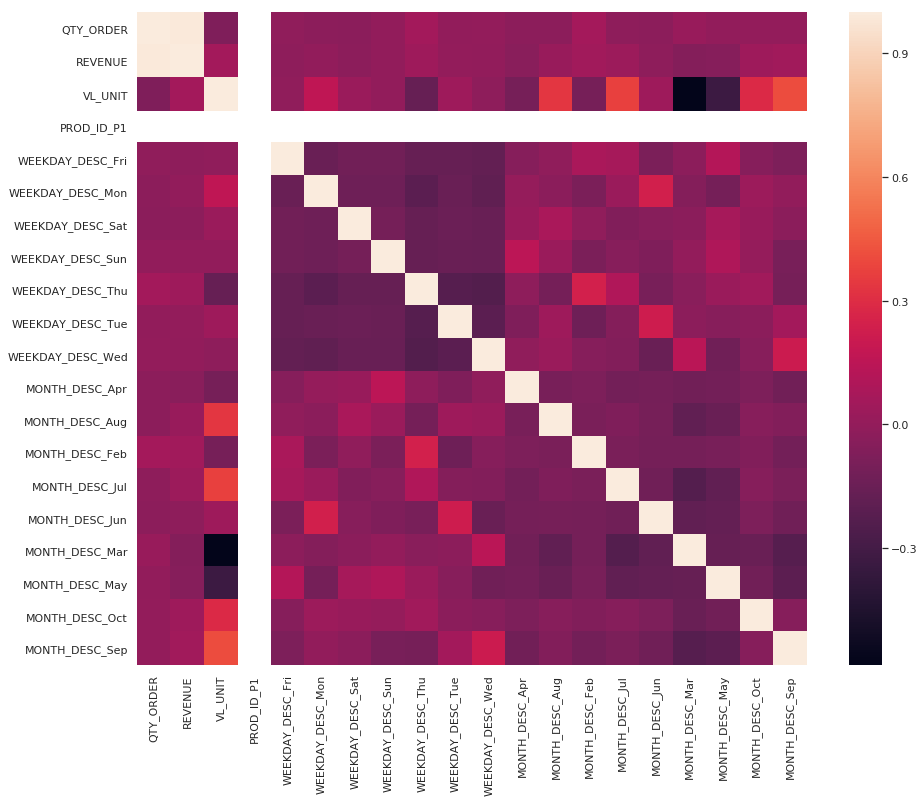

In [191]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p1.corr().astype(float).corr(), vmax=1.0)

plt.show()

- É possível observar poucas correlações entre as variáveis.

In [192]:
X = df_p1.drop('QTY_ORDER', axis=1)
y = df_p1['QTY_ORDER']

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2863, 19), (1228, 19))

In [194]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P1  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
200873  1429.00  1429.00           1                 0                 0   
200897  1399.00  1399.00           1                 0                 0   
203479  1490.17  1490.17           1                 0                 0   
202423  1499.00  1499.00           1                 0                 1   
202165  1499.00  1499.00           1                 1                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
200873                 0                 0                 0   
200897                 1                 0                 0   
203479                 0                 0                 0   
202423                 0                 0                 0   
202165                 0                 0                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
200873                 0                 1               1               0   
200897                 0                 0               1               0   
203479                 1                 0               0               0   
202423                 0                 0               0               0   
202165                 0                 0               0               0   

        MONTH_DESC_Feb  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
200873               0               0               0               0   
200897               0               0               0               0   
203479               0               0               0               0   
202423               0               1               0               0   
202165               0               0               1               0   

        MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
200873               0               0               0  
200897               0               0               0  
203479               1               0               0  
202423               0               0               0  
202165               0               0               0

In [198]:
model_v1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_v1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_v1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P1..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


- Somente a variável REVENUE tem um grau de importância.

In [333]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2863, 1), (1228, 1))

In [338]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(10):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.961737793795374
1          0.8582019206803876                  -0.0013863549912849216
2          0.9599946103212348                  0.5617701982696841
3          1.0                  0.961737793795374
4          1.0                  0.961737793795374
5          1.0                  0.961737793795374
6          1.0                  0.961737793795374
7          1.0                  0.961737793795374
8          1.0                  0.961737793795374
9          1.0                  0.961737793795374


- Análise dos scores para analisar possíveis overfitting.

In [367]:
model_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.04942668047392025


- O RMSE indica que a média dos erros variam 0.0494 tanto para cima quanto para baixo.

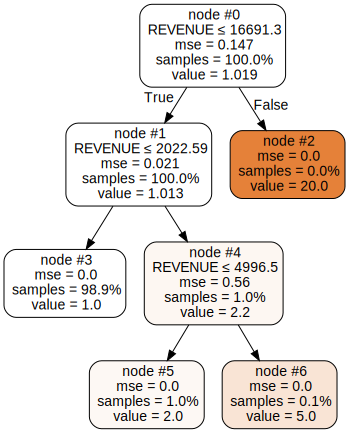

In [218]:
dot_data = tree.export_graphviz(
    model_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [362]:
model_2 = LinearRegression().fit(X_train, y_train)

model_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9801557614485283, 0.9489327961581638)

Ao analisar o resultado, é possível observar que não há overfitting nos dados.

In [368]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_2.predict(X_test))**0.5))

RMSE: 0.05710149508183192


O modelo utilizando árvore de decisão nos retorna um RMSE menor do que com a regressão linear

### GridSearchCV

In [343]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [369]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.17821043082469423


- O RMSE indica que a média dos erros variam 0.1782 tanto para cima quanto para baixo.
- Mesmo utilizando o otimizador de parâmetros, o RMSE é maior do que o modelo principal.

### Cross Validation

In [344]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [383]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.03140297775387473
RMSE - DecisionTreeRegression: 0.23614116481226888


## 8.2. P2

In [404]:
df_p2 = df_sales[df_sales['PROD_ID'] == 'P2']
df_p2.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
204132      P2 2015-06-23        1.0   649.00  2015      6   23        1   
204133      P2 2015-07-29        1.0   664.05  2015      7   29        2   
204134      P2 2015-07-31        1.0   664.05  2015      7   31        4   
204135      P2 2015-07-31        1.0   664.05  2015      7   31        4   
204136      P2 2015-09-04        1.0   658.99  2015      9    4        4   

        VL_UNIT  
204132   649.00  
204133   664.05  
204134   664.05  
204135   664.05  
204136   658.99

In [406]:
weekdays = get_weekday()

df_p2.loc[:, 'WEEKDAY_DESC'] = df_p2['WEEKDAY'].map(lambda x: weekdays[x])
df_p2.loc[:, 'MONTH_DESC'] = df_p2['MONTH'].map(set_month)

In [407]:
df_p2.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
204132      P2 2015-06-23        1.0   649.00  2015      6   23        1   
204133      P2 2015-07-29        1.0   664.05  2015      7   29        2   
204134      P2 2015-07-31        1.0   664.05  2015      7   31        4   
204135      P2 2015-07-31        1.0   664.05  2015      7   31        4   
204136      P2 2015-09-04        1.0   658.99  2015      9    4        4   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
204132   649.00          Tue        Jun  
204133   664.05          Wed        Jul  
204134   664.05          Fri        Jul  
204135   664.05          Fri        Jul  
204136   658.99          Fri        Sep

In [408]:
df_p2 = pd.get_dummies(df_p2.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [409]:
df_p2.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P2  WEEKDAY_DESC_Fri  \
204132        1.0   649.00   649.00           1                 0   
204133        1.0   664.05   664.05           1                 0   
204134        1.0   664.05   664.05           1                 1   
204135        1.0   664.05   664.05           1                 1   
204136        1.0   658.99   658.99           1                 1   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
204132                 0                 0                 0   
204133                 0                 0                 0   
204134                 0                 0                 0   
204135                 0                 0                 0   
204136                 0                 0                 0   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue       ...        MONTH_DESC_Apr  \
204132                 0                 1       ...                     0   
204133                 0                 0       ...                     0   
204134                 0                 0       ...                     0   
204135                 0                 0       ...                     0   
204136                 0                 0       ...                     0   

        MONTH_DESC_Aug  MONTH_DESC_Feb  MONTH_DESC_Jan  MONTH_DESC_Jul  \
204132               0               0               0               0   
204133               0               0               0               1   
204134               0               0               0               1   
204135               0               0               0               1   
204136               0               0               0               0   

        MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  \
204132               1               0               0               0   
204133               0               0               0               0   
204134               0               0               0               0   
204135               0               0               0               0   
204136               0               0               0               0   

        MONTH_DESC_Sep  
204132               0  
204133               0  
204134               0  
204135               0  
204136               1  

[5 rows x 21 columns]

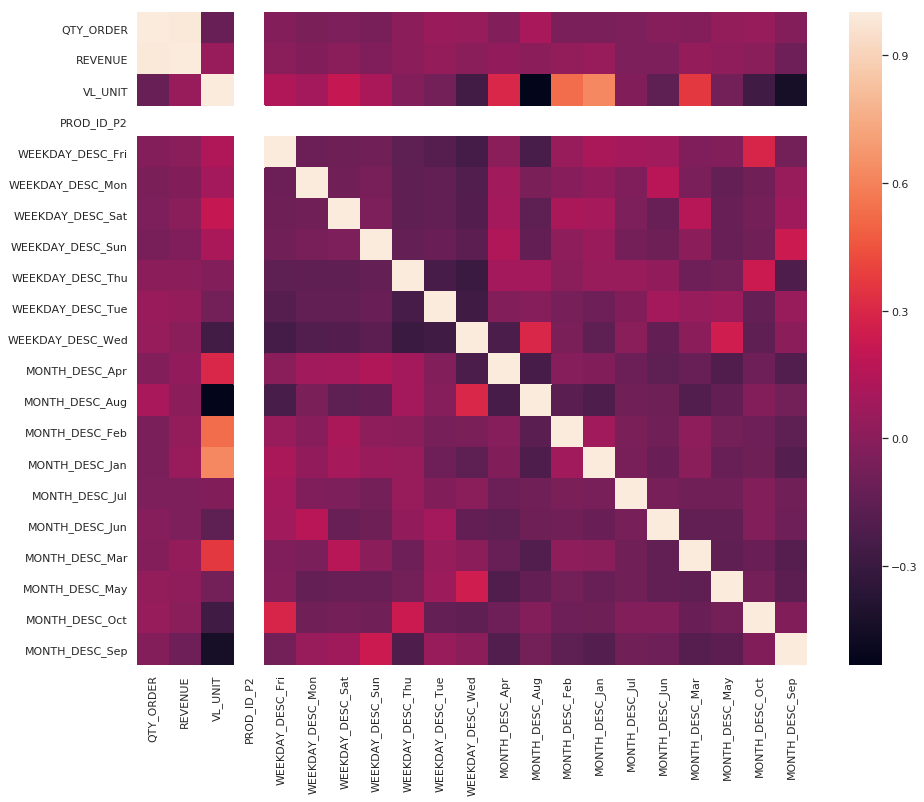

In [410]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p2.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [411]:
X = df_p2.drop('QTY_ORDER', axis=1)
y = df_p2['QTY_ORDER']

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((44350, 20), (19008, 20))

In [413]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P2  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
210210    699.0    699.0           1                 0                 0   
211080    829.0    829.0           1                 0                 0   
254928    829.0    829.0           1                 0                 0   
258379    749.0    749.0           1                 0                 0   
206750   1220.0    610.0           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
210210                 0                 0                 0   
211080                 1                 0                 0   
254928                 0                 0                 1   
258379                 0                 0                 0   
206750                 0                 0                 1   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
210210                 1                 0               0               0   
211080                 0                 0               0               0   
254928                 0                 0               0               0   
258379                 1                 0               0               0   
206750                 0                 0               0               1   

        MONTH_DESC_Feb  MONTH_DESC_Jan  MONTH_DESC_Jul  MONTH_DESC_Jun  \
210210               0               0               0               0   
211080               0               1               0               0   
254928               0               1               0               0   
258379               0               0               0               0   
206750               0               0               0               0   

        MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
210210               1               0               0               0  
211080               0               0               0               0  
254928               0               0               0               0  
258379               0               1               0               0  
206750               0               0               0               0

In [423]:
model_p2_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p2_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p2_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0


In [415]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((44350, 1), (19008, 1))

In [422]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9892736960547803
1          0.4629212626677194                  0.3139646341186453
2          0.8734426216770328                  0.8444441799761939
3          0.9763108243319876                  0.9629230198334154
4          0.9934131064275088                  0.9848824318541084
5          0.9963953048002374                  0.986724481728117
6          0.9973614816731585                  0.9882986837272717
7          0.9988001445822774                  0.9889202931012852
8          0.9994357421826869                  0.9892627969730005
9          0.999766367421488                  0.9893716452007544
10          0.9998744285354415                  0.9894022473143231


In [425]:
model_p2_2 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p2_2.fit(X_train, y_train)

y_pred = model_p2_2.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.12386261748443689


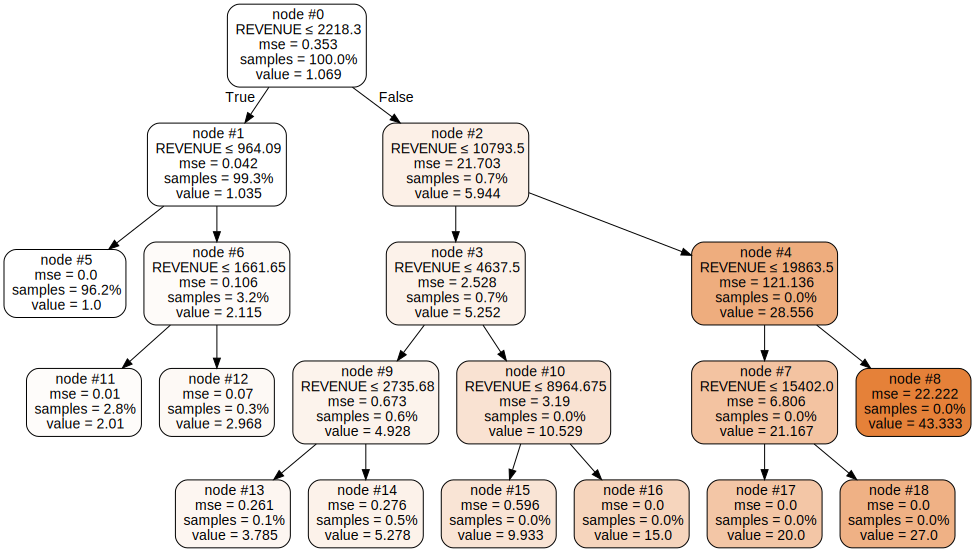

In [426]:
dot_data = tree.export_graphviz(
    model_p2_2,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [441]:
model_p2_2 = LinearRegression().fit(X_train, y_train)

model_p2_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9519680803258193, 0.14869517896061402)

Ao analisar o resultado acima é posssível observar um overfitting nos dados, pois o score com os dados de treino há um percentual de acerto de 95% e para a base de teste apenas 15%

In [442]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_2.predict(X_test))**0.5))

RMSE: 0.7780961856085976


### GridSearchCV

In [456]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p2_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [457]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.4693339375021891


### Cross Validation

In [458]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [460]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

cv_result = cross_val_score(model_p2_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p2_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.06355674065471896
RMSE - DecisionTreeRegression: 0.12218437036860416


## 8.3. P3

In [484]:
df_p3 = df_sales[df_sales['PROD_ID'] == 'P3']
df_p3.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
348192      P3 2015-07-31        1.0   1049.0  2015      7   31        4   
348193      P3 2015-07-31        1.0   1049.0  2015      7   31        4   
348194      P3 2015-08-02        1.0   1098.0  2015      8    2        6   
348195      P3 2015-07-21        1.0   1098.0  2015      7   21        1   
348196      P3 2015-07-25        1.0   1149.0  2015      7   25        5   

        VL_UNIT  
348192   1049.0  
348193   1049.0  
348194   1098.0  
348195   1098.0  
348196   1149.0

In [486]:
weekdays = get_weekday()

df_p3.loc[:, 'WEEKDAY_DESC'] = df_p3['WEEKDAY'].map(lambda x: weekdays[x])
df_p3.loc[:, 'MONTH_DESC'] = df_p3['MONTH'].map(set_month)

In [487]:
df_p3.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
348192      P3 2015-07-31        1.0   1049.0  2015      7   31        4   
348193      P3 2015-07-31        1.0   1049.0  2015      7   31        4   
348194      P3 2015-08-02        1.0   1098.0  2015      8    2        6   
348195      P3 2015-07-21        1.0   1098.0  2015      7   21        1   
348196      P3 2015-07-25        1.0   1149.0  2015      7   25        5   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
348192   1049.0          Fri        Jul  
348193   1049.0          Fri        Jul  
348194   1098.0          Sun        Aug  
348195   1098.0          Tue        Jul  
348196   1149.0          Sat        Jul

In [488]:
df_p3 = pd.get_dummies(df_p3.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [489]:
df_p3.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P3  WEEKDAY_DESC_Fri  \
348192        1.0   1049.0   1049.0           1                 1   
348193        1.0   1049.0   1049.0           1                 1   
348194        1.0   1098.0   1098.0           1                 0   
348195        1.0   1098.0   1098.0           1                 0   
348196        1.0   1149.0   1149.0           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
348192                 0                 0                 0   
348193                 0                 0                 0   
348194                 0                 0                 1   
348195                 0                 0                 0   
348196                 0                 1                 0   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
348192                 0                 0                 0               0   
348193                 0                 0                 0               0   
348194                 0                 0                 0               0   
348195                 0                 1                 0               0   
348196                 0                 0                 0               0   

        MONTH_DESC_Aug  MONTH_DESC_Feb  MONTH_DESC_Jul  MONTH_DESC_Jun  \
348192               0               0               1               0   
348193               0               0               1               0   
348194               1               0               0               0   
348195               0               0               1               0   
348196               0               0               1               0   

        MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
348192               0               0               0               0  
348193               0               0               0               0  
348194               0               0               0               0  
348195               0               0               0               0  
348196               0               0               0               0

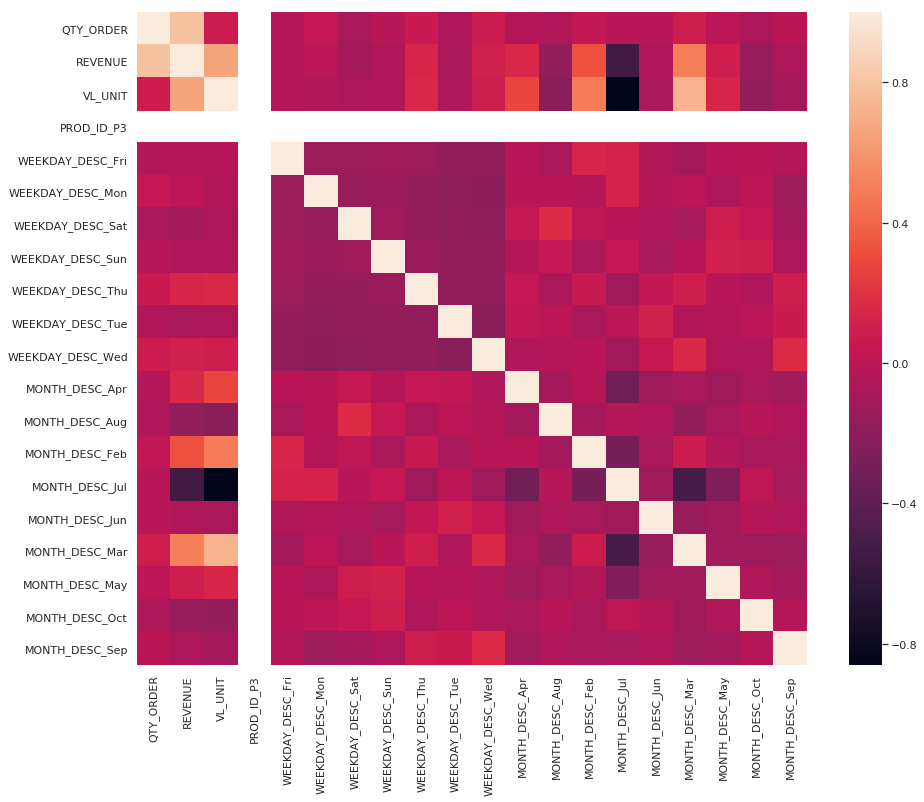

In [490]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p3.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [491]:
X = df_p3.drop('QTY_ORDER', axis=1)
y = df_p3['QTY_ORDER']

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2029, 19), (870, 19))

In [493]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P3  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
348645  1399.00  1399.00           1                 0                 1   
349432  1349.10  1349.10           1                 0                 0   
349972  1098.00  1098.00           1                 0                 0   
348892  1149.90  1149.90           1                 1                 0   
351084  1166.96  1166.96           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
348645                 0                 0                 0   
349432                 0                 0                 0   
349972                 0                 0                 0   
348892                 0                 0                 0   
351084                 0                 1                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
348645                 0                 0               0               0   
349432                 0                 1               0               0   
349972                 0                 1               0               0   
348892                 0                 0               0               0   
351084                 0                 0               0               0   

        MONTH_DESC_Feb  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
348645               0               0               0               1   
349432               0               0               0               1   
349972               0               0               0               0   
348892               0               1               0               0   
351084               0               0               0               0   

        MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
348645               0               0               0  
349432               0               0               0  
349972               0               0               1  
348892               0               0               0  
351084               0               1               0

In [494]:
model_p3_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p3_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p3_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P3..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [495]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2029, 1), (870, 1))

In [496]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(10):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9740832315529209
1          0.7842414518597226                  0.6108267507303247
2          0.9604525327853224                  0.9717610891000626
3          1.0                  0.9740832315529209
4          1.0                  0.9740832315529209
5          1.0                  0.9740832315529209
6          1.0                  0.9740832315529209
7          1.0                  0.9740832315529209
8          1.0                  0.9740832315529209
9          1.0                  0.9740832315529209


In [497]:
model_p3_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p3_1.fit(X_train, y_train)

y_pred = model_p3_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.03390317518104052


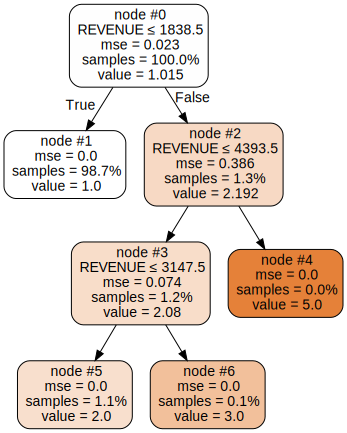

In [498]:
dot_data = tree.export_graphviz(
    model_p3_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [499]:
model_p3_2 = LinearRegression().fit(X_train, y_train)

model_p3_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.6133499377491359, 0.2828153111655276)

In [500]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p3_2.predict(X_test))**0.5))

RMSE: 0.11172574996090387


### GridSearchCV

In [501]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p3_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [502]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.1313776349926552


### Cross Validation

In [503]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [504]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p3_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p3_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.016700960524691482
RMSE - DecisionTreeRegression: 0.04152990087198261


## 8.4 P4

In [505]:
df_p4 = df_sales[df_sales['PROD_ID'] == 'P4']
df_p4.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
313761      P4 2015-07-25        1.0   540.55  2015      7   25        5   
313762      P4 2015-08-26        1.0   499.90  2015      8   26        2   
313763      P4 2015-08-05        1.0   569.00  2015      8    5        2   
313764      P4 2015-07-26        1.0   689.99  2015      7   26        6   
313765      P4 2015-07-26        1.0   689.90  2015      7   26        6   

        VL_UNIT  
313761   540.55  
313762   499.90  
313763   569.00  
313764   689.99  
313765   689.90

In [508]:
weekdays = get_weekday()

df_p4.loc[:, 'WEEKDAY_DESC'] = df_p4['WEEKDAY'].map(lambda x: weekdays[x])
df_p4.loc[:, 'MONTH_DESC'] = df_p4['MONTH'].map(set_month)

In [509]:
df_p4.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
313761      P4 2015-07-25        1.0   540.55  2015      7   25        5   
313762      P4 2015-08-26        1.0   499.90  2015      8   26        2   
313763      P4 2015-08-05        1.0   569.00  2015      8    5        2   
313764      P4 2015-07-26        1.0   689.99  2015      7   26        6   
313765      P4 2015-07-26        1.0   689.90  2015      7   26        6   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
313761   540.55          Sat        Jul  
313762   499.90          Wed        Aug  
313763   569.00          Wed        Aug  
313764   689.99          Sun        Jul  
313765   689.90          Sun        Jul

In [510]:
df_p4 = pd.get_dummies(df_p4.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [511]:
df_p4.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P4  WEEKDAY_DESC_Fri  \
313761        1.0   540.55   540.55           1                 0   
313762        1.0   499.90   499.90           1                 0   
313763        1.0   569.00   569.00           1                 0   
313764        1.0   689.99   689.99           1                 0   
313765        1.0   689.90   689.90           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
313761                 0                 1                 0   
313762                 0                 0                 0   
313763                 0                 0                 0   
313764                 0                 0                 1   
313765                 0                 0                 1   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
313761                 0                 0                 0               0   
313762                 0                 0                 1               0   
313763                 0                 0                 1               0   
313764                 0                 0                 0               0   
313765                 0                 0                 0               0   

        MONTH_DESC_Aug  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
313761               0               1               0               0   
313762               1               0               0               0   
313763               1               0               0               0   
313764               0               1               0               0   
313765               0               1               0               0   

        MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
313761               0               0               0  
313762               0               0               0  
313763               0               0               0  
313764               0               0               0  
313765               0               0               0

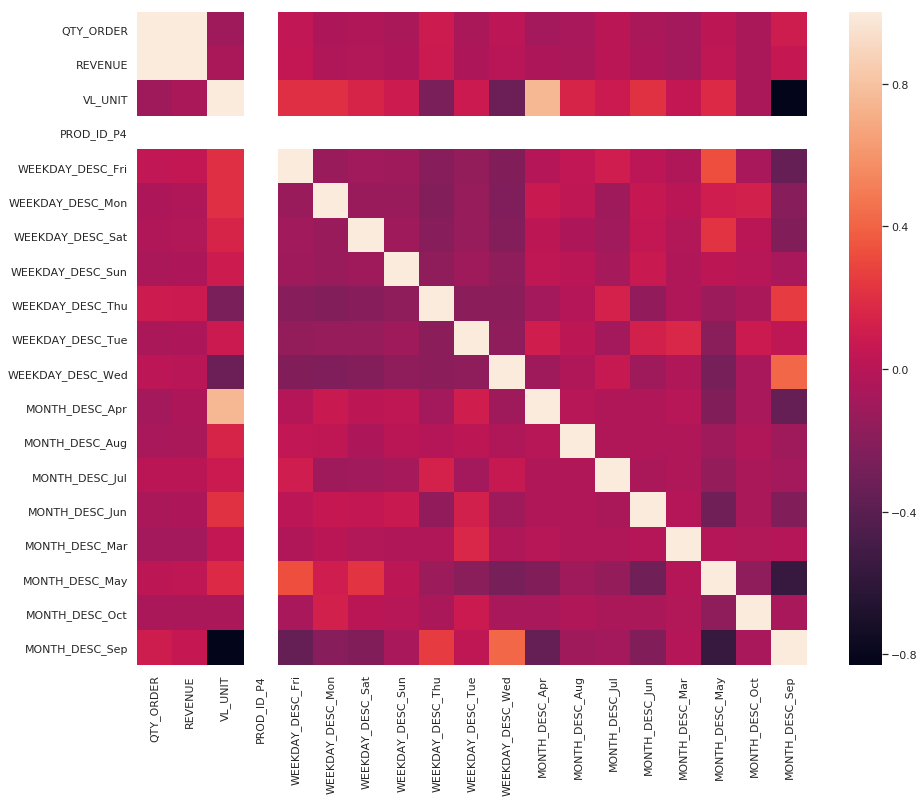

In [512]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p4.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [515]:
X = df_p4.drop('QTY_ORDER', axis=1)
y = df_p4['QTY_ORDER']

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((10259, 18), (4397, 18))

In [517]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P4  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
327606    429.0    429.0           1                 0                 0   
316410    499.0    499.0           1                 0                 1   
325888    428.8    428.8           1                 0                 0   
327518    429.0    429.0           1                 0                 0   
315703    569.0    569.0           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
327606                 0                 0                 1   
316410                 0                 0                 0   
325888                 0                 0                 0   
327518                 0                 0                 1   
315703                 1                 0                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
327606                 0                 0               0               0   
316410                 0                 0               0               0   
325888                 1                 0               0               0   
327518                 0                 0               0               0   
315703                 0                 0               1               0   

        MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  \
327606               0               0               0               0   
316410               0               0               0               1   
325888               0               0               0               1   
327518               0               0               0               0   
315703               0               0               0               0   

        MONTH_DESC_Oct  MONTH_DESC_Sep  
327606               0               1  
316410               0               0  
325888               0               0  
327518               0               1  
315703               0               0

In [518]:
model_p4_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p4_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p4_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P4..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [519]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((10259, 1), (4397, 1))

In [527]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9934363118847349
1          0.7772464986732381                  0.7706406079993345
2          0.9242261534954784                  0.9410829185349286
3          0.9877815203934586                  0.9850114919782668
4          0.9980157840367083                  0.9930160903356664
5          0.9992849728363331                  0.9932311262701466
6          0.9996101423104868                  0.9933309133203878
7          0.9998426732528809                  0.993399307037347
8          0.9999843074302864                  0.9934331410209112
9          1.0                  0.9934363118847349
10          1.0                  0.9934363118847349


In [528]:
model_p4_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p4_1.fit(X_train, y_train)

y_pred = model_p4_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.30074478131110083


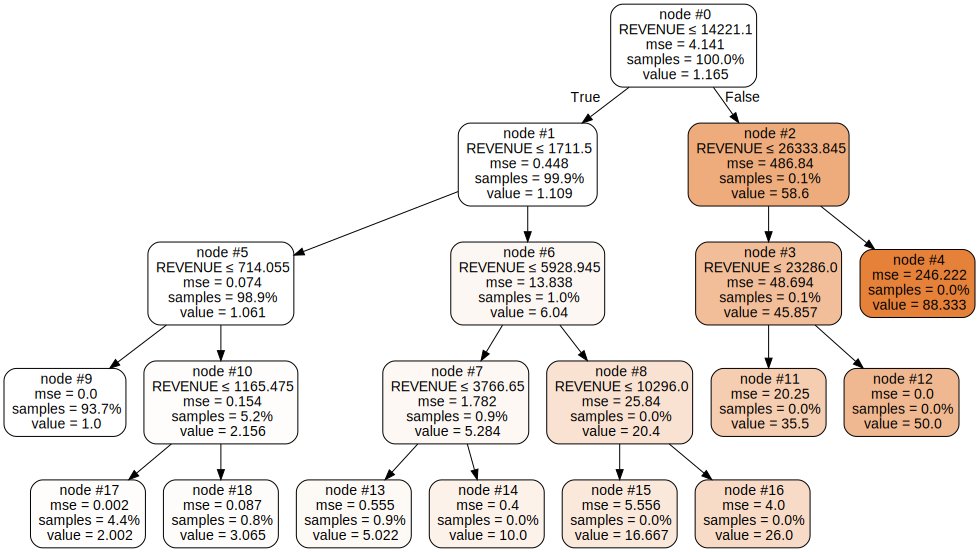

In [530]:
dot_data = tree.export_graphviz(
    model_p4_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [531]:
model_p4_2 = LinearRegression().fit(X_train, y_train)

model_p4_2.score(X_train, y_train), model_2.score(X_test, y_test)

(0.9887849156240248, 0.5145615385778184)

In [532]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p4_2.predict(X_test))**0.5))

RMSE: 0.16050540184482984


### GridSearchCV

In [533]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p4_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [534]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 1.6853320279143338


### Cross Validation

In [535]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [536]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p4_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p4_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))


RMSE - LinearRegression: 0.17584648729459043
RMSE - DecisionTreeRegression: 0.3873993873477174


## 8.5 P5

In [537]:
df_p5 = df_sales[df_sales['PROD_ID'] == 'P5']
df_p5.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
328417      P5 2015-07-25        1.0    935.0  2015      7   25        5   
328418      P5 2015-07-22        1.0    799.0  2015      7   22        2   
328419      P5 2015-07-21        1.0    799.0  2015      7   21        1   
328420      P5 2015-07-17        1.0    749.0  2015      7   17        4   
328421      P5 2015-07-21        1.0    799.0  2015      7   21        1   

        VL_UNIT  
328417    935.0  
328418    799.0  
328419    799.0  
328420    749.0  
328421    799.0

In [539]:
weekdays = get_weekday()

df_p5.loc[:, 'WEEKDAY_DESC'] = df_p5['WEEKDAY'].map(lambda x: weekdays[x])
df_p5.loc[:, 'MONTH_DESC'] = df_p5['MONTH'].map(set_month)

In [540]:
df_p5.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
328417      P5 2015-07-25        1.0    935.0  2015      7   25        5   
328418      P5 2015-07-22        1.0    799.0  2015      7   22        2   
328419      P5 2015-07-21        1.0    799.0  2015      7   21        1   
328420      P5 2015-07-17        1.0    749.0  2015      7   17        4   
328421      P5 2015-07-21        1.0    799.0  2015      7   21        1   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
328417    935.0          Sat        Jul  
328418    799.0          Wed        Jul  
328419    799.0          Tue        Jul  
328420    749.0          Fri        Jul  
328421    799.0          Tue        Jul

In [541]:
df_p5 = pd.get_dummies(df_p5.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [542]:
df_p5.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P5  WEEKDAY_DESC_Fri  \
328417        1.0    935.0    935.0           1                 0   
328418        1.0    799.0    799.0           1                 0   
328419        1.0    799.0    799.0           1                 0   
328420        1.0    749.0    749.0           1                 1   
328421        1.0    799.0    799.0           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
328417                 0                 1                 0   
328418                 0                 0                 0   
328419                 0                 0                 0   
328420                 0                 0                 0   
328421                 0                 0                 0   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
328417                 0                 0                 0               0   
328418                 0                 0                 1               0   
328419                 0                 1                 0               0   
328420                 0                 0                 0               0   
328421                 0                 1                 0               0   

        MONTH_DESC_Aug  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_May  \
328417               0               1               0               0   
328418               0               1               0               0   
328419               0               1               0               0   
328420               0               1               0               0   
328421               0               1               0               0   

        MONTH_DESC_Oct  MONTH_DESC_Sep  
328417               0               0  
328418               0               0  
328419               0               0  
328420               0               0  
328421               0               0

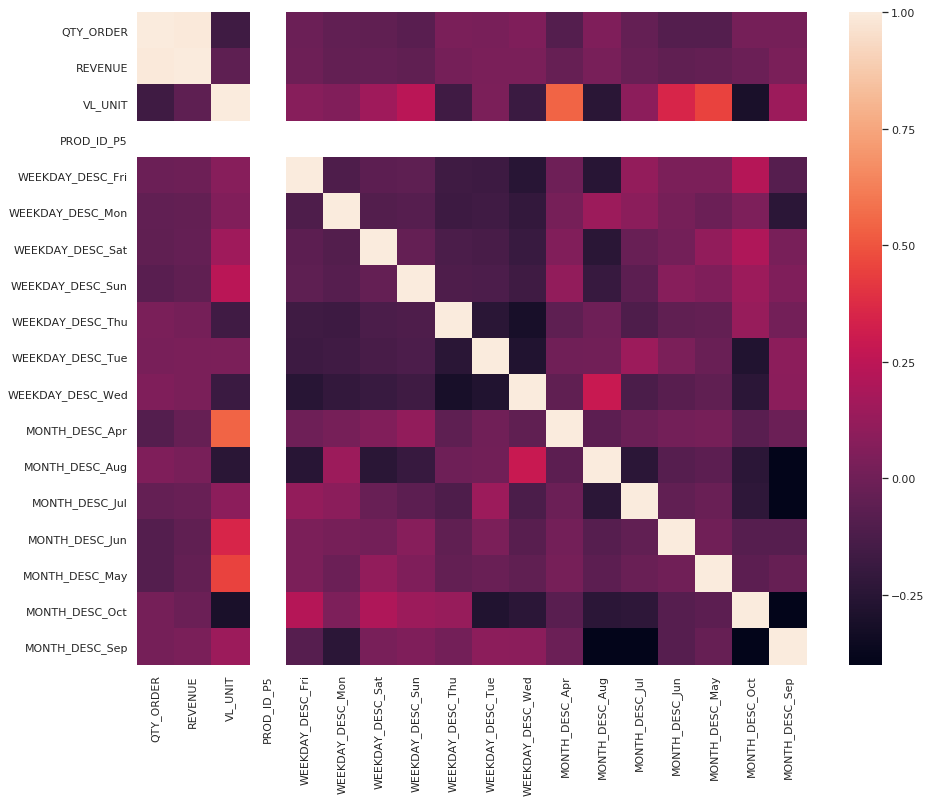

In [543]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p5.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [544]:
X = df_p5.drop('QTY_ORDER', axis=1)
y = df_p5['QTY_ORDER']

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13842, 17), (5933, 17))

In [546]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P5  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
331479   749.00   749.00           1                 0                 0   
347667   799.00   799.00           1                 0                 0   
346206   735.79   735.79           1                 0                 0   
347026   735.79   735.79           1                 0                 0   
334798   779.00   779.00           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
331479                 0                 0                 0   
347667                 0                 1                 0   
346206                 0                 1                 0   
347026                 0                 0                 1   
334798                 0                 0                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
331479                 0                 1               0               0   
347667                 0                 0               0               0   
346206                 0                 0               0               0   
347026                 0                 0               0               0   
334798                 0                 1               0               0   

        MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_May  MONTH_DESC_Oct  \
331479               1               0               0               0   
347667               0               0               0               0   
346206               0               0               0               1   
347026               0               0               0               1   
334798               0               0               0               1   

        MONTH_DESC_Sep  
331479               0  
347667               1  
346206               0  
347026               0  
334798               0

In [547]:
model_p5_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p5_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p5_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9959974248749486
VL_UNIT.............:0.004002575125051447
PROD_ID_P5..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [548]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13842, 1), (5933, 1))

In [549]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9936678416620279
1          0.5021550729906958                  0.3458651946248169
2          0.9793415322994393                  0.9836374917770825
3          0.9928386263448529                  0.9912729263608759
4          0.9955945828796501                  0.9927211355985246
5          0.9973453771244243                  0.9923205746194764
6          0.9987409678406036                  0.9929309290563108
7          0.9995852107028943                  0.9933542927588191
8          0.9996773861022512                  0.9934384156352898
9          1.0                  0.9936678416620279
10          1.0                  0.9936678416620279


In [550]:
model_p5_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p5_1.fit(X_train, y_train)

y_pred = model_p5_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.06476676888401511


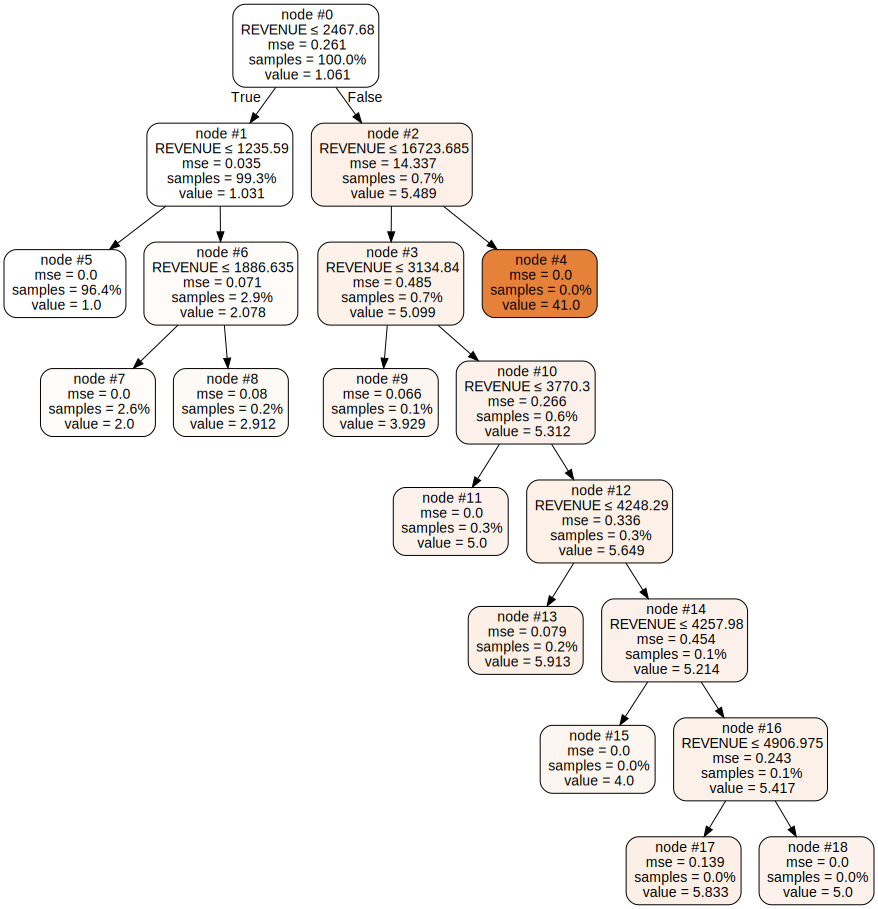

In [552]:
dot_data = tree.export_graphviz(
    model_p5_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [554]:
model_p5_2 = LinearRegression().fit(X_train, y_train)
model_p5_2.score(X_train, y_train), model_p5_2.score(X_test, y_test)

(0.9611069728242423, 0.9841457533797849)

In [555]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p5_2.predict(X_test))**0.5))

RMSE: 0.0985198326851229


### GridSearchCV

In [556]:
from sklearn.model_selection import GridSearchCV

In [558]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p5_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [559]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.5895316912894103


### Cross Validation

In [560]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [561]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p5_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p5_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.05663294037824819
RMSE - DecisionTreeRegression: 0.04002547434248185


## 8.6 P6

In [562]:
df_p6 = df_sales[df_sales['PROD_ID'] == 'P6']
df_p6.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT
0      P6 2015-08-02        1.0  1808.99  2015      8    2        6  1808.99
1      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00
2      P6 2015-08-17        1.0  1673.95  2015      8   17        0  1673.95
3      P6 2015-08-11        1.0  1674.00  2015      8   11        1  1674.00
4      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00

In [566]:
weekdays = get_weekday()

df_p6.loc[:, 'WEEKDAY_DESC'] = df_p6['WEEKDAY'].map(lambda x: weekdays[x])
df_p6.loc[:, 'MONTH_DESC'] = df_p6['MONTH'].map(set_month)

In [567]:
df_p6.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  VL_UNIT  \
0      P6 2015-08-02        1.0  1808.99  2015      8    2        6  1808.99   
1      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00   
2      P6 2015-08-17        1.0  1673.95  2015      8   17        0  1673.95   
3      P6 2015-08-11        1.0  1674.00  2015      8   11        1  1674.00   
4      P6 2015-08-17        1.0  1674.00  2015      8   17        0  1674.00   

  WEEKDAY_DESC MONTH_DESC  
0          Sun        Aug  
1          Mon        Aug  
2          Mon        Aug  
3          Tue        Aug  
4          Mon        Aug

In [568]:
df_p6 = pd.get_dummies(df_p6.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [569]:
df_p6.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P6  WEEKDAY_DESC_Fri  \
0        1.0  1808.99  1808.99           1                 0   
1        1.0  1674.00  1674.00           1                 0   
2        1.0  1673.95  1673.95           1                 0   
3        1.0  1674.00  1674.00           1                 0   
4        1.0  1674.00  1674.00           1                 0   

   WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 0                 0                 0                 0   
4                 1                 0                 0                 0   

   WEEKDAY_DESC_Tue       ...        MONTH_DESC_Apr  MONTH_DESC_Aug  \
0                 0       ...                     0               1   
1                 0       ...                     0               1   
2                 0       ...                     0               1   
3                 1       ...                     0               1   
4                 0       ...                     0               1   

   MONTH_DESC_Feb  MONTH_DESC_Jan  MONTH_DESC_Jul  MONTH_DESC_Jun  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
0               0               0               0               0  
1               0               0               0               0  
2               0               0               0               0  
3               0               0               0               0  
4               0               0               0               0  

[5 rows x 21 columns]

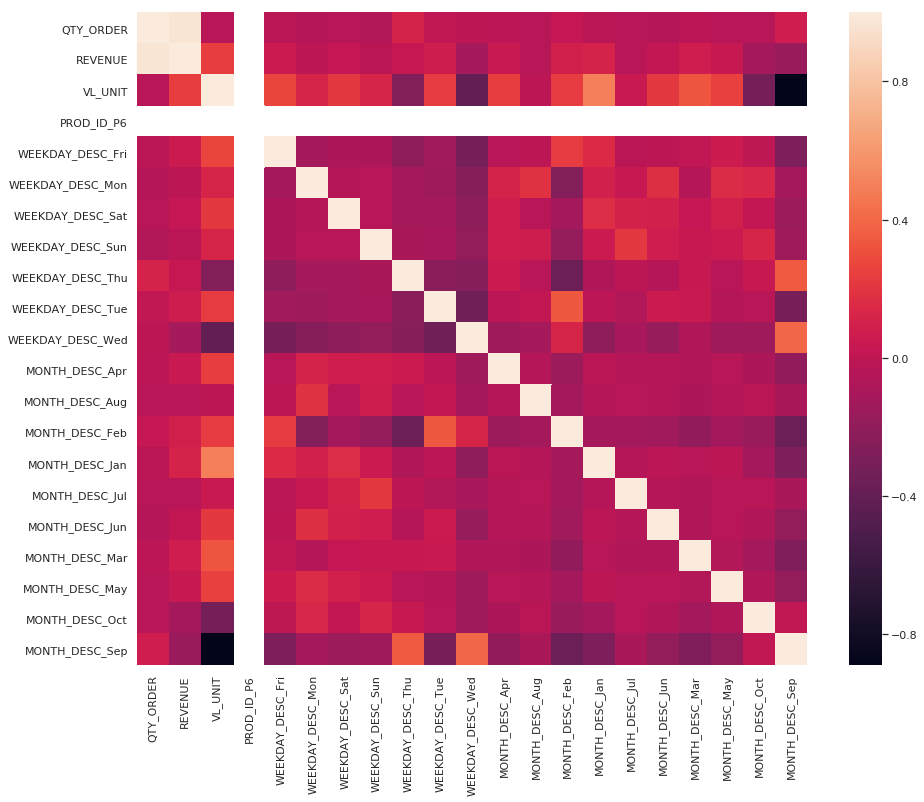

In [570]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p6.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [571]:
X = df_p6.drop('QTY_ORDER', axis=1)
y = df_p6['QTY_ORDER']

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2871, 20), (1231, 20))

In [573]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P6  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
3733  1273.09  1273.09           1                 0                 0   
1240  1399.00  1399.00           1                 0                 0   
235   1399.00  1399.00           1                 0                 0   
3181  1665.56  1665.56           1                 0                 0   
2430  1473.89  1473.89           1                 1                 0   

      WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  \
3733                 0                 0                 0                 0   
1240                 0                 0                 0                 0   
235                  0                 0                 0                 0   
3181                 0                 0                 0                 0   
2430                 0                 0                 0                 0   

      WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  MONTH_DESC_Feb  \
3733                 1               0               0               0   
1240                 1               0               0               0   
235                  1               0               0               0   
3181                 1               0               0               1   
2430                 0               0               0               0   

      MONTH_DESC_Jan  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
3733               0               0               0               0   
1240               0               0               0               0   
235                0               0               0               0   
3181               0               0               0               0   
2430               0               0               0               0   

      MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
3733               0               0               1  
1240               0               0               1  
235                0               0               1  
3181               0               0               0  
2430               0               0               1

In [574]:
model_p6_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p6_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p6_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9996043021494209
VL_UNIT.............:0.0
PROD_ID_P6..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jan......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.00039569785057918914
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [575]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((2871, 1), (1231, 1))

In [576]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9538640281837943
1          0.7509274379709331                  -0.0014367191558384285
2          0.9607350641844321                  0.8533260104608122
3          0.994972054446752                  0.9397517593557273
4          0.9991376874380973                  0.8885047347775028
5          0.9993101499504778                  0.9128542754582781
6          1.0                  0.9538640281837943
7          1.0                  0.9538640281837943
8          1.0                  0.9538640281837943
9          1.0                  0.9538640281837943
10          1.0                  0.9538640281837943


In [581]:
model_p6_1 = DecisionTreeRegressor(
    max_depth=6,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p6_1.fit(X_train, y_train)

y_pred = model_p6_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.03041666898501042


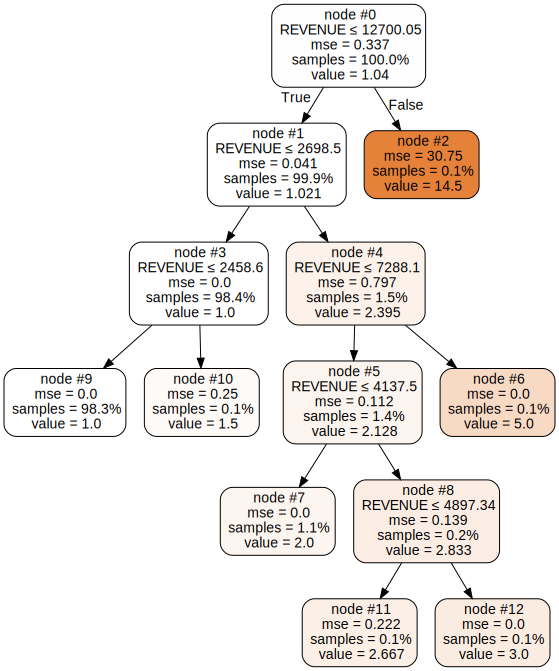

In [582]:
dot_data = tree.export_graphviz(
    model_p6_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [587]:
model_p6_2 = LinearRegression().fit(X_train, y_train)

model_p6_2.score(X_train, y_train), model_p6_2.score(X_test, y_test)

(0.9437500074956231, -0.08621520949484274)

In [588]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p6_2.predict(X_test))**0.5))

RMSE: 0.1382958273441003


### GridSearchCV

In [589]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p6_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [590]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.15327125758817203


### Cross Validation

In [591]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [592]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p6_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p6_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.05190821367418414
RMSE - DecisionTreeRegression: 0.20747629665469447


## 8.7 P7

In [593]:
df_p7 = df_sales[df_sales['PROD_ID'] == 'P7']
df_p7.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
4102      P7 2015-07-31        1.0    749.0  2015      7   31        4   
4103      P7 2015-07-25        1.0    749.0  2015      7   25        5   
4104      P7 2015-08-02        1.0    752.0  2015      8    2        6   
4105      P7 2015-08-02        1.0    752.0  2015      8    2        6   
4106      P7 2015-07-17        1.0    749.0  2015      7   17        4   

      VL_UNIT  
4102    749.0  
4103    749.0  
4104    752.0  
4105    752.0  
4106    749.0

In [595]:
weekdays = get_weekday()

df_p7.loc[:, 'WEEKDAY_DESC'] = df_p7['WEEKDAY'].map(lambda x: weekdays[x])
df_p7.loc[:, 'MONTH_DESC'] = df_p7['MONTH'].map(set_month)

In [596]:
df_p7.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
4102      P7 2015-07-31        1.0    749.0  2015      7   31        4   
4103      P7 2015-07-25        1.0    749.0  2015      7   25        5   
4104      P7 2015-08-02        1.0    752.0  2015      8    2        6   
4105      P7 2015-08-02        1.0    752.0  2015      8    2        6   
4106      P7 2015-07-17        1.0    749.0  2015      7   17        4   

      VL_UNIT WEEKDAY_DESC MONTH_DESC  
4102    749.0          Fri        Jul  
4103    749.0          Sat        Jul  
4104    752.0          Sun        Aug  
4105    752.0          Sun        Aug  
4106    749.0          Fri        Jul

In [597]:
df_p7 = pd.get_dummies(df_p7.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [598]:
df_p7.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P7  WEEKDAY_DESC_Fri  \
4102        1.0    749.0    749.0           1                 1   
4103        1.0    749.0    749.0           1                 0   
4104        1.0    752.0    752.0           1                 0   
4105        1.0    752.0    752.0           1                 0   
4106        1.0    749.0    749.0           1                 1   

      WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
4102                 0                 0                 0                 0   
4103                 0                 1                 0                 0   
4104                 0                 0                 1                 0   
4105                 0                 0                 1                 0   
4106                 0                 0                 0                 0   

      WEEKDAY_DESC_Tue       ...        MONTH_DESC_Apr  MONTH_DESC_Aug  \
4102                 0       ...                     0               0   
4103                 0       ...                     0               0   
4104                 0       ...                     0               1   
4105                 0       ...                     0               1   
4106                 0       ...                     0               0   

      MONTH_DESC_Feb  MONTH_DESC_Jan  MONTH_DESC_Jul  MONTH_DESC_Jun  \
4102               0               0               1               0   
4103               0               0               1               0   
4104               0               0               0               0   
4105               0               0               0               0   
4106               0               0               1               0   

      MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
4102               0               0               0               0  
4103               0               0               0               0  
4104               0               0               0               0  
4105               0               0               0               0  
4106               0               0               0               0  

[5 rows x 21 columns]

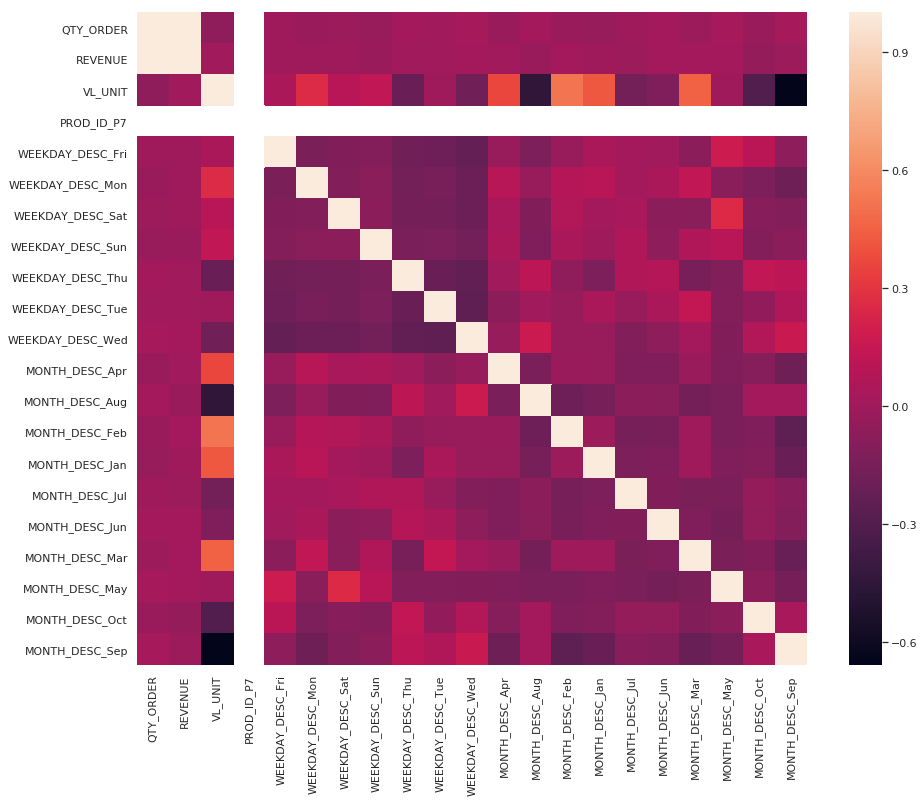

In [599]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p7.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [600]:
X = df_p7.drop('QTY_ORDER', axis=1)
y = df_p7['QTY_ORDER']

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((137157, 20), (58782, 20))

In [602]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P7  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
118957    699.0    699.0           1                 0                 0   
23061     849.0    849.0           1                 0                 0   
53610     749.0    749.0           1                 0                 0   
149850    799.0    799.0           1                 0                 0   
176236   1598.0    799.0           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
118957                 0                 0                 0   
23061                  0                 0                 0   
53610                  0                 0                 0   
149850                 0                 0                 0   
176236                 0                 0                 1   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
118957                 0                 1               0               0   
23061                  0                 1               0               0   
53610                  0                 1               0               0   
149850                 0                 1               1               0   
176236                 0                 0               0               0   

        MONTH_DESC_Feb  MONTH_DESC_Jan  MONTH_DESC_Jul  MONTH_DESC_Jun  \
118957               0               0               0               0   
23061                1               0               0               0   
53610                0               0               0               1   
149850               0               0               0               0   
176236               0               0               0               1   

        MONTH_DESC_Mar  MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
118957               0               0               0               1  
23061                0               0               0               0  
53610                0               0               0               0  
149850               0               0               0               0  
176236               0               0               0               0

In [603]:
model_p7_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p7_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p7_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:1.0
VL_UNIT.............:0.0
PROD_ID_P7..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Feb......:0.0
MONTH_DESC_Jan......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [604]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((137157, 1), (58782, 1))

In [605]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          0.9999976697482542                  0.9913606561686186
1          0.8700760172929376                  -1.4199198015818482e-05
2          0.9357408307498568                  0.5454259232685112
3          0.9822242701392679                  0.8832652973015668
4          0.9932716282513054                  0.9321673886821306
5          0.9987357724258162                  0.9762234961233317
6          0.9993767708467075                  0.9870682692335747
7          0.9995409718562082                  0.9884266417640148
8          0.9996980005589137                  0.989391493015033
9          0.9998314639396958                  0.9906455925050004
10          0.9999205501214902                  0.9912245527668668


In [606]:
model_p7_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p7_1.fit(X_train, y_train)

y_pred = model_p7_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.07029139796234884


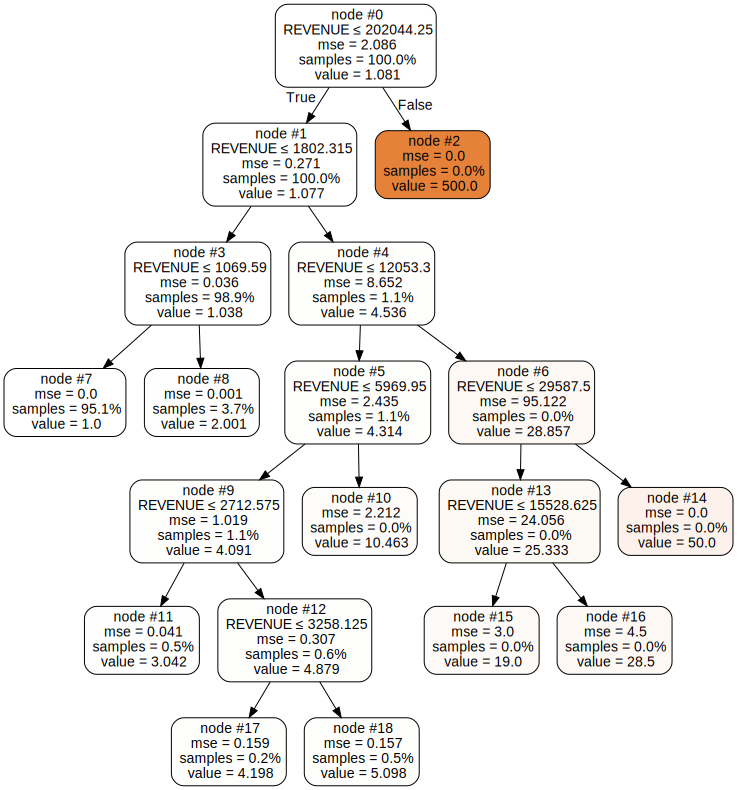

In [607]:
dot_data = tree.export_graphviz(
    model_p7_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [608]:
model_p7_2 = LinearRegression().fit(X_train, y_train)

model_p7_2.score(X_train, y_train), model_p7_2.score(X_test, y_test)

(0.9958492868620777, 0.9671322260536097)

In [609]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p7_2.predict(X_test))**0.5))

RMSE: 0.08857551941952982


### GridSearchCV

In [611]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p7_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

### Cross Validation

In [612]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [613]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p7_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p7_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.04296939815301741
RMSE - DecisionTreeRegression: 1.026771937797302


## 8.8 P8

In [629]:
df_p8 = df_sales[df_sales['PROD_ID'] == 'P8']
df_p8.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
267490      P8 2015-07-28        4.0  1604.00  2015      7   28        1   
267491      P8 2015-07-30        1.0   388.16  2015      7   30        3   
267492      P8 2015-07-31        1.0   388.16  2015      7   31        4   
267493      P8 2015-07-29        1.0   448.52  2015      7   29        2   
267494      P8 2015-07-25        1.0   439.00  2015      7   25        5   

        VL_UNIT  
267490   401.00  
267491   388.16  
267492   388.16  
267493   448.52  
267494   439.00

In [632]:
weekdays = get_weekday()

df_p8.loc[:, 'WEEKDAY_DESC'] = df_p8['WEEKDAY'].map(lambda x: weekdays[x])
df_p8.loc[:, 'MONTH_DESC'] = df_p8['MONTH'].map(set_month)

In [633]:
df_p8.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
267490      P8 2015-07-28        4.0  1604.00  2015      7   28        1   
267491      P8 2015-07-30        1.0   388.16  2015      7   30        3   
267492      P8 2015-07-31        1.0   388.16  2015      7   31        4   
267493      P8 2015-07-29        1.0   448.52  2015      7   29        2   
267494      P8 2015-07-25        1.0   439.00  2015      7   25        5   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
267490   401.00          Tue        Jul  
267491   388.16          Thu        Jul  
267492   388.16          Fri        Jul  
267493   448.52          Wed        Jul  
267494   439.00          Sat        Jul

In [634]:
df_p8 = pd.get_dummies(df_p8.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [635]:
df_p8.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P8  WEEKDAY_DESC_Fri  \
267490        4.0  1604.00   401.00           1                 0   
267491        1.0   388.16   388.16           1                 0   
267492        1.0   388.16   388.16           1                 1   
267493        1.0   448.52   448.52           1                 0   
267494        1.0   439.00   439.00           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
267490                 0                 0                 0   
267491                 0                 0                 0   
267492                 0                 0                 0   
267493                 0                 0                 0   
267494                 0                 1                 0   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
267490                 0                 1                 0               0   
267491                 1                 0                 0               0   
267492                 0                 0                 0               0   
267493                 0                 0                 1               0   
267494                 0                 0                 0               0   

        MONTH_DESC_Aug  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
267490               0               1               0               0   
267491               0               1               0               0   
267492               0               1               0               0   
267493               0               1               0               0   
267494               0               1               0               0   

        MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
267490               0               0               0  
267491               0               0               0  
267492               0               0               0  
267493               0               0               0  
267494               0               0               0

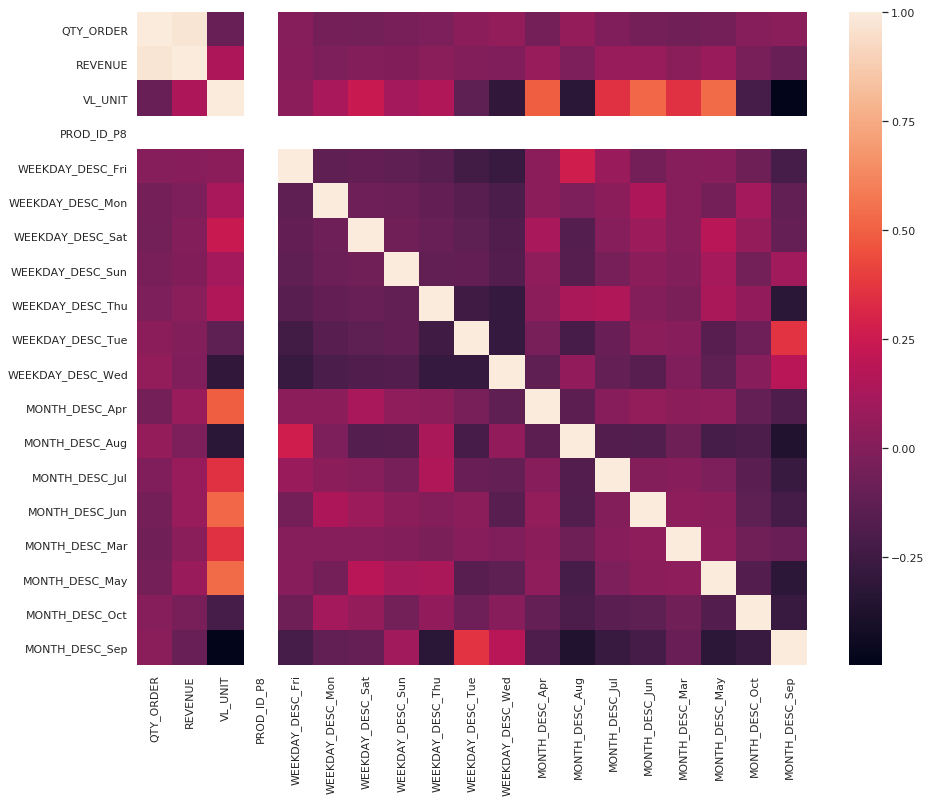

In [636]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p8.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [637]:
X = df_p8.drop('QTY_ORDER', axis=1)
y = df_p8['QTY_ORDER']

In [638]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((19488, 18), (8352, 18))

In [639]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P8  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
287762   443.33   443.33           1                 0                 0   
278896   379.00   379.00           1                 0                 0   
279671   394.90   394.90           1                 1                 0   
270205   398.00   398.00           1                 0                 0   
281891   449.10   449.10           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
287762                 0                 0                 0   
278896                 0                 0                 0   
279671                 0                 0                 0   
270205                 0                 1                 0   
281891                 0                 1                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
287762                 1                 0               0               0   
278896                 0                 1               0               0   
279671                 0                 0               0               0   
270205                 0                 0               0               1   
281891                 0                 0               0               1   

        MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  \
287762               0               0               0               1   
278896               0               0               0               0   
279671               0               0               0               0   
270205               0               0               0               0   
281891               0               0               0               0   

        MONTH_DESC_Oct  MONTH_DESC_Sep  
287762               0               0  
278896               0               1  
279671               1               0  
270205               0               0  
281891               0               0

In [640]:
model_p8_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p8_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p8_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9963749448416332
VL_UNIT.............:0.0036250551583667857
PROD_ID_P8..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [641]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((19488, 1), (8352, 1))

In [642]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(20):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.7064455861746846
1          0.6194515854197991                  0.23686661502531925
2          0.887021500100428                  0.4249047232781906
3          0.9748187188162589                  0.6150447648447481
4          0.9904101172309708                  0.7049298464438631
5          0.994222620610016                  0.7056945669820361
6          0.9960517686596896                  0.705472877101089
7          0.9976580809325994                  0.7059621672115832
8          0.9987094263203843                  0.705952566298199
9          0.9992917583465523                  0.7062886793554413
10          0.9994603873116589                  0.7062883070089314
11          0.9996222711181613                  0.7063872022419428
12          1.0                  0.7064455861746846
13          1.0                  0.7064455861746846
14          1.

Analisar o overfitting

In [643]:
model_p8_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p8_1.fit(X_train, y_train)

y_pred = model_p8_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.4424958825731574


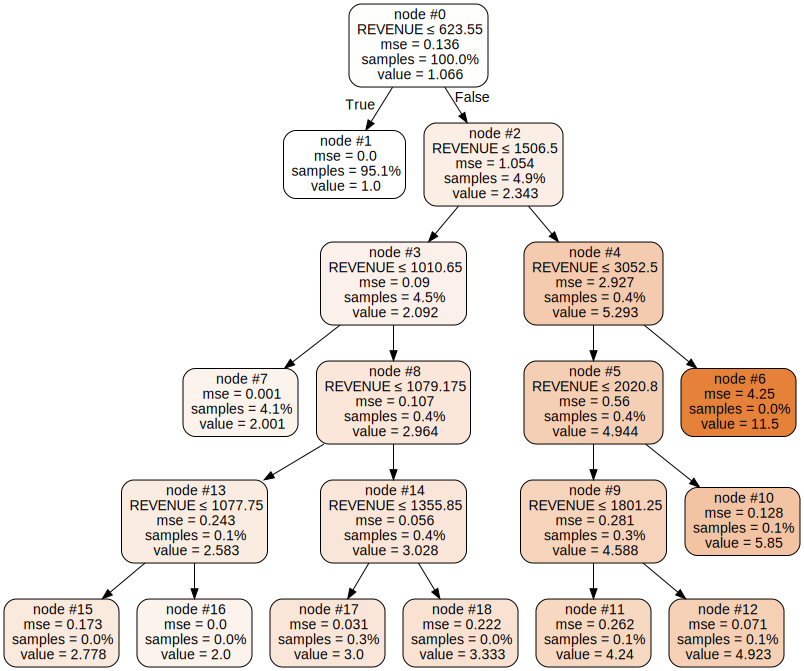

In [645]:
dot_data = tree.export_graphviz(
    model_p8_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [646]:
model_p8_2 = LinearRegression().fit(X_train, y_train)

model_p8_2.score(X_train, y_train), model_p8_2.score(X_test, y_test)

(0.8931068393921764, 0.9596744059639482)

In [647]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p8_2.predict(X_test))**0.5))

RMSE: 0.14378662021572808


### GridSearchCV

In [648]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p8_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

KeyboardInterrupt: 

In [649]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Cross Validation

In [650]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [652]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p8_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p8_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.03859831221836697
RMSE - DecisionTreeRegression: 0.2455107802298585


## 8.9 P9

In [653]:
df_p9 = df_sales[df_sales['PROD_ID'] == 'P9']
df_p9.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
295330      P9 2015-09-24        1.0    399.0  2015      9   24        3   
295331      P9 2015-08-02        1.0    435.0  2015      8    2        6   
295332      P9 2015-07-25        2.0    878.0  2015      7   25        5   
295333      P9 2015-08-02        1.0    435.0  2015      8    2        6   
295334      P9 2015-08-02        1.0    435.0  2015      8    2        6   

        VL_UNIT  
295330    399.0  
295331    435.0  
295332    439.0  
295333    435.0  
295334    435.0

In [656]:
weekdays = get_weekday()

df_p9.loc[:, 'WEEKDAY_DESC'] = df_p9['WEEKDAY'].map(lambda x: weekdays[x])
df_p9.loc[:, 'MONTH_DESC'] = df_p9['MONTH'].map(set_month)

In [657]:
df_p9.head()

PROD_ID DATE_ORDER  QTY_ORDER  REVENUE  YEAR  MONTH  DAY  WEEKDAY  \
295330      P9 2015-09-24        1.0    399.0  2015      9   24        3   
295331      P9 2015-08-02        1.0    435.0  2015      8    2        6   
295332      P9 2015-07-25        2.0    878.0  2015      7   25        5   
295333      P9 2015-08-02        1.0    435.0  2015      8    2        6   
295334      P9 2015-08-02        1.0    435.0  2015      8    2        6   

        VL_UNIT WEEKDAY_DESC MONTH_DESC  
295330    399.0          Thu        Sep  
295331    435.0          Sun        Aug  
295332    439.0          Sat        Jul  
295333    435.0          Sun        Aug  
295334    435.0          Sun        Aug

In [658]:
df_p9 = pd.get_dummies(df_p9.drop(['DATE_ORDER', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'], axis=1))

In [659]:
df_p9.head()

QTY_ORDER  REVENUE  VL_UNIT  PROD_ID_P9  WEEKDAY_DESC_Fri  \
295330        1.0    399.0    399.0           1                 0   
295331        1.0    435.0    435.0           1                 0   
295332        2.0    878.0    439.0           1                 0   
295333        1.0    435.0    435.0           1                 0   
295334        1.0    435.0    435.0           1                 0   

        WEEKDAY_DESC_Mon  WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  \
295330                 0                 0                 0   
295331                 0                 0                 1   
295332                 0                 1                 0   
295333                 0                 0                 1   
295334                 0                 0                 1   

        WEEKDAY_DESC_Thu  WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  \
295330                 1                 0                 0               0   
295331                 0                 0                 0               0   
295332                 0                 0                 0               0   
295333                 0                 0                 0               0   
295334                 0                 0                 0               0   

        MONTH_DESC_Aug  MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  \
295330               0               0               0               0   
295331               1               0               0               0   
295332               0               1               0               0   
295333               1               0               0               0   
295334               1               0               0               0   

        MONTH_DESC_May  MONTH_DESC_Oct  MONTH_DESC_Sep  
295330               0               0               1  
295331               0               0               0  
295332               0               0               0  
295333               0               0               0  
295334               0               0               0

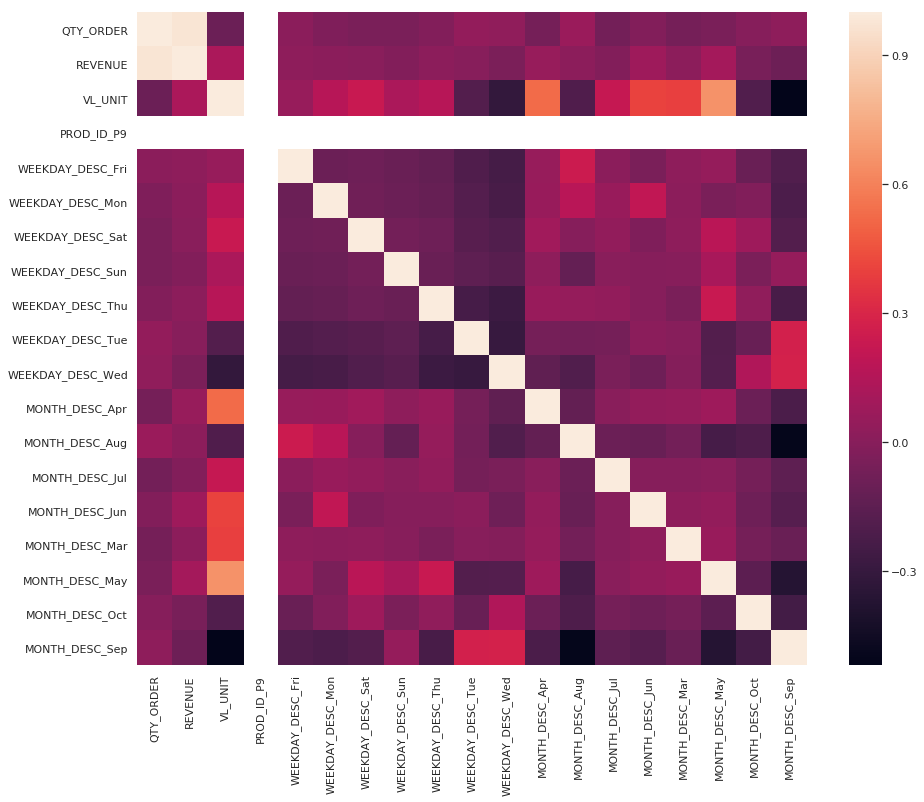

In [660]:
plt.figure(figsize=(15, 12))

sns.heatmap(df_p9.corr().astype(float).corr(), vmax=1.0)

plt.show()

In [661]:
X = df_p9.drop('QTY_ORDER', axis=1)
y = df_p9['QTY_ORDER']

In [662]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12901, 18), (5530, 18))

In [663]:
X_train.head()

REVENUE  VL_UNIT  PROD_ID_P9  WEEKDAY_DESC_Fri  WEEKDAY_DESC_Mon  \
307020    379.0    379.0           1                 1                 0   
301279    479.0    479.0           1                 0                 0   
305158    379.0    379.0           1                 0                 0   
312424    379.0    379.0           1                 0                 0   
306919    379.0    379.0           1                 0                 0   

        WEEKDAY_DESC_Sat  WEEKDAY_DESC_Sun  WEEKDAY_DESC_Thu  \
307020                 0                 0                 0   
301279                 0                 0                 0   
305158                 0                 0                 0   
312424                 0                 0                 0   
306919                 0                 1                 0   

        WEEKDAY_DESC_Tue  WEEKDAY_DESC_Wed  MONTH_DESC_Apr  MONTH_DESC_Aug  \
307020                 0                 0               0               0   
301279                 0                 1               0               0   
305158                 0                 1               0               0   
312424                 1                 0               0               0   
306919                 0                 0               0               0   

        MONTH_DESC_Jul  MONTH_DESC_Jun  MONTH_DESC_Mar  MONTH_DESC_May  \
307020               0               0               0               0   
301279               0               0               0               1   
305158               0               0               0               0   
312424               0               0               0               0   
306919               0               0               0               0   

        MONTH_DESC_Oct  MONTH_DESC_Sep  
307020               0               1  
301279               0               0  
305158               0               1  
312424               0               1  
306919               0               1

In [664]:
model_p9_1 = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p9_1.fit(X_train, y_train)

for f, i in zip(X_train.columns, model_p9_1.feature_importances_):
    print('{:.<20}:{:3}'.format(f, i))

REVENUE.............:0.9982094076227004
VL_UNIT.............:0.0017905923772996676
PROD_ID_P9..........:0.0
WEEKDAY_DESC_Fri....:0.0
WEEKDAY_DESC_Mon....:0.0
WEEKDAY_DESC_Sat....:0.0
WEEKDAY_DESC_Sun....:0.0
WEEKDAY_DESC_Thu....:0.0
WEEKDAY_DESC_Tue....:0.0
WEEKDAY_DESC_Wed....:0.0
MONTH_DESC_Apr......:0.0
MONTH_DESC_Aug......:0.0
MONTH_DESC_Jul......:0.0
MONTH_DESC_Jun......:0.0
MONTH_DESC_Mar......:0.0
MONTH_DESC_May......:0.0
MONTH_DESC_Oct......:0.0
MONTH_DESC_Sep......:0.0


In [665]:
# Realizando um novo split nos dados com as variáveis significativas.
columns = ['REVENUE']

X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((12901, 1), (5530, 1))

In [666]:
print('{:10} {:20} {:20}'.format('depth', 'Training score', 'Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------', '-------------'))

for i in range(11):
    score = compara_modelo(i, X_train, X_test, y_train, y_test)
    print('{:1}          {}                  {}'.format(i, score[0], score[1]))

depth      Training score       Testing score       
-----      --------------       -------------       
0          1.0                  0.9921423266670203
1          0.4813010636437708                  -1.9911374843584184e-05
2          0.8469868462311068                  0.6160819625457199
3          0.9735216420676012                  0.9347330305493862
4          0.9921438477284393                  0.9766781348037576
5          0.9978016069575787                  0.9975260482131473
6          0.9988333711445753                  0.9958452652952541
7          0.9995685366879464                  0.994616542145571
8          0.9997707851154716                  0.9934161291799838
9          0.9997860661077734                  0.9933700881252984
10          1.0                  0.9921423266670203


In [669]:
model_p9_1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    max_leaf_nodes=10
)

model_p9_1.fit(X_train, y_train)

y_pred = model_p9_1.predict(X_test)

print('RMSE: {}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 0.022872041296605704


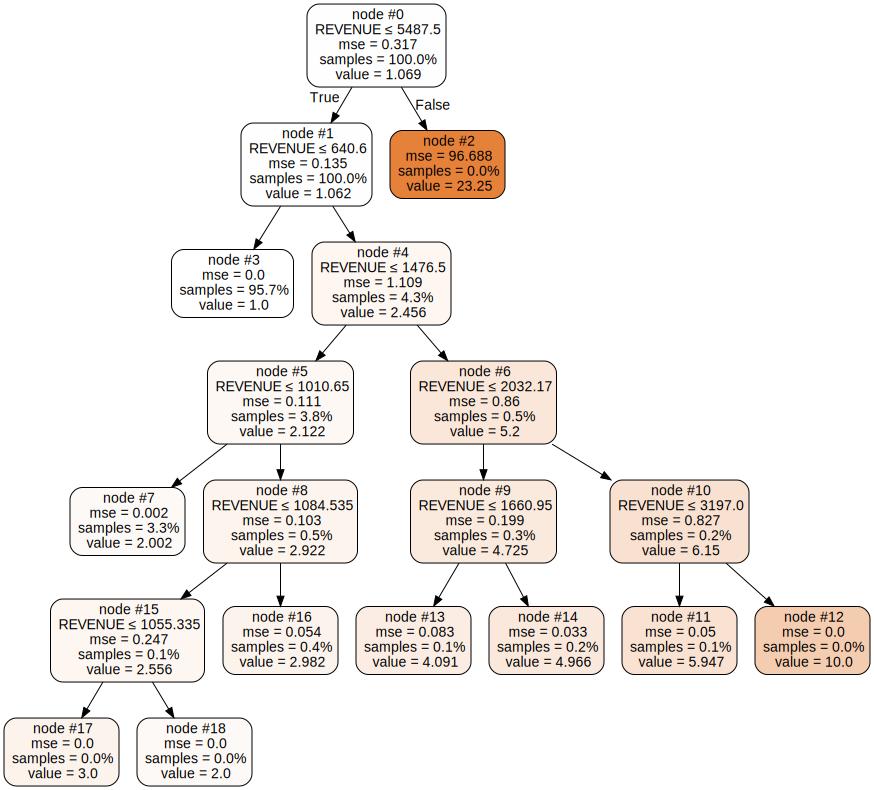

In [670]:
dot_data = tree.export_graphviz(
    model_p9_1,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['QTY_ORDER'],
    filled=True,
    rounded=True,
    proportion=True,
    node_ids=True,
    rotate=False,
    label='all',
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

### Linear Regression

In [672]:
model_p9_2 = LinearRegression().fit(X_train, y_train)

model_p9_2.score(X_train, y_train), model_p9_2.score(X_test, y_test)

(0.9408771792984054, 0.9029323961689564)

In [673]:
print('RMSE: {}'.format(mean_squared_error(y_test, model_p9_2.predict(X_test))**0.5))

RMSE: 0.11577191819146172


### GridSearchCV

In [674]:
from sklearn.model_selection import GridSearchCV

In [675]:
param_grid = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': [10, 20, 40],
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [20, 40, 60, 100],
    'max_leaf_nodes': [5, 20, 40, 100]
}

grid_cv_dtm = GridSearchCV(model_p9_1, param_grid, cv=5)

grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [10, 20, 40], 'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [20, 40, 60, 100], 'max_leaf_nodes': [5, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [676]:
print('RMSE: {}'.format(mean_squared_error(y_test, grid_cv_dtm.predict(X_test))**0.5))

RMSE: 0.058615737661719194


### Cross Validation

In [677]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, KFold

In [678]:
kf = KFold(10, True, random_state=0)

cv_result = cross_val_score(model_p9_1, X, y, cv=kf)
cv_predict_lr = cross_val_predict(LinearRegression(), X, y, cv=kf)
cv_predict_dtr = cross_val_predict(model_p9_1, X, y, cv=kf)

print('RMSE - LinearRegression: {}'.format(mean_squared_error(y, cv_predict_lr)**0.5))
print('RMSE - DecisionTreeRegression: {}'.format(mean_squared_error(y, cv_predict_dtr)**0.5))

RMSE - LinearRegression: 0.07288453722782338
RMSE - DecisionTreeRegression: 0.23661771431143203
